# **THỰC HÀNH: PHÂN TÍCH KHÁM PHÁ DỮ LIỆU**

## **A. MỤC TIÊU**

+ Bài thực hành này nhằm giúp người học nắm vững các kỹ thuật cơ bản trong khám phá dữ 
liệu để hiểu rõ đặc điểm và cấu trúc của tập dữ liệu. Cụ thể, sinh viên sẽ thực hiện các bước 
phân tích thống kê mô tả để xác định các đặc trưng chính như giá trị trung bình, trung vị, độ 
lệch chuẩn và phân bố của dữ liệu.  

+ Đồng thời, bài thực hành hướng dẫn sử dụng các công cụ trực quan hóa như biểu đồ 
histogram, boxplot, và scatter plot để phát hiện các mẫu, xu hướng, hoặc bất thường trong 
dữ liệu. Sinh viên sẽ được làm quen với các thư viện Python như Pandas, Matplotlib, và 
Seaborn để xử lý và trực quan hóa dữ liệu hiệu quả.  

+ Ngoài ra, bài thực hành giúp nhận diện các vấn đề như giá trị thiếu, giá trị ngoại lai, hoặc sự 
không nhất quán trong dữ liệu, từ đó đề xuất các phương pháp tiền xử lý phù hợp. Kết quả 
cuối cùng là sinh viên có thể đưa ra các nhận định ban đầu về dữ liệu, đặt nền tảng cho các 
bước phân tích sâu hơn hoặc xây dựng mô hình khai thác dữ liệu trong các ứng dụng thực 
tiễn như phân tích khách hàng hoặc dự đoán xu hướng. 

## **B. KẾT CẤU THỰC HÀNH**

+ Thực hành bao gồm 3 phần là: 
    - Thống kê mô tả 
    - Xử lý và trực quan hóa dữ liệu 
    - Phân tích đơn biến và hai biến

## **C. NỘI DUNG THỰC HÀNH**

### **1.1. THỐNG KÊ MÔ TẢ**

#### **1.1.1. Ôn tập lý thuyết**

+ **Thống kê mô tả là gì? Nó khác gì so với thống kê suy luận (inferential statistics)?**

    + Thống kê mô tả (Descriptive statistics) là tập hợp các phương pháp dùng để thu thập, tóm tắt, mô tả và trình bày dữ liệu. Nó giúp bạn hiểu được dữ liệu hiện có bằng cách cung cấp cái nhìn tổng quan, nhưng không đưa ra kết luận hay dự đoán vượt ra ngoài dữ liệu đó. Ví dụ: mean, median, mode, std, var, range, IQR, histogram,...

    + Thống kê suy luận (Inferential statistics) là tập hợp các phương pháp dùng để suy luận, dự đoán hoặc đưa ra kết luận về một quần thể dựa trên dữ liệu mẫu. Vì không thể khảo sát toàn bộ, ta dùng mẫu để ước lượng tham số hoặc kiểm định giả thuyết. Ví dụ: ước lượng khoảng tin cậy, t-test, chi-square, hồi quy, ANOVA,...

    + Khác biệt chính: 

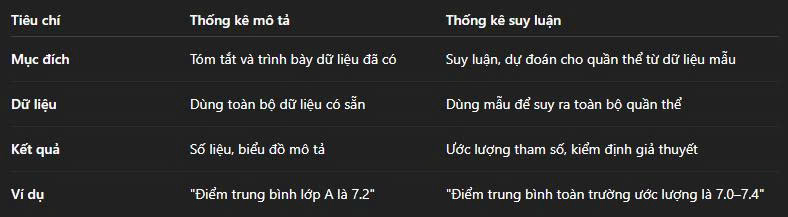

In [1]:
from IPython.display import display,Image
display(Image("image/khacbiet.png"))

+ **Các thước đo thống kê mô tả chính (ví dụ: trung bình, trung vị, phương sai, độ lệch chuẩn) được sử dụng để làm gì? Trong trường hợp nào thì nên dùng trung vị thay vì trung bình?**

    + Trung bình (mean): giá trị trung tâm, đại diện cho xu hướng chung của dữ liệu, là tổng các giá trị chia cho số lượng quan sát, phù hợp khi dữ liệu phân bố đều và không có giá trị ngoại lai quá lên. YN: cho ta một "đại diện" điển hình của dữ liệu.

    + Trung vị (median): giá trị nằm ở giữa khi sắp xếp dữ liệu theo thứ tự, chia dữ liệu thành hai nửa bằng nhau, dùng khi dữ liệu lệch (skewed) hoặc có outlier. YN: thể hiện mức "trung tâm" mà 50% dữ liệu nhỏ hơn, 50% lớn hơn.

    + Phương sai (variance): trung bình bình phương khoảng cách của từng giá trị tới trung bình, dùng trong phân tích thống kê nâng cao (ANOVA, mô hình xác suất). YN: đo mức độ phân tán (biến thiên) của dữ liệu.

    + Độ lệch chuẩn (Standard deviation-Std): căn bậc hai của phương sai. YN: cho biết mức độ phân tán trung bình quanh giá trị trung bình.

    + <u>**Khi nào dùng trung vị thay trung bình?**</u> : khi dữ liệu lệch (phân phối lương, giá nhà), dữ liệu có outlier, khi muốn đo "giá trị điển hình" trong dữ liệu mà không bị ảnh hưởng bởi vài giá trị cực đoan.

    + **Tóm lại:** trung bình tốt khi dữ liệu sạch và cân đối, trung vị tốt khi dữ liệu bị lệch hoặc có giá trị bất thường.

+ **Làm thế nào để xác định phân bố của một tập dữ liệu? Các loại phân bố phổ biến là gì (ví dụ: phân bố chuẩn, lệch trái, lệch phải)?**

    + <u>**Có nhiều cách để xem dữ liệu phân bố ra sao:**</u>

        <i>**(a) Trực quan**</i>

        + **Histogram (biểu đồ tần suất)** -> xem hình dạng phân bố.
        + **Boxplot (biểu đồ hộp)** -> xem đối xứng, lệch và outlier.
        + **QQ-plot (Quantile-Quantile plot)** -> so sánh dữ liệu với phân bố chuẩn.

        <i>**(b) Các chỉ số thống kê**</i>

        + **Skewness (độ lệch):** đo mức độ bất đối xứng. Skew ≈ 0 (đối xứng), Skew > 0 (lệch phải), Skew < 0 (lệch trái).
        + **Kurtoris (độ nhọn):** đo mức độ "nhọn" hay "bẹt" của phân bố so với chuẩn.

        <i>**(c) Kiểm định thống kê**</i>
        + **Shapiro-Wilk test, Kolmogorov-Smirnov test, Anderson-Darling test:** kiểm định dữ liệu có tuân theo phân phối chuẩn không.

    + <u>**Các loại phân bố phổ biến:**</u>

        <i>**(a) Phân bố chuẩn (Normal distribution)**</i>

        + Đối xứng quanh trung bình.
        + Đường cong hình chuông (bell curve).
        + Mean = Median = Mode.
        + Rất phổ biến trong thực tế (chiều cao, điểm số, sai số đo lường,...).

        <i>**(b) Phân bố lệch phải (Right-skewed / Positively skewed)**</i>

        + Đuôi dài về phía **giá trị lớn**.
        + Mean > Median.
        + Thường gặp trong: thu nhập, giá nhà, thời gian hoàn thành dự án.
        
        <i>**(c) Phân bố lệch trái (Left-skewed / Negatively skewed)**</i>

        + Đuôi dài về phía *giá trị nhỏ**.
        + Mean < Median.
        + Thường gặp trong: điểm thi (nhiều người điểm cao, ít người điểm thấp), tuổi nghỉ hưu.

        <i>**(d) Một số phân bố khác thường gặp**</i>

        + **Uniform (đều):** mọi giá trị trong khoảng đều có xác suất như nhau.
        + **Exponential:** thường dùng cho dữ liệu thời gian chờ đợi (ví dụ: thời gian giữa 2 cuộc gọi).
        + **Binomial:** số lần thành công trong n lần thử.
        + **Poison:** số sự kiện hiếm trong một khoảng thời gian / không gian (số tai nạn, số email đến).

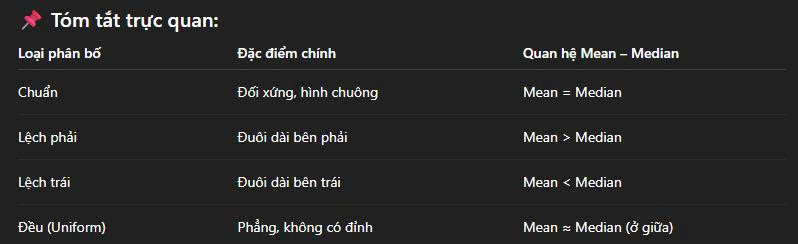

In [2]:
display(Image("image/tomtat.png"))

+ **Độ lệch chuẩn và phạm vi (range) có ý nghĩa gì trong việc đánh giá sự phân tán của dữ liệu?**

    + <u>**Phạm vi (range):**</u> cho biết <i>**khoảng trải rộng lớn nhất**</i> của dữ liệu (giá trị xa nhất so với giá trị nhỏ nhất).Range đơn giản dễ hiểu nhưng rất nhạy cảm outlier. Range = max(x)-min(x).

    + <u>**Độ lệch chuẩn (standard deviation - std):**</u> cho biết mức độ phân tán trung bình quanh giá trị trung bình của dữ liệu. Std nhỏ -> dữ liệu tập trung gần mean, Std lớn -> dữ liệu rải rác xa mean. Std sử dụng toàn bộ dữ liệu (phản ánh sự phân tán toàn diện hơn range), dễ kết hợp với phân bố chuẩn nhưng bị ảnh hưởng bởi outlier, ít cực đoan hơn range. <br>

        $$\text{Std} = \sqrt{\frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})^2}$$

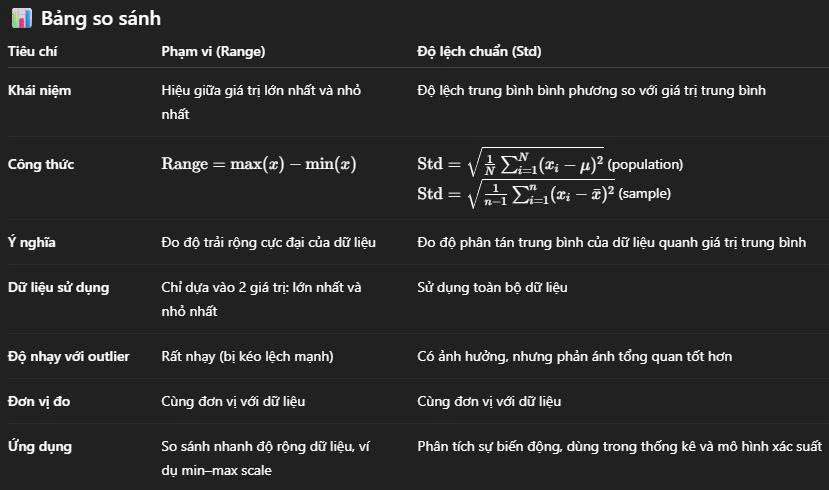

In [3]:
display(Image("image/sosanh.png"))

+ **Sự khác biệt giữa các thước đo như Q1, Q2, Q3 trong biểu đồ hộp (boxplot) là gì?**

    + <u>**Các thước đo Q1, Q2, Q3:**</u> trong thống kê, Q1, Q2, Q3 là các tứ phân vị (quartiles), tức là những điểm chia dữ liệu đã sắp xếp thành 4 phần bằng nhau: 

        + <i>**Q1 (First Quartile):**</i> là giá trị tại vị trí 25% dữ liệu nằm bên dưới. Nói cách khác: 25% nhỏ nhất ≤ Q1.
        + <i>**Q2 (Second Quartile):**</i> là trung vị (median). 50% dữ liệu nhỏ hơn Q2, 50% lớn hơn Q2.
        + <i>**Q3 (Third Quartile):**</i> là giá trị tại vị trí mà 75% dữ liệu nằm bên dưới. Nói cách khác: 25% lớn nhất”≥ Q3.

    + <u>**Vai trò trong Boxplot:**</u> Q1 là cạnh dưới của hộp, Q2 là đường ngang giữa hộp, Q3 là cạnh trên của hộp. Phân hộp thể hiện 50% dữ liệu trung tâm.

    + <u>**Liên quan đến IQR:**</u> IQR = Q3 - Q1 -> đo độ phân tán của 50% dữ liệu trung tâm. Trong boxplot, các râu (whiskers) thường vẽ đến: [Q1−1.5×IQR,Q3+1.5×IQR], những điểm nằm ngoài khoảng này là outlier.

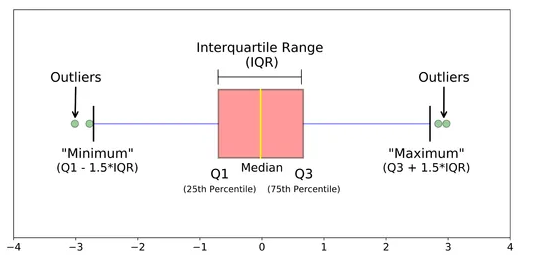

In [4]:
display(Image("image/boxplot.png"))

+ **Làm thế nào để xử lý giá trị thiếu (missing values) trước khi tính toán các chỉ số thống kê mô tả?**

    + <u>**1. Xác định giá trị thiếu:**</u> Trong dữ liệu, giá trị thiếu được hiển thị dưới dạng NaN, NA, NULL, ?, -9999,...

    + <u>**2. Các cách xử lý giá trị thiếu:**</u>
        + <i>**(a) Loại bỏ:**</i>
        **Loại bỏ hàng (row):** nếu số lượng giá trị thiếu ít và không ảnh hưởng lớn đến dữ liệu.
        **Loại bỏ cột (column):** nếu cột đó có quá nhiều giá trị thiếu (ví dụ >50%).
        **Ưu điểm:** đơn giản.
        **Nhược điểm:** mất thông tin, đặc biệt nếu dữ liệu không nhiều.
        + <i>**(b). Thay thế:**</i>
        **Thay thế bằng hằng số:** ví dụ 0 hoặc "Unknown" (dùng cho biến phân loại).
        **Thay thế bằng thống kê mô tả:** mean (dữ liệu chuẩn), median (dữ liệu lệch, có outlier), mode (biến phân loại).
        **Thay thế nâng cao:** sử dụng **KNN imputation** (giá trị gần nhất), **Regression imputation** (dự đoán giá trị thiếu dựa trên các biến khác), **Multiple imputation** (tạo nhiều bộ dữ liệu giả định và tổng hợp).
        + <i>**(c) Để nguyên nhưng dùng công thức xử lý NaN:**</i>
        Một số thư viện (Pandas, Numpy, R) có hàm thống kê bỏ qua NaN tự động.

    + <u>**3. Kết luận:**</u>
        + **Nếu dữ liệu nhiều, giá trị thiếu ít** -> có thể loại bỏ.
        + **Nếu dữ liệu ít, không thể bỏ** -> nên thay thế (mean/meadian/mode hoặc kỹ thuật nâng cao).
        + **Khi phân tích thống kê mô tả** -> nên dùng median nếu dữ liệu bị lệch, mean nếu dữ liệu chuẩn.

+ **Bạn có thể giải thích cách đọc và diễn giải một biểu đồ histogram hoặc boxplot từ dữ liệu thực tế không?**

    + <u>**1. Cách đọc Histogram:** hiển thị phân phối của một biến định lượng (số).</u>
        + Trục X (Ox): giá trị (chia thành các khoảng - bins).
        + Trục Y (Oy): số lượng (hoặc tần suất) dữ liệu trong mỗi khoảng.
        + Ý nghĩa khi đọc: 
            + Hình dạng phân bố:
            **Chuẩn (normal):** dạng chuông cân đối, mean ≈ median.
            **Lệch phải (right-skewed):** đuôi kéo dài sang phải → nhiều giá trị lớn bất thường.
            **Lệch trái (left-skewed):** đuôi kéo dài sang trái → nhiều giá trị nhỏ bất thường.
            + Độ tập trung: cột nào cao nhất -> giá trị phổ biến nhất.
            + Độ phân tán: Khoảng trải dài của histogram cho thấy dữ liệu phân tán rộng hay hẹp.

    + <u>**2. Cách đọc Boxplot:**</u> Boxplot tóm tắt dữ liệu dựa trên tứ phân vị.
        + Q1 (25%): giá trị mà 25% dữ liệu nhỏ hơn.
        + Q2 (50%, Median): trung vị.
        + Q3 (75%): giá trị mà 75% dữ liệu nhỏ hơn.
        + IQR (Q3 - Q1): khoảng giữa 50% dữ liệu.
        + Whiskers (các đường kéo ra 2 bên): thường là Q1 - 1.5×IQR và Q3 + 1.5×IQR.
        + Điểm ngoài (outliers): các chấm nằm ngoài whiskers.
        + Ý nghĩa khi đọc:
            + Vị trí hộp: cho biết trung tâm dữ liệu (median, Q1, Q3).
            + Độ rộng hộp (IQR): dữ liệu có phân tán nhiều hay ít.
            + So sánh median và hộp:
            Nếu median nằm gần đáy hộp → dữ liệu lệch phải.
            Nếu median nằm gần đỉnh hộp → dữ liệu lệch trái.
            + Outliers: số lượng điểm nằm ngoài → cho thấy dữ liệu bất thường.

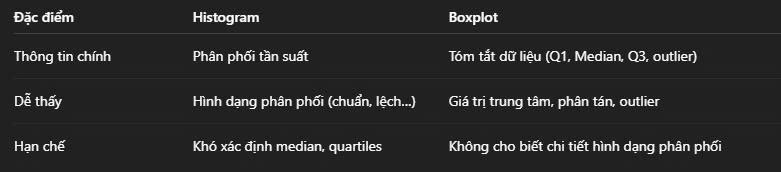

In [5]:
display(Image("image/sosanh1.png"))

+ **Khi gặp một tập dữ liệu có giá trị ngoại lai (outliers), bạn sẽ xử lý chúng như thế nào trước khi thực hiện thống kê mô tả?**

    + <u>**1. Phát hiện outliers:**</u>
        + Dùng Boxplot: điểm nằm ngoài Q1 − 1.5×IQR hoặc Q3 + 1.5×IQR.
        + Dùng Z-score: nếu |z| > 3 (cách xa hơn 3 độ lệch chuẩn).
        + Dùng mô hình robust: Median Absolute Deviation (MAD).

    + <u>**2. Cách xử lý outliers:**</u>
        + <i>**(a) Giữ nguyên (nếu hợp lý):**</i>
            + Nếu outlier phản ánh thực tế (ví dụ một vài sinh viên đạt 10 điểm tuyệt đối).
            + Thường giữ lại khi phân tích dữ liệu thực tế vì nó cung cấp thông tin quan trọng.
        + <i>**(b) Loại bỏ:**</i>
            + Nếu đó là lỗi nhập liệu, lỗi đo lường hoặc không có ý nghĩa với nghiên cứu.
            + Ví dụ: dữ liệu chiều cao học sinh, có 250 cm → nhiều khả năng do nhập sai.
        + <i>**(c) Thay thế (Capping/Winsorization):**</i>
            + Thay giá trị outlier bằng ngưỡng gần nhất trong khoảng chấp nhận được.
            + Ví dụ: thay mọi giá trị > Q3 + 1.5×IQR bằng Q3 + 1.5×IQR.
        + <i>**(d) Biến đổi dữ liệu (Transformation):**</i>
            + Dùng log, sqrt, Box-Cox transformation để giảm ảnh hưởng của outliers.
            + Ví dụ: phân phối thu nhập thường lệch phải, log-transform sẽ giúp phân bố cân đối hơn.
        + <i>**(e) Sử dụng thống kê bền vững (robust statistics):**</i>
            + Thay vì mean (nhạy cảm với outliers) → dùng median.
            + Thay vì variance/std → dùng IQR.
            + Các mô hình hồi quy có thể dùng robust regression để giảm ảnh hưởng của outliers.

    + <u>**3. Kết luận:**</u>
        + Nếu outlier do lỗi → loại bỏ hoặc sửa.
        + Nếu outlier hợp lệ → giữ lại nhưng dùng phương pháp robust (median, IQR).
        + Nếu cần mô hình chính xác hơn → có thể winsorization hoặc transformation.

#### **1.1.2. Bài làm mẫu**

##### <u>**Bài toán 1:**</u> Thực hiện các nhiệm vụ trong bài toán 1 để làm quen với các thao tác cần làm để khám phá dữ liệu 

<u>**Nhiệm vụ 1:**</u> Khám phá dữ liệu COVID lấy tại https://ourworldindata.org /coronavirus

1. Tính mean, median, mode, variance, standard deviation, range, percentile, quartile, interquartile range 
(IQR) sử dụng thư viện numpy và stats trên tập dữ liệu COVID.

- Import thư viện

In [6]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

- Đọc dữ liệu

In [7]:
covid_data = pd.read_csv("data/covid-data.csv")

covid_data = covid_data[['iso_code','continent','location',
                         'date','total_cases','new_cases']]

- Khám phá dữ liệu

In [8]:
print("5 dòng đầu của dữ liệu:")
print(covid_data.head(), "\n")

print("Thông tin dữ liệu:")
print(covid_data.info(), "\n")

print("Kích thước dữ liệu:", covid_data.shape, "\n")

5 dòng đầu của dữ liệu:
  iso_code continent location       date  total_cases  new_cases
0      FRA    Europe   France  3/14/2020         5134        345
1      VNM      Asia  Vietnam  3/19/2020         2734        445
2      IND      Asia    India  3/29/2020          202        183
3      FRA    Europe   France  3/19/2020         5116         95
4      FRA    Europe   France  3/17/2020          863        230 

Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   iso_code     150 non-null    object
 1   continent    150 non-null    object
 2   location     150 non-null    object
 3   date         150 non-null    object
 4   total_cases  150 non-null    int64 
 5   new_cases    150 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 7.2+ KB
None 

Kích thước dữ liệu: (150, 6) 



- **Nhận xét**

    + **Cấu trúc dữ liệu:**

        + Bộ dữ liệu có 150 quan sát (dòng) và 6 biến (cột).

        + Các cột gồm:

            iso_code: mã quốc gia theo ISO.

            continent: tên châu lục.

            location: tên quốc gia.

            date: ngày ghi nhận số liệu.

            total_cases: tổng số ca ghi nhận tính đến ngày đó.

            new_cases: số ca mới trong ngày.

    + **Kiểu dữ liệu:**

        + iso_code, continent, location, date → object (chuỗi).

        + total_cases, new_cases → int64 (số nguyên).

        + Nhìn chung, dữ liệu không có giá trị thiếu (Non-Null Count = 150 ở tất cả các cột).

    + **Kích thước dữ liệu:**

        + 150 dòng × 6 cột.

        + Dung lượng bộ dữ liệu nhỏ (7.2 KB), dễ dàng xử lý.

    + **Quan sát nhanh (5 dòng đầu tiên):**

        + Dữ liệu bao gồm nhiều quốc gia: France (FRA), Vietnam (VNM), India (IND)...

        + Số ca mới (new_cases) dao động khá lớn, ví dụ:

            France ngày 14/03/2020 có 345 ca mới.

            Vietnam ngày 19/03/2020 có 445 ca mới.

            India ngày 29/03/2020 chỉ có 183 ca mới.

        + Điều này cho thấy sự khác biệt lớn giữa các quốc gia và giai đoạn thời gian.

- Kiểm tra dữ liệu thiếu

In [9]:
print("Số lượng giá trị thiếu ở mỗi cột:")
print(covid_data.isnull().sum(), "\n")

Số lượng giá trị thiếu ở mỗi cột:
iso_code       0
continent      0
location       0
date           0
total_cases    0
new_cases      0
dtype: int64 



Dữ liệu không có giá trị thiếu ở bất kỳ cột nào

- Thống kê mô tả cơ bản

In [10]:
print("Thống kê mô tả:")
print(covid_data["new_cases"].describe(), "\n")

# Các chỉ số thống kê riêng lẻ
mean_val = np.mean(covid_data["new_cases"])
median_val = np.median(covid_data["new_cases"])
mode_val = stats.mode(covid_data["new_cases"], nan_policy='omit')
var_val = np.var(covid_data["new_cases"])
std_val = np.std(covid_data["new_cases"])
min_val = np.min(covid_data["new_cases"])
max_val = np.max(covid_data["new_cases"])
q1, q3 = np.percentile(covid_data["new_cases"].dropna(), [25, 75])
iqr_val = q3 - q1

print(f"Mean: {mean_val}")
print(f"Median: {median_val}")
mode_val = stats.mode(covid_data["new_cases"], keepdims=True)
print(f"Mode: {mode_val.mode[0]} (Xuất hiện {mode_val.count[0]} lần)")

print(f"Variance: {var_val}")
print(f"Standard Deviation: {std_val}")
print(f"Min: {min_val}")
print(f"Max: {max_val}")
print(f"Q1: {q1}")
print(f"Q3: {q3}")
print(f"IQR: {iqr_val}\n")

Thống kê mô tả:
count    150.000000
mean     256.906667
std      140.713348
min        1.000000
25%      147.500000
50%      244.500000
75%      371.250000
max      499.000000
Name: new_cases, dtype: float64 

Mean: 256.9066666666667
Median: 244.5
Mode: 112 (Xuất hiện 4 lần)
Variance: 19668.24462222222
Standard Deviation: 140.2435190025629
Min: 1
Max: 499
Q1: 147.5
Q3: 371.25
IQR: 223.75



- **Nhận xét:**
    + Trung bình (Mean) ≈ 257, trung vị (Median) = 244.5 → dữ liệu khá cân đối, mean và median gần nhau.

    + Giá trị thường gặp nhất (Mode) là 112, xuất hiện 4 lần.

    + Phương sai và độ lệch chuẩn (Std ≈ 140) cho thấy dữ liệu có mức độ phân tán tương đối lớn quanh giá trị trung bình.

    + Số ca mới dao động từ 1 đến 499, cho thấy khoảng biến thiên rộng.

    + Tứ phân vị: Q1 = 147.5, Q3 = 371.25, IQR = 223.75 → có sự chênh lệch lớn giữa nhóm ca thấp và nhóm ca cao.

- Phát hiện ngoại lai theo IQR

In [11]:
outliers = covid_data[(covid_data["new_cases"] < q1 - 1.5*iqr_val) |
                      (covid_data["new_cases"] > q3 + 1.5*iqr_val)]
print("Số lượng giá trị ngoại lai (outliers):", outliers.shape[0], "\n")

Số lượng giá trị ngoại lai (outliers): 0 



Không tìm thấy ngoại lai

- Trực quan hóa dữ liệu

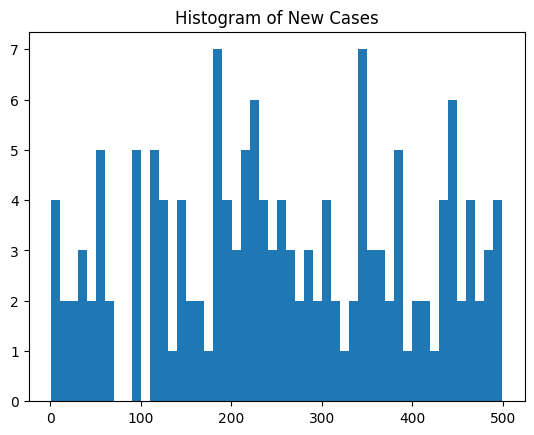

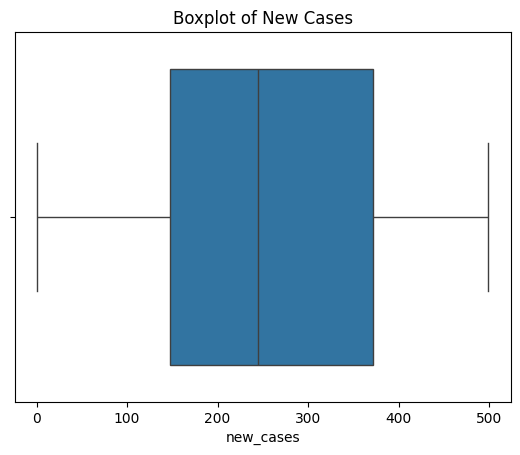

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.hist(covid_data["new_cases"].dropna(), bins=50)
plt.title("Histogram of New Cases")
plt.show()

# Boxplot
sns.boxplot(x=covid_data["new_cases"])
plt.title("Boxplot of New Cases")
plt.show()


<u>**Nhiệm vụ 2:**</u> Khám phá và xử lý dữ liệu Marketing Campaign lấy tại https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis 

**1. Giới thiệu dữ liệu:**

- Bộ dữ liệu chứa thông tin khách hàng như:

    + ID, năm sinh, trình độ học vấn.
    + Tình trạng hôn nhân, thu nhập, số con.
    + Thông tin về chi tiêu, thời gian làm khách hàng, số lần mua sắm…

+ Mục tiêu của việc xử lý dữ liệu là làm sạch và chuẩn bị dữ liệu cho các phân tích thống kê và mô hình sau này.

In [13]:
# 1. Import thư viện và đọc dữ liệu
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Đọc file dữ liệu
marketing_data = pd.read_csv("data/marketing_campaign.csv", sep='\t')

# Chọn các cột cần phân tích
marketing_data = marketing_data[['ID', 'Year_Birth', 'Education', 'Marital_Status',
    'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
    'Recency', 'MntWines', 'NumWebVisitsMonth']]

print("Kích thước dữ liệu mới:", marketing_data.shape)
print("\n5 dòng đầu tiên của dữ liệu đã chọn:")
print(marketing_data.head())

Kích thước dữ liệu mới: (2240, 11)

5 dòng đầu tiên của dữ liệu đã chọn:
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  NumWebVisitsMonth  
0  04-09-2012       58       635                  7  
1  08-03-2014       38        11                  5  
2  21-08-2013       26       426                  4  
3  10-02-2014       26        11                  6  
4  19-01-2014       94       173                  5  


+ **Kích thước:** 2.240 dòng và 11 cột → dữ liệu khá lớn, đủ để phân tích thống kê và mô hình.

+ **Các biến:** gồm cả thông tin nhân khẩu học (ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome), thông tin khách hàng (Dt_Customer, Recency), và hành vi tiêu dùng (MntWines, NumWebVisitsMonth).

+ **Dữ liệu 5 dòng đầu:**

    + Có sự đa dạng về trình độ học vấn và tình trạng hôn nhân.
    + Thu nhập (Income) khác biệt khá lớn (ví dụ: 26.646 đến 71.613).
    + Số trẻ em (Kidhome, Teenhome) nhìn chung không lớn (0–1).
    + Biến Recency (gần nhất khách hàng mua hàng) và NumWebVisitsMonth cho thấy hành vi mua khác nhau.

+ **Thông tin dữ liệu:**

In [14]:
print("\nThông tin dữ liệu:")
print(marketing_data.info())
print("\nSố lượng giá trị thiếu:\n", marketing_data.isnull().sum())


Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2240 non-null   int64  
 1   Year_Birth         2240 non-null   int64  
 2   Education          2240 non-null   object 
 3   Marital_Status     2240 non-null   object 
 4   Income             2216 non-null   float64
 5   Kidhome            2240 non-null   int64  
 6   Teenhome           2240 non-null   int64  
 7   Dt_Customer        2240 non-null   object 
 8   Recency            2240 non-null   int64  
 9   MntWines           2240 non-null   int64  
 10  NumWebVisitsMonth  2240 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 192.6+ KB
None

Số lượng giá trị thiếu:
 ID                    0
Year_Birth            0
Education             0
Marital_Status        0
Income               24
Kidhome               0
Teenhome  

+ Dữ liệu gồm 2240 quan sát và 11 biến, trong đó có cả biến định tính (Education, Marital_Status) và định lượng (Income, Recency, MntWines, …).

+ Hầu hết các cột đều đầy đủ giá trị, ngoại trừ cột Income còn thiếu 24 giá trị.

+ Các biến số (Year_Birth, Recency, MntWines, …) đều ở dạng số nguyên, phù hợp cho phân tích thống kê.

+ Biến ngày (Dt_Customer) hiện ở dạng chuỗi (object), cần chuyển sang kiểu datetime để phân tích theo thời gian.

**2. Loại bỏ dữ liệu trùng lặp**

+ Thực hiện loại bỏ các bản ghi bị trùng lặp để tránh sai lệch kết quả phân tích.

+ Ngoài ra, có thể xóa một số dòng hoặc cột không cần thiết bằng phương thức drop().


In [15]:
before = marketing_data.shape[0]
marketing_data = marketing_data.drop_duplicates()
after = marketing_data.shape[0]
print(f"\nĐã loại bỏ {before - after} dòng trùng lặp.")


Đã loại bỏ 0 dòng trùng lặp.


**3. Thay thế và chuẩn hóa dữ liệu**

+ Với cột Teenhome, thay thế giá trị số (0, 1, 2) thành dạng nhãn có ý nghĩa: "has no teen" và "has teen".

+ Với cột Income, thay thế các giá trị khuyết (NaN) bằng 0 và chuyển kiểu dữ liệu từ float sang int.

In [16]:
# Teenhome: thay số bằng nhãn
marketing_data['Teenhome_label'] = marketing_data['Teenhome'].replace(
    {0:'has no teen', 1:'has teen', 2:'has teen'}
)

# Income: thay NA bằng 0, đổi sang int
marketing_data['Income'] = marketing_data['Income'].fillna(0).astype(int)

# Chuyển cột Dt_Customer sang datetime
marketing_data['Dt_Customer'] = pd.to_datetime(marketing_data['Dt_Customer'], errors='coerce')


**4. Xử lý dữ liệu thiếu**

+ Kiểm tra số lượng giá trị thiếu bằng isnull().sum().

+ Loại bỏ các dòng chứa giá trị thiếu bằng phương thức dropna().

+ Sau xử lý, dữ liệu đã hoàn chỉnh, sẵn sàng cho bước phân tích tiếp theo.

In [17]:
print("\nSố lượng giá trị thiếu sau khi xử lý:")
print(marketing_data.isnull().sum())

# Nếu muốn loại bỏ các dòng còn thiếu
marketing_data_clean = marketing_data.dropna()
print("Kích thước dữ liệu sau khi loại bỏ NA:", marketing_data_clean.shape)


Số lượng giá trị thiếu sau khi xử lý:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                  0
Kidhome                 0
Teenhome                0
Dt_Customer          1324
Recency                 0
MntWines                0
NumWebVisitsMonth       0
Teenhome_label          0
dtype: int64
Kích thước dữ liệu sau khi loại bỏ NA: (916, 12)


**5. Thống kê mô tả & trực quan cơ bản**


Thống kê mô tả:
                 ID   Year_Birth         Income     Kidhome    Teenhome  \
count    916.000000   916.000000     916.000000  916.000000  916.000000   
mean    5789.707424  1968.980349   52789.858079    0.451965    0.512009   
min        0.000000  1940.000000       0.000000    0.000000    0.000000   
25%     2926.000000  1959.000000   34421.000000    0.000000    0.000000   
50%     5853.500000  1971.000000   52541.000000    0.000000    0.000000   
75%     8640.250000  1978.000000   68655.000000    1.000000    1.000000   
max    11191.000000  1996.000000  666666.000000    2.000000    2.000000   
std     3258.724478    11.810139   30603.577397    0.548108    0.546092   

                         Dt_Customer     Recency     MntWines  \
count                            916  916.000000   916.000000   
mean   2013-07-01 05:36:25.152838656   48.764192   306.784934   
min              2012-01-08 00:00:00    0.000000     0.000000   
25%              2013-01-05 18:00:00   24.00000

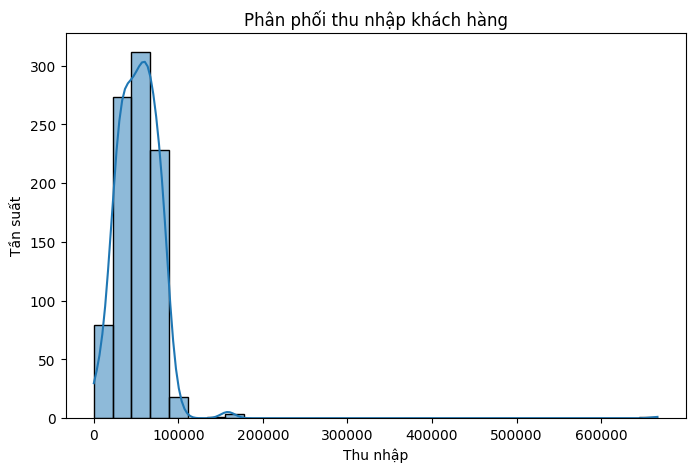

In [18]:
print("\nThống kê mô tả:")
print(marketing_data_clean.describe())

# Vẽ phân phối thu nhập
plt.figure(figsize=(8,5))
sns.histplot(marketing_data_clean['Income'], bins=30, kde=True)
plt.title("Phân phối thu nhập khách hàng")
plt.xlabel("Thu nhập")
plt.ylabel("Tần suất")
plt.show()

#### **1.1.3. Bài tập thực hành 1**
Thực hiện thống kê mô tả trên tập dữ liệu về phân loại chất lượng rượu đỏ.  
Dữ liệu lấy tại https://www.kaggle.com/code/eisgandar/red-wine-quality-eda-classification 

**1. Định nghĩa vấn đề**

- Bộ dữ liệu về chất lượng rượu vang đỏ (Wine Quality - Red Wine) được thu thập từ quá trình phân tích các chỉ số hóa học của rượu vang và đánh giá chất lượng bởi chuyên gia.  

- Mục tiêu là phân tích thống kê mô tả để hiểu rõ đặc điểm của các biến đầu vào và biến mục tiêu, từ đó làm cơ sở cho các bước phân tích và mô hình hóa sau này.

- **Dữ liệu vào (Input features):**

    - **Fixed acidity**: Nồng độ axit cố định (g/dm³)  
    - **Volatile acidity**: Nồng độ axit bay hơi (g/dm³)  
    - **Citric acid**: Hàm lượng axit citric (g/dm³)  
    - **Residual sugar**: Lượng đường còn dư (g/dm³)  
    - **Chlorides**: Nồng độ chloride (g/dm³)  
    - **Free sulfur dioxide**: Lượng SO₂ tự do (mg/dm³)  
    - **Total sulfur dioxide**: Tổng lượng SO₂ (mg/dm³)  
    - **Density**: Khối lượng riêng (g/cm³)  
    - **pH**: Chỉ số pH  
    - **Sulphates**: Nồng độ sulphate (g/dm³)  
    - **Alcohol**: Nồng độ cồn (% thể tích)  

- **Kết quả (Output):**

    - **Quality**: Điểm đánh giá chất lượng rượu (giá trị nguyên từ 0–10, càng cao thì chất lượng càng tốt)

**2. Đọc và hiểu dữ liệu**

- Import thư viện cần thiết:

In [22]:
import pandas as pd
import numpy as np

from IPython import display

- Tải dữ liệu

In [23]:
df = pd.read_csv("data/winequality-red.csv")
X = df.drop("quality", axis=1)
y = df["quality"]

**3. Phân tích dữ liệu**

**a. Thống kê mô tả**

- Thông tin chung về dữ liệu:

    - Số dòng và số cột trong dữ liệu.


    - Kiểu dữ liệu của từng biến.
    - Ý nghĩa và đơn vị đo lường của các biến:

        + **fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, sulphates**: g/dm³  
        + **free sulfur dioxide, total sulfur dioxide**: mg/dm³  
        + **density**: g/cm³  
        + **pH**: chỉ số pH (không có đơn vị)  
        + **alcohol**: % (phần trăm thể tích)  
        + **quality**: điểm đánh giá chất lượng rượu (thang đo rời rạc)

- Kiểm tra chất lượng dữ liệu:

    - Kiểm tra dữ liệu trùng lặp.

    - Kiểm tra giá trị Null/NaN.

- Thống kê tóm tắt các biến số:

    - Các thước đo thống kê cơ bản: giá trị nhỏ nhất, lớn nhất, trung bình, trung vị, độ lệch chuẩn, các phân vị.

    - Bổ sung median vì describe() không mặc định tính.

- Phân bố biến phân loại (quality):

    - Tính tần số xuất hiện của từng mức chất lượng rượu.

    - Tính thêm tỷ lệ phần trăm để thấy mức độ phân bố.

- Nhận xét sơ bộ:

    - So sánh giá trị trung bình và độ biến thiên giữa các biến.

    - Nhận diện các biến có khoảng dao động rộng hoặc khả năng có ngoại lệ.
    
    - Đặc điểm phân bố của biến mục tiêu quality.

In [24]:
# (1) Thông tin chung
print("Kích thước dữ liệu:", df.shape)
print("\nKiểu dữ liệu:\n", df.dtypes)
print("\n5 dòng đầu:",df.head() )
print("\n5 dòng cuối:",df.tail())
print("\nThông tin tổng quan:")
df.info()

# (2) Kiểm tra chất lượng dữ liệu
print("\n--- Kiểm tra dữ liệu ---")
print("Số dòng trùng lặp:", df.duplicated().sum())
print("Có giá trị Null:", df.isnull().sum().any())
print("Có giá trị NaN:", df.isna().sum().any())

# (3) Thống kê tóm tắt các biến số
print("\n--- Bảng thống kê describe() ---", df.describe().T)

print("\n--- Median của các biến ---", df.median(numeric_only=True))

# (4) Phân bố biến phân loại (quality)
print("\n--- Tần số xuất hiện của quality ---", df['quality'].value_counts().sort_index())

print("\n--- Tỷ lệ phần trăm của quality ---", df['quality'].value_counts(normalize=True).sort_index() * 100)

Kích thước dữ liệu: (1599, 12)

Kiểu dữ liệu:
 fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

5 dòng đầu:    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \

+ Dữ liệu có 11 tính chất để phân lớp: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide,total sulfur dioxide, density, pH, sulphates, alcohol.

+ Đơn vị nồng độ: Hầu hết các thành phần hóa học (fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, sulphates) đều được đo bằng g/dm3.

+ SO2: Các chỉ số sulfur dioxide thường được đo bằng mg/dm3 vì chúng thường có nồng độ thấp hơn nhiều.

+ Kích thước tập dữ liệu gồm 1599 hàng và 12 cột.

+ Dữ liệu để phân lớp ở cột quality.

**b. Kiểm tra tính toàn vẹn của dữ liệu**

+ Dữ liệu có bị trùng lặp không? Hiển thị dòng bị vi phạm.

+ Dữ liệu có tồn tại giá trị Null không? Hiển thị dòng bị vi phạm.

+ Dữ liệu có tồn tại giá trị NaN không? Hiển thị dòng bị vi phạm

In [25]:
has_null = df.isnull().sum().any()
has_nan  = df.isna().sum().any()
n_duplicated = df.duplicated().sum()
print(f'Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(df[df.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(df[df.isna().any(axis=1)])
print(f'+ Số dòng trùng: {n_duplicated}')
if n_duplicated>0:
    display.display(df[df.duplicated()])

Tính toàn vẹn dữ liệu:
+ Có giá trị Null: False
+ Có giá trị Nan: False
+ Số dòng trùng: 240


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13            2.00      0.076   
1564            7.2             0.695         0.13            2.00      0.076   
1567            7.2             0.695         0.13            2.00      0.076   
1581            6.2             0.560         0.09            1.70      0.053   
1596            6.3             0.510         0.13            2.30      0.076   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4                    11.0                  34.0  0.99780  3.51       0.56   
11                   17.0                 102.0  0.99780  3.35       0.80   
27                   10.0                  37.0  0.99660  3.17       0.91   
40                   12.0                  87.0  0.99780  3.33       0.83   
65                    4.0                  11.0  0.99620  3.41       0.39   
...                   ...                   ...      ...   ...        ...   
1563                 12.0                  20.0  0.99546  3.29       0.54   
1564                 12.0                  20.0  0.99546  3.29       0.54   
1567                 12.0                  20.0  0.99546  3.29       0.54   
1581                 24.0                  32.0  0.99402  3.54       0.60   
1596                 29.0                  40.0  0.99574  3.42       0.75   

      alcohol  quality  
4         9.4        5  
11       10.5        5  
27        9.5        5  
40       10.5        5  
65       10.9        5  
...       ...      ...  
1563     10.1        5  
1564     10.1        5  
1567     10.1        5  
1581     11.3        5  
1596     11.0        6  

[240 rows x 12 columns]

- **Nhận xét:**

    + Dữ liệu có 240 dòng bị trùng.
    
    + Dữ liệu không có giá trị bị rỗng.

**4. Thống kê mô tả tổng quát**

In [26]:
import pandas as pd


# --- 1. Tính toán các chỉ số thống kê cơ bản và tùy chỉnh ---

# Tính Mean, Median, Variance, và Standard Deviation
basic_stats = df.agg(['mean', 'median', 'var', 'std']).T
basic_stats = basic_stats.rename(columns={'mean': 'Mean', 'median': 'Median', 'var': 'Variance', 'std': 'Standard Deviation'})

# Tính Min, Max, Quartiles (Q1, Q3)
desc_stats = df.describe().T[['min', 'max', '25%', '75%']]
desc_stats = desc_stats.rename(columns={'min': 'Min', 'max': 'Max', '25%': 'Q1 (25th Pct)', '75%': 'Q3 (75th Pct)'})

# Tính Range (Phạm vi)
desc_stats['Range'] = desc_stats['Max'] - desc_stats['Min']

# Tính IQR (Interquartile Range: Q3 - Q1)
desc_stats['IQR'] = desc_stats['Q3 (75th Pct)'] - desc_stats['Q1 (25th Pct)']

# Tính thêm Percentiles (ví dụ: 10th và 90th percentile)
percentiles = df.quantile([0.1, 0.9]).T
percentiles = percentiles.rename(columns={0.1: '10th Percentile', 0.9: '90th Percentile'})

# Tính Mode (Yếu vị)
# Lấy giá trị mode đầu tiên nếu có nhiều hơn một mode
mode_series = df.mode().iloc[0]
mode_df = mode_series.to_frame(name='Mode').T.rename(index={0: 'Mode'})

# --- 2. Kết hợp tất cả các kết quả vào một DataFrame duy nhất ---

# Kết hợp các bảng
final_stats = pd.merge(basic_stats, desc_stats, left_index=True, right_index=True)
final_stats = pd.merge(final_stats, percentiles, left_index=True, right_index=True)
final_stats = pd.merge(final_stats, mode_df.T, left_index=True, right_index=True)

# Sắp xếp lại và làm tròn các cột cho dễ đọc
column_order = [
    'Mean', 'Median', 'Mode', 'Standard Deviation', 'Variance',
    'Min', 'Max', 'Range', 'Q1 (25th Pct)', 'Q3 (75th Pct)', 'IQR',
    '10th Percentile', '90th Percentile'
]
final_stats = final_stats[column_order]

# --- 3. Hiển thị kết quả ---
print("### Bảng Tổng Hợp Thống Kê Mô Tả Toàn Diện ###")
# Hiển thị kết quả, làm tròn 3 chữ số thập phân
print(final_stats.round(3))

### Bảng Tổng Hợp Thống Kê Mô Tả Toàn Diện ###
                        Mean  Median    Mode  Standard Deviation  Variance  \
fixed acidity          8.320   7.900   7.200               1.741     3.031   
volatile acidity       0.528   0.520   0.600               0.179     0.032   
citric acid            0.271   0.260   0.000               0.195     0.038   
residual sugar         2.539   2.200   2.000               1.410     1.988   
chlorides              0.087   0.079   0.080               0.047     0.002   
free sulfur dioxide   15.875  14.000   6.000              10.460   109.415   
total sulfur dioxide  46.468  38.000  28.000              32.895  1082.102   
density                0.997   0.997   0.997               0.002     0.000   
pH                     3.311   3.310   3.300               0.154     0.024   
sulphates              0.658   0.620   0.600               0.170     0.029   
alcohol               10.423  10.200   9.500               1.066     1.136   
quality          

- **Trung tâm dữ liệu:**

    + Fixed acidity trung bình ≈ 8.32, alcohol ≈ 10.42.
    + Quality trung vị = 6 → phần lớn rượu chất lượng trung bình.
    + Citric acid mode = 0 → nhiều rượu không có citric acid.

- **Biến thiên:**

    + Total sulfur dioxide SD = 32.9 → phân tán lớn, nhiều outlier.
    + Density SD = 0.002 → hầu hết rượu đồng nhất về mật độ.
    + Residual sugar range = 14.6 → có rượu ngọt cực đoan.

- **Phân bố:**

    + Alcohol IQR = 1.6 → 50% rượu nằm trong 9.5–11.1 độ cồn.
    + Free sulfur dioxide 90th percentile = 31 → rượu chứa SO₂ cao.
    + pH ổn định, SD = 0.154.

- **Nhận xét**:

    + Độ axit lệch phải, nhiều rượu axit cao.
    + Đường, SO₂ phân bố lệch phải, xuất hiện giá trị cực đoan.
    + Density đồng đều, alcohol biến thiên vừa phải.

#### **1.1.4. Bài tập thực hành 2** 
Thực hiện thống kê mô tả trên tập dữ liệu về bệnh tiểu đường. Dữ liệu lấy tại 
https://www.kaggle.com/code/vincentlugat/pima-indians-diabetes-eda-prediction-0-906

**1. Định nghĩa vấn đề**

- Mô tả: Bộ dữ liệu về bệnh đái tháo đường Pima Indian (Pima Indians Diabetes Dataset) được thu thập từ cộng đồng người da đỏ Pima.

- Dữ liệu này bao gồm nhiều đặc điểm lâm sàng và nhân khẩu học của bệnh nhân.

- Mục tiêu là dự đoán khả năng mắc bệnh tiểu đường (diabetes) của một cá nhân dựa trên các thông tin y tế cơ bản.

+ Dữ liệu vào (Input features):

    + Số lần mang thai (Pregnancies).
    + Nồng độ glucose huyết tương sau 2 giờ (Glucose).
    + Huyết áp tâm trương (BloodPressure).
    + Độ dày nếp gấp da (SkinThickness).
    + Nồng độ insulin (Insulin).
    + Số khối cơ thể (BMI).
    + Chức năng phả hệ tiểu đường (DiabetesPedigreeFunction).
    + Tuổi (Age).

+ Kết quả (Output):

    + Outcome (0 = Không mắc bệnh, 1 = Mắc bệnh).

**2. Đọc và hiểu dữ liệu**

- Import thư viện cần thiết:

In [27]:
import pandas as pd
import numpy as np

from IPython import display

- Tải dữ liệu:

In [29]:
import pandas as pd
df = pd.read_csv("data/diabetes.csv")   # cần có file diabetes.csv (Pima dataset)
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

**3. Phân tích dữ liệu**

**a. Thống kê mô tả**

- Thông tin chung về dữ liệu: 

    - Số dòng và số cột trong dữ liệu.
    - Kiểu dữ liệu của từng biến.
    - Ý nghĩa và đơn vị đo lường của các biến:

        * **Pregnancies**: số lần mang thai (lần).
        * **Glucose**: nồng độ glucose trong huyết tương lúc đói (mg/dL).
        * **BloodPressure**: huyết áp tâm thu (mmHg).
        * **SkinThickness**: độ dày nếp gấp da (mm).
        * **Insulin**: nồng độ insulin (µU/mL).
        * **BMI**: chỉ số khối cơ thể (kg/m²).
        * **DiabetesPedigreeFunction (DPF)**: chỉ số nguy cơ di truyền (không có đơn vị).
        * **Age**: tuổi (năm).
        * **Outcome**: kết quả chẩn đoán bệnh tiểu đường (0 = không mắc, 1 = mắc bệnh).

- Kiểm tra chất lượng dữ liệu: 

    * Kiểm tra dữ liệu trùng lặp.
    * Kiểm tra giá trị Null/NaN hoặc các giá trị không hợp lý (ví dụ: Glucose = 0, BloodPressure = 0, BMI = 0, vì trong thực tế không thể có giá trị 0).

- Thống kê tóm tắt các biến số:

    * Các thước đo thống kê cơ bản: giá trị nhỏ nhất, lớn nhất, trung bình, trung vị, độ lệch chuẩn, các phân vị.
    * Bổ sung **median** vì **describe()** mặc định không tính trung vị.

- Phân bố biến phân loại (Outcome):

    * Tính tần số xuất hiện của từng nhóm bệnh (0 = không bệnh, 1 = bệnh).
    * Tính tỷ lệ phần trăm để đánh giá mức độ phân bố giữa hai nhóm.

- Nhận xét sơ bộ:

    * So sánh giá trị trung bình và độ biến thiên giữa các biến.
    * Nhận diện các biến có khoảng dao động rộng hoặc khả năng có ngoại lệ (ví dụ: Insulin, SkinThickness).
    * Đặc điểm phân bố của biến mục tiêu **Outcome**: cân bằng hay lệch, từ đó xác định vấn đề phân lớp có bị mất cân bằng dữ liệu hay không.

In [30]:
# (1) Thông tin chung
print("Kích thước dữ liệu:", df.shape)
print("\nKiểu dữ liệu:\n", df.dtypes)
print("\n5 dòng đầu:",df.head() )
print("\n5 dòng cuối:",df.tail())
print("\nThông tin tổng quan:")
df.info()

# (2) Kiểm tra chất lượng dữ liệu
print("\n--- Kiểm tra dữ liệu ---")
print("Số dòng trùng lặp:", df.duplicated().sum())
print("Có giá trị Null:", df.isnull().sum().any())
print("Có giá trị NaN:", df.isna().sum().any())

# (3) Thống kê tóm tắt các biến số
print("\n--- Bảng thống kê describe() ---", df.describe().T)

print("\n--- Median của các biến ---", df.median(numeric_only=True))

# (4) Phân bố biến phân loại (Outcome)
print("\n--- Tần số xuất hiện của Outcome ---", df['Outcome'].value_counts().sort_index())

print("\n--- Tỷ lệ phần trăm của Outcome ---", df['Outcome'].value_counts(normalize=True).sort_index() * 100)

Kích thước dữ liệu: (768, 9)

Kiểu dữ liệu:
 Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

5 dòng đầu:    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32       

- **Kích thước và cấu trúc dữ liệu:** 

    - Dữ liệu có 768 quan sát, 9 biến, không có giá trị trùng lặp hay thiếu.
    - Dữ liệu có 8 tính chất để phân lớp:Pregnancies, glucose, bloodPressure, skinThickness,Insulin, BMI,DiabetesPedigreeFunction, age.

- **Các biến:** Bao gồm các chỉ số sinh lý (Glucose, BloodPressure, SkinThickness, Insulin, BMI), tuổi, tiền sử thai kỳ (Pregnancies), chỉ số di truyền (DiabetesPedigreeFunction) và kết quả bệnh (Outcome).

- **Thống kê tổng quan:**

   * Giá trị trung bình và trung vị gần nhau với một số biến như BMI (mean ≈ 32, median = 32), cho thấy phân bố không lệch nhiều.
   * Một số biến có giá trị 0 đáng chú ý (Glucose, BloodPressure, SkinThickness, Insulin, BMI), có thể cần xử lý vì về mặt sinh lý 0 là không hợp lý.
   * Biến Insulin có độ lệch chuẩn lớn (115), phân bố không đồng đều, có nhiều giá trị cực trị.

- **Outcome (kết quả bệnh):**

   * Có 268 người mắc bệnh (≈35%) và 500 người không mắc (≈65%). Dữ liệu hơi lệch về nhóm không bệnh.

**b. Kiểm tra tính toàn vẹn của dữ liệu**

- Dữ liệu có bị trùng lặp không? Hiển thị dòng bị vi phạm.
- Dữ liệu có tồn tại giá trị Null không? Hiển thị dòng bị vi phạm.
- Dữ liệu có tồn tại giá trị NaN không? Hiển thị dòng bị vi phạm.

In [31]:
has_null = df.isnull().sum().any()
has_nan  = df.isna().sum().any()
n_duplicated = df.duplicated().sum()
print(f'Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(df[df.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(df[df.isna().any(axis=1)])
print(f'+ Số dòng trùng: {n_duplicated}')
if n_duplicated>0:
    display.display(df[df.duplicated()])

Tính toàn vẹn dữ liệu:
+ Có giá trị Null: False
+ Có giá trị Nan: False
+ Số dòng trùng: 0


- **Nhận xét:**

    + Dữ liệu có 240 dòng bị trùng.
    + Dữ liệu không có giá trị bị rỗng.

**4. Thống kê mô tả tổng quát**

In [32]:
# --- 1. Tính toán các chỉ số thống kê cơ bản và tùy chỉnh ---

# Tính Mean, Median, Variance, và Standard Deviation
basic_stats = df.agg(['mean', 'median', 'var', 'std']).T
basic_stats = basic_stats.rename(columns={'mean': 'Mean', 'median': 'Median', 'var': 'Variance', 'std': 'Standard Deviation'})

# Tính Min, Max, Quartiles (Q1, Q3)
desc_stats = df.describe().T[['min', 'max', '25%', '75%']]
desc_stats = desc_stats.rename(columns={'min': 'Min', 'max': 'Max', '25%': 'Q1 (25th Pct)', '75%': 'Q3 (75th Pct)'})

# Tính Range (Phạm vi)
desc_stats['Range'] = desc_stats['Max'] - desc_stats['Min']

# Tính IQR (Interquartile Range: Q3 - Q1)
desc_stats['IQR'] = desc_stats['Q3 (75th Pct)'] - desc_stats['Q1 (25th Pct)']

# Tính thêm Percentiles (ví dụ: 10th và 90th percentile)
percentiles = df.quantile([0.1, 0.9]).T
percentiles = percentiles.rename(columns={0.1: '10th Percentile', 0.9: '90th Percentile'})

# Tính Mode (Yếu vị)
# Lấy giá trị mode đầu tiên nếu có nhiều hơn một mode
mode_series = df.mode().iloc[0]
mode_df = mode_series.to_frame(name='Mode').T.rename(index={0: 'Mode'})

# --- 2. Kết hợp tất cả các kết quả vào một DataFrame duy nhất ---

# Kết hợp các bảng
final_stats = pd.merge(basic_stats, desc_stats, left_index=True, right_index=True)
final_stats = pd.merge(final_stats, percentiles, left_index=True, right_index=True)
final_stats = pd.merge(final_stats, mode_df.T, left_index=True, right_index=True)

# Sắp xếp lại và làm tròn các cột cho dễ đọc
column_order = [
    'Mean', 'Median', 'Mode', 'Standard Deviation', 'Variance',
    'Min', 'Max', 'Range', 'Q1 (25th Pct)', 'Q3 (75th Pct)', 'IQR',
    '10th Percentile', '90th Percentile'
]
final_stats = final_stats[column_order]

# --- 3. Hiển thị kết quả ---
print("### Bảng Tổng Hợp Thống Kê Mô Tả Toàn Diện ###")
# Hiển thị kết quả, làm tròn 3 chữ số thập phân
print(final_stats.round(3))

### Bảng Tổng Hợp Thống Kê Mô Tả Toàn Diện ###
                             Mean   Median    Mode  Standard Deviation  \
Pregnancies                 3.845    3.000   1.000               3.370   
Glucose                   120.895  117.000  99.000              31.973   
BloodPressure              69.105   72.000  70.000              19.356   
SkinThickness              20.536   23.000   0.000              15.952   
Insulin                    79.799   30.500   0.000             115.244   
BMI                        31.993   32.000  32.000               7.884   
DiabetesPedigreeFunction    0.472    0.372   0.254               0.331   
Age                        33.241   29.000  22.000              11.760   
Outcome                     0.349    0.000   0.000               0.477   

                           Variance     Min     Max    Range  Q1 (25th Pct)  \
Pregnancies                  11.354   0.000   17.00   17.000          1.000   
Glucose                    1022.248   0.000  199.00  1

- **Phân bố dữ liệu:** Các biến như Glucose, Insulin và SkinThickness có giá trị tối thiểu bằng 0, cho thấy có khả năng dữ liệu thiếu hoặc không hợp lý về mặt sinh lý.

- **Trung bình và trung vị:** Nhiều biến (BMI, Age, Pregnancies) có giá trị trung bình gần trung vị, chỉ ra phân bố tương đối cân bằng; nhưng Insulin và SkinThickness lệch phải do một số giá trị cực trị lớn.

- **Biến Outcome:** Tỷ lệ mắc bệnh ≈ 35%, không cân bằng nhưng vẫn đủ để phân tích.

- **Độ biến thiên:** Insulin có phương sai và độ lệch chuẩn rất lớn (≈115), cho thấy phân bố dữ liệu không đồng đều; các biến còn lại biến thiên vừa phải.

- **Khoảng tứ phân vị (IQR):** Cho thấy sự phân bố dữ liệu rộng nhất ở Insulin, SkinThickness và Glucose, trong khi các biến như DiabetesPedigreeFunction, Age và BMI phân bố đều hơn.


### **1.2. XỬ LÝ VÀ TRỰC QUAN HÓA DỮ LIỆU**

#### **1.2.1. Ôn tập lý thuyết**

+ **Trực quan hóa dữ liệu có vai trò gì trong phân tích dữ liệu? Tại sao nó quan trọng trong khám phá dữ liệu (EDA)?**

    + <u>**1. Vai trò của trực quan hóa dữ liệu**</u>

        + <i>**(a). Biến dữ liệu khô khan thành trực quan dễ hiểu.**</i>

            Dữ liệu dạng bảng (hàng/cột) khó phát hiện xu hướng.

            Biểu đồ (histogram, boxplot, scatter plot…) giúp nắm bắt nhanh cấu trúc dữ liệu.

        + <i>**(b). Phát hiện quy luật, xu hướng.**</i>

            Ví dụ: doanh thu tăng theo thời gian, mối quan hệ giữa chiều cao và cân nặng.

        + <i>**(c). Nhận diện bất thường (outliers, missing, noise).**</i>

            Boxplot cho thấy ngay giá trị ngoại lai.

            Scatter plot có thể phát hiện điểm “khác biệt hẳn” khỏi phần lớn dữ liệu.

        + <i>**(d). So sánh giữa các nhóm/biến.**</i>

            Biểu đồ cột, violin plot, stacked bar chart cho phép so sánh phân phối hoặc trung bình giữa nhiều nhóm.

        + <i>**(e). Hỗ trợ ra quyết định và truyền đạt kết quả.**</i>

            Một biểu đồ rõ ràng dễ thuyết phục hơn bảng số liệu dài.

            Giúp chia sẻ insight với người không chuyên về thống kê.

    + <u>**2. Tại sao quan trọng trong EDA (Exploratory Data Analysis)?**</u>

        + EDA là giai đoạn khám phá dữ liệu trước khi mô hình hóa. Trực quan hóa giúp:

            (-) Hiểu phân phối dữ liệu: Histogram, KDE plot.

            (-) Hiểu mối quan hệ giữa biến: Scatter plot, heatmap (ma trận tương quan).

            (-) Xác định dữ liệu mất cân bằng: Bar chart cho biến phân loại.

            (-) Phát hiện vấn đề chất lượng dữ liệu: Missing values, dữ liệu nhập sai.

            (-) Đưa ra giả thuyết phân tích tiếp theo: ví dụ thấy biến X liên quan mạnh đến Y → cân nhắc đưa vào mô hình dự đoán.

    + <u>**3. Ví dụ minh họa**</u>

        + 📊 Giả sử bạn có dữ liệu điểm thi 200 sinh viên:

            + Histogram: thấy phân phối lệch phải → nhiều sinh viên điểm thấp, ít sinh viên điểm cao.

            + Boxplot: phát hiện vài sinh viên đạt 10 tuyệt đối (outlier).

            + Scatter plot (giữa số giờ học và điểm): thấy xu hướng dương → học nhiều thì điểm cao.

            + Heatmap (ma trận tương quan): thấy điểm Toán và Vật lý có tương quan mạnh.

            <i>**→ Những insight này khó nhận ra nếu chỉ nhìn bảng số liệu.**</i>

        + ✅ <i>**Tóm lại:**</i> Trực quan hóa dữ liệu chính là “ngôn ngữ trực quan” giúp nhà phân tích hiểu dữ liệu, phát hiện mẫu, bất thường và truyền đạt kết quả.

+ **Các loại biểu đồ phổ biến (như histogram, scatter plot, boxplot, bar chart) được sử dụng trong các trường hợp nào?**

    + <u>**1. Histogram (biểu đồ tần suất):**</u>

        + <i>**Dùng cho:**</i> Dữ liệu định lượng (số).

        + <i>**Mục đích:**</i> Hiển thị phân phối dữ liệu (chuẩn, lệch trái, lệch phải, đa đỉnh…).

        + <i>**Ứng dụng:**</i>

            Phân tích điểm thi, chiều cao, cân nặng.

            Kiểm tra dữ liệu có gần phân bố chuẩn không.

        + <i>**📌 Ví dụ:**</i> Histogram điểm thi → biết ngay nhiều sinh viên tập trung ở mức điểm nào.

    + <u>**2. Scatter plot (biểu đồ phân tán):**</u>

        + <i>**Dùng cho:** Hai biến định lượng (số).</i>

        + <i>**Mục đích:** Thể hiện mối quan hệ (correlation) giữa hai biến.</i>

        + <i>**Ứng dụng:**</i>

            Xem quan hệ giữa số giờ học và điểm thi.

            Xem quan hệ giữa chiều cao và cân nặng.

        + <i>**📌 Ví dụ:**</i> Scatter plot giữa “quảng cáo” và “doanh thu” → thấy xu hướng tuyến tính dương.

    + <u>**3. Boxplot (biểu đồ hộp):**</u>

        + <i>**Dùng cho:**</i> Một biến định lượng (số), có thể so sánh giữa các nhóm (categorical).

        + <i>**Mục đích:**</i> Tóm tắt phân phối qua Q1, median, Q3, IQR, và phát hiện outliers.

        + <i>**Ứng dụng:**</i>

            So sánh phân phối lương theo giới tính.

            Tìm điểm ngoại lai trong dữ liệu chi tiêu.

        + <i>**📌 Ví dụ:**</i> Boxplot lương nhân viên → cho thấy mức trung vị, độ phân tán, và vài outlier cực cao.

    + <u>**4. Bar chart (biểu đồ cột):**</u>

        + <i>**Dùng cho:**</i> Biến phân loại (categorical).

        + <i>**Mục đích:**</i> So sánh tần suất hoặc giá trị trung bình giữa các nhóm.

        + <i>**Ứng dụng:**</i>

            So sánh số lượng sinh viên theo ngành học.

            So sánh doanh thu theo từng sản phẩm.

        + <i>**📌 Ví dụ:**</i> Bar chart “loại xe được bán” → biết loại nào phổ biến nhất.

    + <u>**👉 Nói ngắn gọn:**</u>

        + Histogram = hình dạng phân phối.

        + Scatter plot = mối quan hệ giữa 2 biến.

        + Boxplot = trung vị, IQR, outliers.

        + Bar chart = so sánh nhóm.

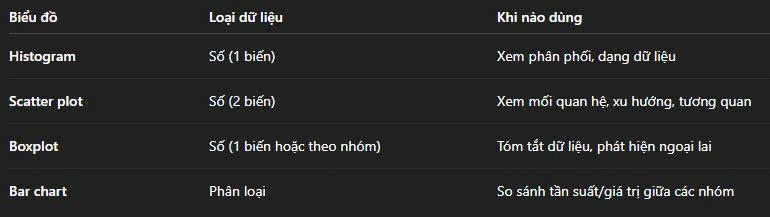

In [34]:
from IPython.display import display,Image
display(Image("image/sosanh2.png"))

+ **Làm thế nào để chọn loại biểu đồ phù hợp với đặc điểm của dữ liệu (ví dụ: dữ liệu phân loại, dữ liệu số, dữ liệu thời gian)?**

    + <u>**1. Dữ liệu phân loại (Categorical Data):**</u>

        + <i>**Ví dụ:**</i> Giới tính (Nam/Nữ), ngành học, loại xe, thành phố.

            + **👉 Biểu đồ phù hợp:**

                **Bar chart (cột):** so sánh tần suất hoặc giá trị trung bình theo nhóm.

                **Pie chart (tròn):** tỷ lệ phần trăm giữa các nhóm (ít nhóm thì rõ).

                **Stacked bar chart:** so sánh nhiều nhóm chồng lên nhau.

        + <i>**📌 Ví dụ:**</i> Bar chart số lượng sinh viên theo ngành học → thấy ngành nào đông nhất.

    + <u>**2. Dữ liệu số (Numerical / Quantitative Data):**</u>

        + <i>**Ví dụ:**</i> điểm thi, lương, chiều cao, cân nặng.

            + **👉 Biểu đồ phù hợp:**

                **Histogram:** hiển thị phân phối (chuẩn, lệch trái/phải, đa đỉnh).

                **Boxplot:** tóm tắt bằng Q1, median, Q3, phát hiện outlier.

                **Density plot (KDE):** dạng mượt của histogram.

                **Scatter plot:** nếu muốn so sánh mối quan hệ giữa 2 biến số.

        + <i>**📌 Ví dụ:**</i> Histogram lương → thấy phần lớn nhân viên lương 10–15 triệu, một số ít rất cao.

    + <u>**3. Dữ liệu theo thời gian (Time Series):**</u>

        + <i>**Ví dụ:**</i> doanh thu theo tháng, nhiệt độ theo ngày, số người dùng theo năm.

            + **👉 Biểu đồ phù hợp:**

                **Line chart (đường):** xem xu hướng, biến động theo thời gian.

                **Area chart:** giống line chart nhưng tô màu dưới đường → nhấn mạnh khối lượng.

                **Bar chart theo thời gian:** so sánh giá trị tại từng mốc thời gian (tháng, quý, năm).

        + <i>**📌 Ví dụ:**</i> Line chart doanh thu 12 tháng → thấy xu hướng tăng dần, nhưng giảm vào tháng 7.

    + <u>**4. Dữ liệu kết hợp (Categorical + Numerical):**</u>

        + <i>**Ví dụ:**</i> lương (số) theo từng phòng ban (nhóm).

            + **👉 Biểu đồ phù hợp:**

                **Boxplot theo nhóm:** so sánh phân phối giữa các nhóm.

                **Violin plot:** giống boxplot nhưng hiển thị cả mật độ phân phối.

                **Grouped bar chart:** so sánh trung bình hoặc tổng giữa nhiều nhóm.

        + <i>**📌 Ví dụ:**</i> Boxplot điểm thi theo từng lớp → thấy lớp nào có độ phân tán lớn.

    + <u>**👉 Nguyên tắc vàng:**</u>

        + <i>**Categorical**</i> → Bar chart

        + <i>**Numerical**</i> → Histogram/Boxplot

        + <i>**Time series**</i> → Line chart

        + <i>**Relationship (2 số)**</i> → Scatter plot

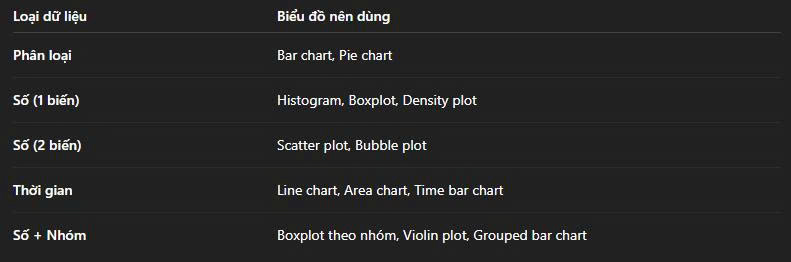

In [35]:
display(Image("image/sosanh3.png"))

+ **Sự khác biệt giữa các thư viện trực quan hóa trong Python như Matplotlib, Seaborn và Plotly là gì?**

    + <u>**1. Matplotlib:**</u>

        + <i>**Đặc điểm:**</i>

            + Là thư viện cơ bản nhất, nền tảng cho nhiều thư viện khác (Seaborn, Pandas plot).

            + Cho phép tùy biến rất chi tiết (màu, kích thước, trục, nhãn…).

            + Cú pháp hơi dài, code nhiều nếu muốn biểu đồ đẹp.

        + <i>**Ưu điểm:**</i>

            + Linh hoạt, mạnh mẽ, có thể tạo hầu hết các loại biểu đồ.

            + Kiểm soát chi tiết từng phần của biểu đồ.

        + <i>**Nhược điểm:**</i>

            + Biểu đồ mặc định không đẹp mắt, phải chỉnh thủ công.

            + Code phức tạp hơn so với Seaborn.

        + <i>**Khi dùng:**</i> Khi cần kiểm soát chi tiết hoặc muốn xây dựng biểu đồ tùy biến cao.

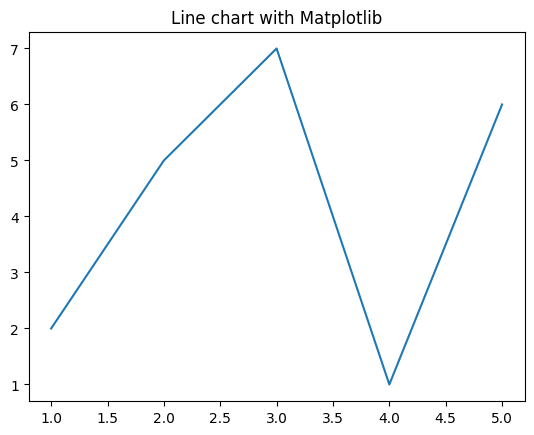

In [36]:
# Ví dụ về Matplotlib
import matplotlib.pyplot as plt

x = [1,2,3,4,5]
y = [2,5,7,1,6]

plt.plot(x, y)
plt.title("Line chart with Matplotlib")
plt.show()


+
    + <u>**2. Seaborn:**</u>

        + <i>**Đặc điểm:**</i>

            + Xây dựng dựa trên Matplotlib.

            + Hỗ trợ thống kê mô tả rất tốt, dễ dàng vẽ histogram, boxplot, heatmap, violin plot.

            + Biểu đồ mặc định đẹp và hiện đại hơn Matplotlib.

        + <i>**Ưu điểm:**</i>

            + Ít code hơn để có biểu đồ đẹp.

            + Tích hợp tốt với Pandas DataFrame.

            + Tự động xử lý thang màu, nhãn, thống kê.

        + <i>**Nhược điểm:**</i>

            + Ít linh hoạt hơn Matplotlib khi cần tùy chỉnh cực chi tiết.

        + <i>**Khi dùng:**</i> Khi cần trực quan hóa nhanh, đẹp, và thường dùng cho EDA (Exploratory Data Analysis).

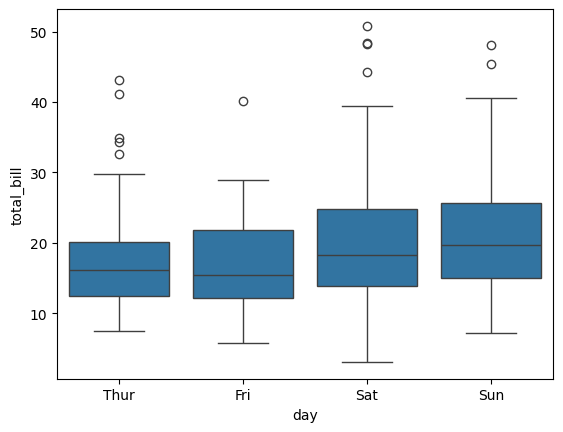

In [37]:
# Ví dụ về Seaborn
import seaborn 
import matplotlib.pyplot as plt

tips = seaborn.load_dataset("tips")
seaborn.boxplot(x="day", y="total_bill", data=tips)
plt.show()

+
    + <u>**3. Plotly:**</u>

        + <i>**Đặc điểm:**</i>

            + Hỗ trợ tương tác (interactive): zoom, hover, lọc dữ liệu.

            + Dùng nhiều trong dashboard, web app (Dash, Streamlit).

            + Có cả bản miễn phí (Plotly Express) và bản mở rộng.

        + <i>**Ưu điểm:**</i>

            + Biểu đồ tương tác hiện đại, rất đẹp.

            + Hỗ trợ 3D plots, bản đồ (maps), time series, dashboard.

        + <i>**Nhược điểm:**</i>

            + Cài đặt nặng hơn.

            + Code phức tạp hơn Seaborn nếu muốn biểu đồ nâng cao.

        + <i>**Khi dùng:**</i> Khi cần biểu đồ động, interactive, ví dụ làm dashboard hoặc báo cáo trực quan cho người dùng cuối.

In [38]:
# Ví dụ về Plotly
import plotly.express as px

df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species")
fig.show()


+
    + 👉 <u>**Tóm lại:**</u>

        + <i>**Matplotlib**</i> = “dao mổ phẫu thuật”, mạnh nhưng cần nhiều thao tác.

        + <i>**Seaborn**</i> = “dao đa năng”, đẹp và tiện khi khám phá dữ liệu.

        + <i>**Plotly**</i> = “vũ khí trình diễn”, mạnh mẽ khi cần tương tác và báo cáo.

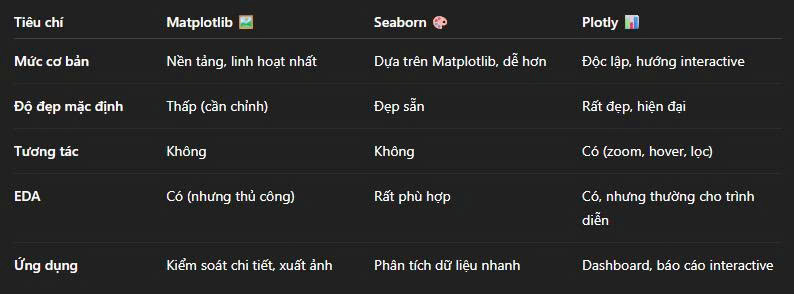

In [39]:
display(Image("image/sosanh4.png"))

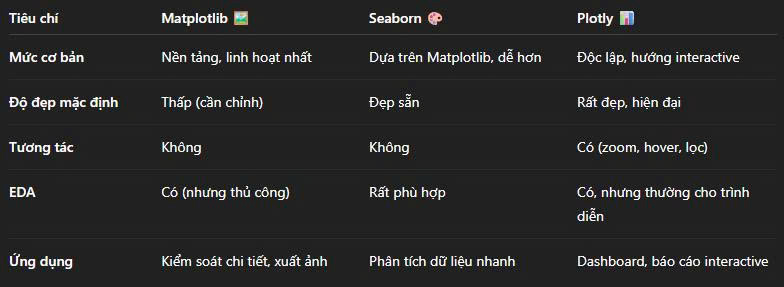

In [40]:
display(Image("image/sosanh5.png"))

+ **Những nguyên tắc thiết kế nào cần tuân thủ để tạo ra một biểu đồ trực quan hóa dễ hiểu và hiệu quả?**

    + <u>**1.Các nguyên tắc thiết kế biểu đồ hiệu quả:**</u>
        + <i>**(a). Biểu đồ phải trả lời đúng câu hỏi:**</i>

            + Chọn loại biểu đồ phù hợp với dữ liệu và mục tiêu:

                + So sánh → Bar chart.

                + Phân phối → Histogram, Density plot.

                + Quan hệ → Scatter plot.

                + Xu hướng theo thời gian → Line chart.

            + 👉 Tránh việc chọn biểu đồ chỉ vì “đẹp” nhưng không truyền tải ý nghĩa.

        + <i>**(b). Giữ đơn giản – “Less is more”:**</i>

            + Loại bỏ chi tiết thừa (gridline rối mắt, hiệu ứng 3D không cần thiết).

            + Tập trung vào dữ liệu chính.

            + Không dùng quá nhiều màu, chỉ nhấn mạnh phần quan trọng.

        + <i>**(c). Dùng màu sắc hợp lý:**</i>

            + Màu phải có ý nghĩa:

                + Đỏ = giảm, Xanh = tăng.

                + Nhóm khác nhau → màu phân biệt rõ.

            + Tránh dùng nhiều màu tương tự dễ gây nhầm lẫn.

            + Chú ý mù màu (color blindness) → nên chọn bảng màu an toàn (ColorBrewer, Seaborn palettes).

        + <i>**(d). Thang đo và trục phải rõ ràng:**</i>

            + Ghi nhãn trục (axis labels), đơn vị đo (%, $, kg…).

            + Bắt đầu trục Y từ 0 (nếu không có lý do đặc biệt).

            + Tránh “co kéo” tỷ lệ gây hiểu lầm.

        + <i>**(e). Làm nổi bật thông tin chính:**</i>

            + Dùng màu nổi hoặc chú thích để nhấn mạnh insight.

            + Ví dụ: đường xu hướng tổng thể tô đậm, các nhóm phụ mờ hơn.

            + Thêm annotations (chú thích điểm đặc biệt).

        + <i>**(f). Hiển thị phân phối và độ phân tán:**</i>

            + Không chỉ cho trung bình → thêm median, boxplot, IQR để thấy toàn cảnh.

            + Giúp tránh hiểu lầm khi dữ liệu có outlier hoặc lệch.

        + <i>**(g). Nhất quán:**</i>

            + Nếu có nhiều biểu đồ trong báo cáo:

                + Dùng chung bảng màu.

                + Cùng kiểu font, cùng cách ghi nhãn.

            + Tránh đổi cách hiển thị gây rối.

        + <i>**(h). Tương tác (nếu cần):**</i>

            + Với dashboard → cho phép lọc, zoom, hover.

            + Người dùng có thể khám phá thêm thay vì chỉ nhìn tĩnh.

    + <u>**Tóm tắt ngắn gọn (Nguyên tắc vàng):**</u>

        + Đúng biểu đồ – Đúng câu hỏi.

        + Đơn giản, rõ ràng, nhất quán.

        + Màu sắc có ý nghĩa, không lạm dụng.

        + Trục và nhãn rõ ràng, có đơn vị.

        + Nhấn mạnh insight, không “đánh lạc hướng”.

+ **Làm thế nào để tạo một biểu đồ đơn giản như histogram hoặc bar chart bằng Matplotlib? Bạn có thể chia sẻ đoạn code mẫu không?**

    + <u>**1. Histogram (biểu đồ tần suất):**</u> dùng khi bạn muốn xem phân phối của dữ liệu số. Ở đây:
    
        + bins=10 -> chia dữ liệu thành 10 khoảng.
        + color & edgecolor -> giúp biểu đồ dễ nhìn hơn.

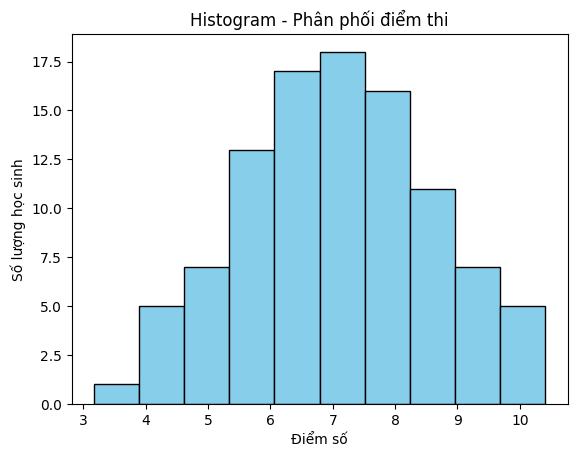

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Tạo dữ liệu giả lập (ví dụ: điểm thi của 100 học sinh)
np.random.seed(0)
scores = np.random.normal(loc=7, scale=1.5, size=100)  # mean=7, std=1.5

# Vẽ histogram
plt.hist(scores, bins=10, color='skyblue', edgecolor='black')
plt.title("Histogram - Phân phối điểm thi")
plt.xlabel("Điểm số")
plt.ylabel("Số lượng học sinh")
plt.show()

+
    + <u>**2. Bar chart (biểu đồ cột):**</u> dùng khi bạn muốn so sánh tần suất hoặc giá trị giữa các nhóm phân loại. Ở đây:

        + plt.bar(x, y) → vẽ cột với x là tên nhóm, y là giá trị.

        + Có thể thêm màu, nhãn, xoay trục X nếu tên dài.


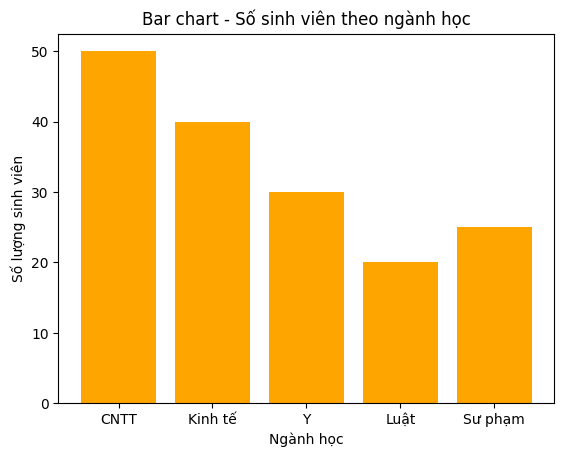

In [42]:
import matplotlib.pyplot as plt

# Dữ liệu ví dụ: số sinh viên theo ngành
majors = ["CNTT", "Kinh tế", "Y", "Luật", "Sư phạm"]
students = [50, 40, 30, 20, 25]

# Vẽ bar chart
plt.bar(majors, students, color='orange')
plt.title("Bar chart - Số sinh viên theo ngành học")
plt.xlabel("Ngành học")
plt.ylabel("Số lượng sinh viên")
plt.show()

+
    + <u>**👉 Như vậy:**</u>

        + Histogram → phân phối dữ liệu số.

        + Bar chart → so sánh giữa các nhóm phân loại.

+ **Làm thế nào để xuất biểu đồ từ Python ra các định dạng như PNG, PDF hoặc HTML để sử dụng trong báo cáo?**

    + <u>**1. Xuất bằng Matplotlib:**</u>
    
        + Sau khi vẽ biểu đồ, dùng plt.savefig().

        + <i>**📌 Lưu ý:**</i>

            + dpi=300 → độ phân giải cao (phù hợp in ấn).

            + Đuôi file quyết định định dạng (.png, .pdf, .svg, …).

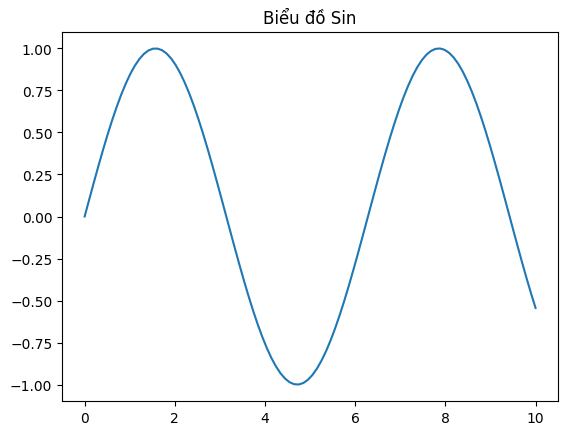

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu ví dụ
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y)
plt.title("Biểu đồ Sin")

# Xuất file
plt.savefig("image/plot.png", dpi=300)   # Xuất PNG
plt.savefig("image/plot.pdf")            # Xuất PDF vector
plt.savefig("image/plot.svg")            # Xuất SVG (vector)

plt.show()

+
    + <u>**2. Xuất bằng Seaborn:**</u> vì Seaborn dựa trên Matplotlib, bạn vẫn dùng plt.savefig().

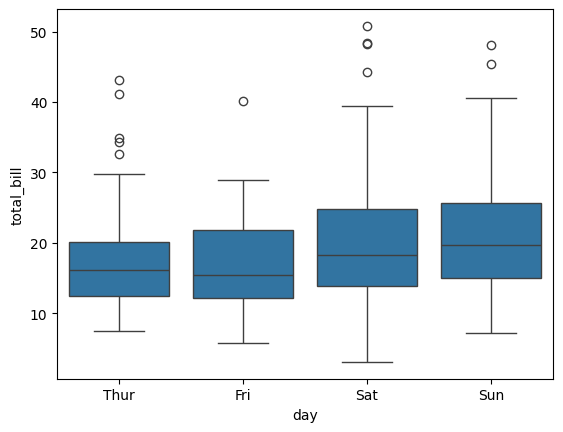

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")
sns.boxplot(x="day", y="total_bill", data=tips)

plt.savefig("image/boxplot_1.png", dpi=300)
plt.show()

+
    + <u>**3. Xuất bằng Plotly:**</u>

        + Plotly hỗ trợ tương tác, nên bạn có thể xuất ra HTML hoặc ảnh tĩnh.

        + 📌 Với fig.write_html() → file HTML mở bằng trình duyệt, người xem có thể zoom, hover.

In [45]:
import plotly.express as px

df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species")

# Xuất HTML (tương tác)
fig.write_html("image/scatter_plot.html")

# Xuất ảnh (PNG, PDF, SVG, JPEG) – cần cài thêm "kaleido"
fig.write_image("image/scatter_plot.png")
fig.write_image("image/scatter_plot.pdf")

+
    + **4. Khi nào dùng định dạng nào?:**

        + **PNG, JPEG:** chèn vào báo cáo, slide PowerPoint.

        + **PDF, SVG:** in ấn, chất lượng cao, không vỡ hình.

        + **HTML:** báo cáo web, dashboard, giữ được tính tương tác (zoom, filter).

#### **1.2.2. Bài làm mẫu.**

**Bài toán 1:** Thực hiện các nhiệm vụ trong bài toán để làm quen với các công cụ trực quan hóa dữ liệu. Dữ liệu thực hiện là dữ liệu về giá nhà lấy từ https://www.kaggle.com/datasets/thomasnibb/amsterdam-house-price-prediction 

**<u>Nhiệm vụ 1:</u>**

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
houseprices_data = pd.read_csv("data/HousingPricesData.csv")

In [48]:
houseprices_data = houseprices_data[['Zip', 'Price', 'Area', 'Room']]
# tạo cột mới dựa trên cột đã có
houseprices_data['PriceperSqm'] = houseprices_data['Price']/houseprices_data['Area']

**1. Trực quan hóa dữ liệu với Matplotlib**

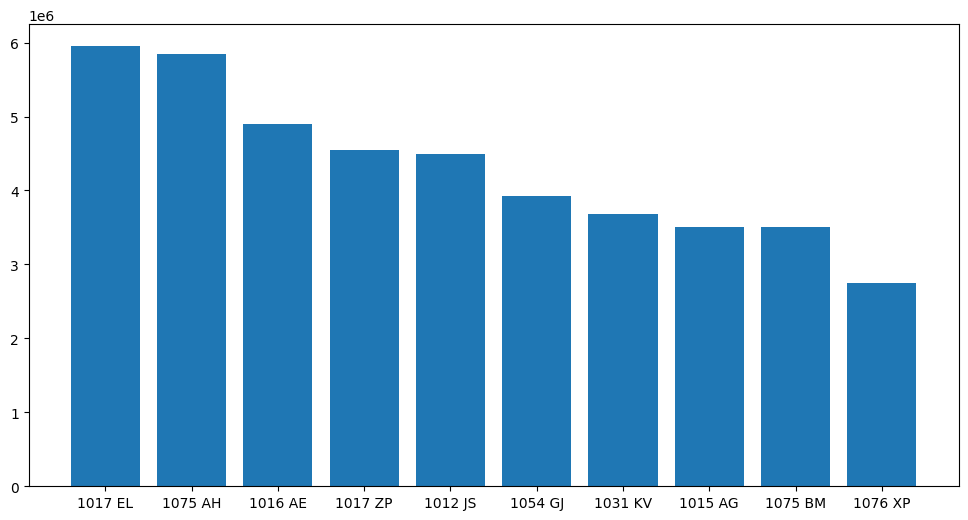

In [49]:
houseprices_sorted = houseprices_data.sort_values('Price', ascending = False)
houseprices_sorted.head()
# case 1: basic
plt.figure(figsize= (12,6))
x = houseprices_sorted['Zip'][0:10]
y = houseprices_sorted['Price'][0:10]
plt.bar(x,y)
plt.show()

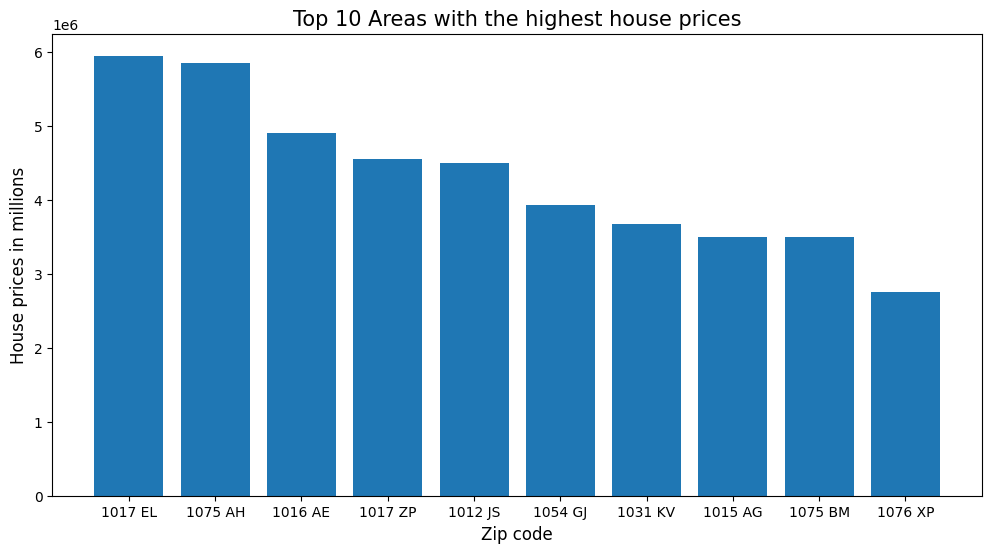

In [50]:
# case 2: advanced 1
plt.figure(figsize= (12,6))
plt.bar(x,y)
plt.title('Top 10 Areas with the highest house prices', fontsize=15)
plt.xlabel('Zip code', fontsize = 12)
plt.xticks(fontsize=10)
plt.ylabel('House prices in millions', fontsize=12)
plt.yticks(fontsize=10)
plt.show()

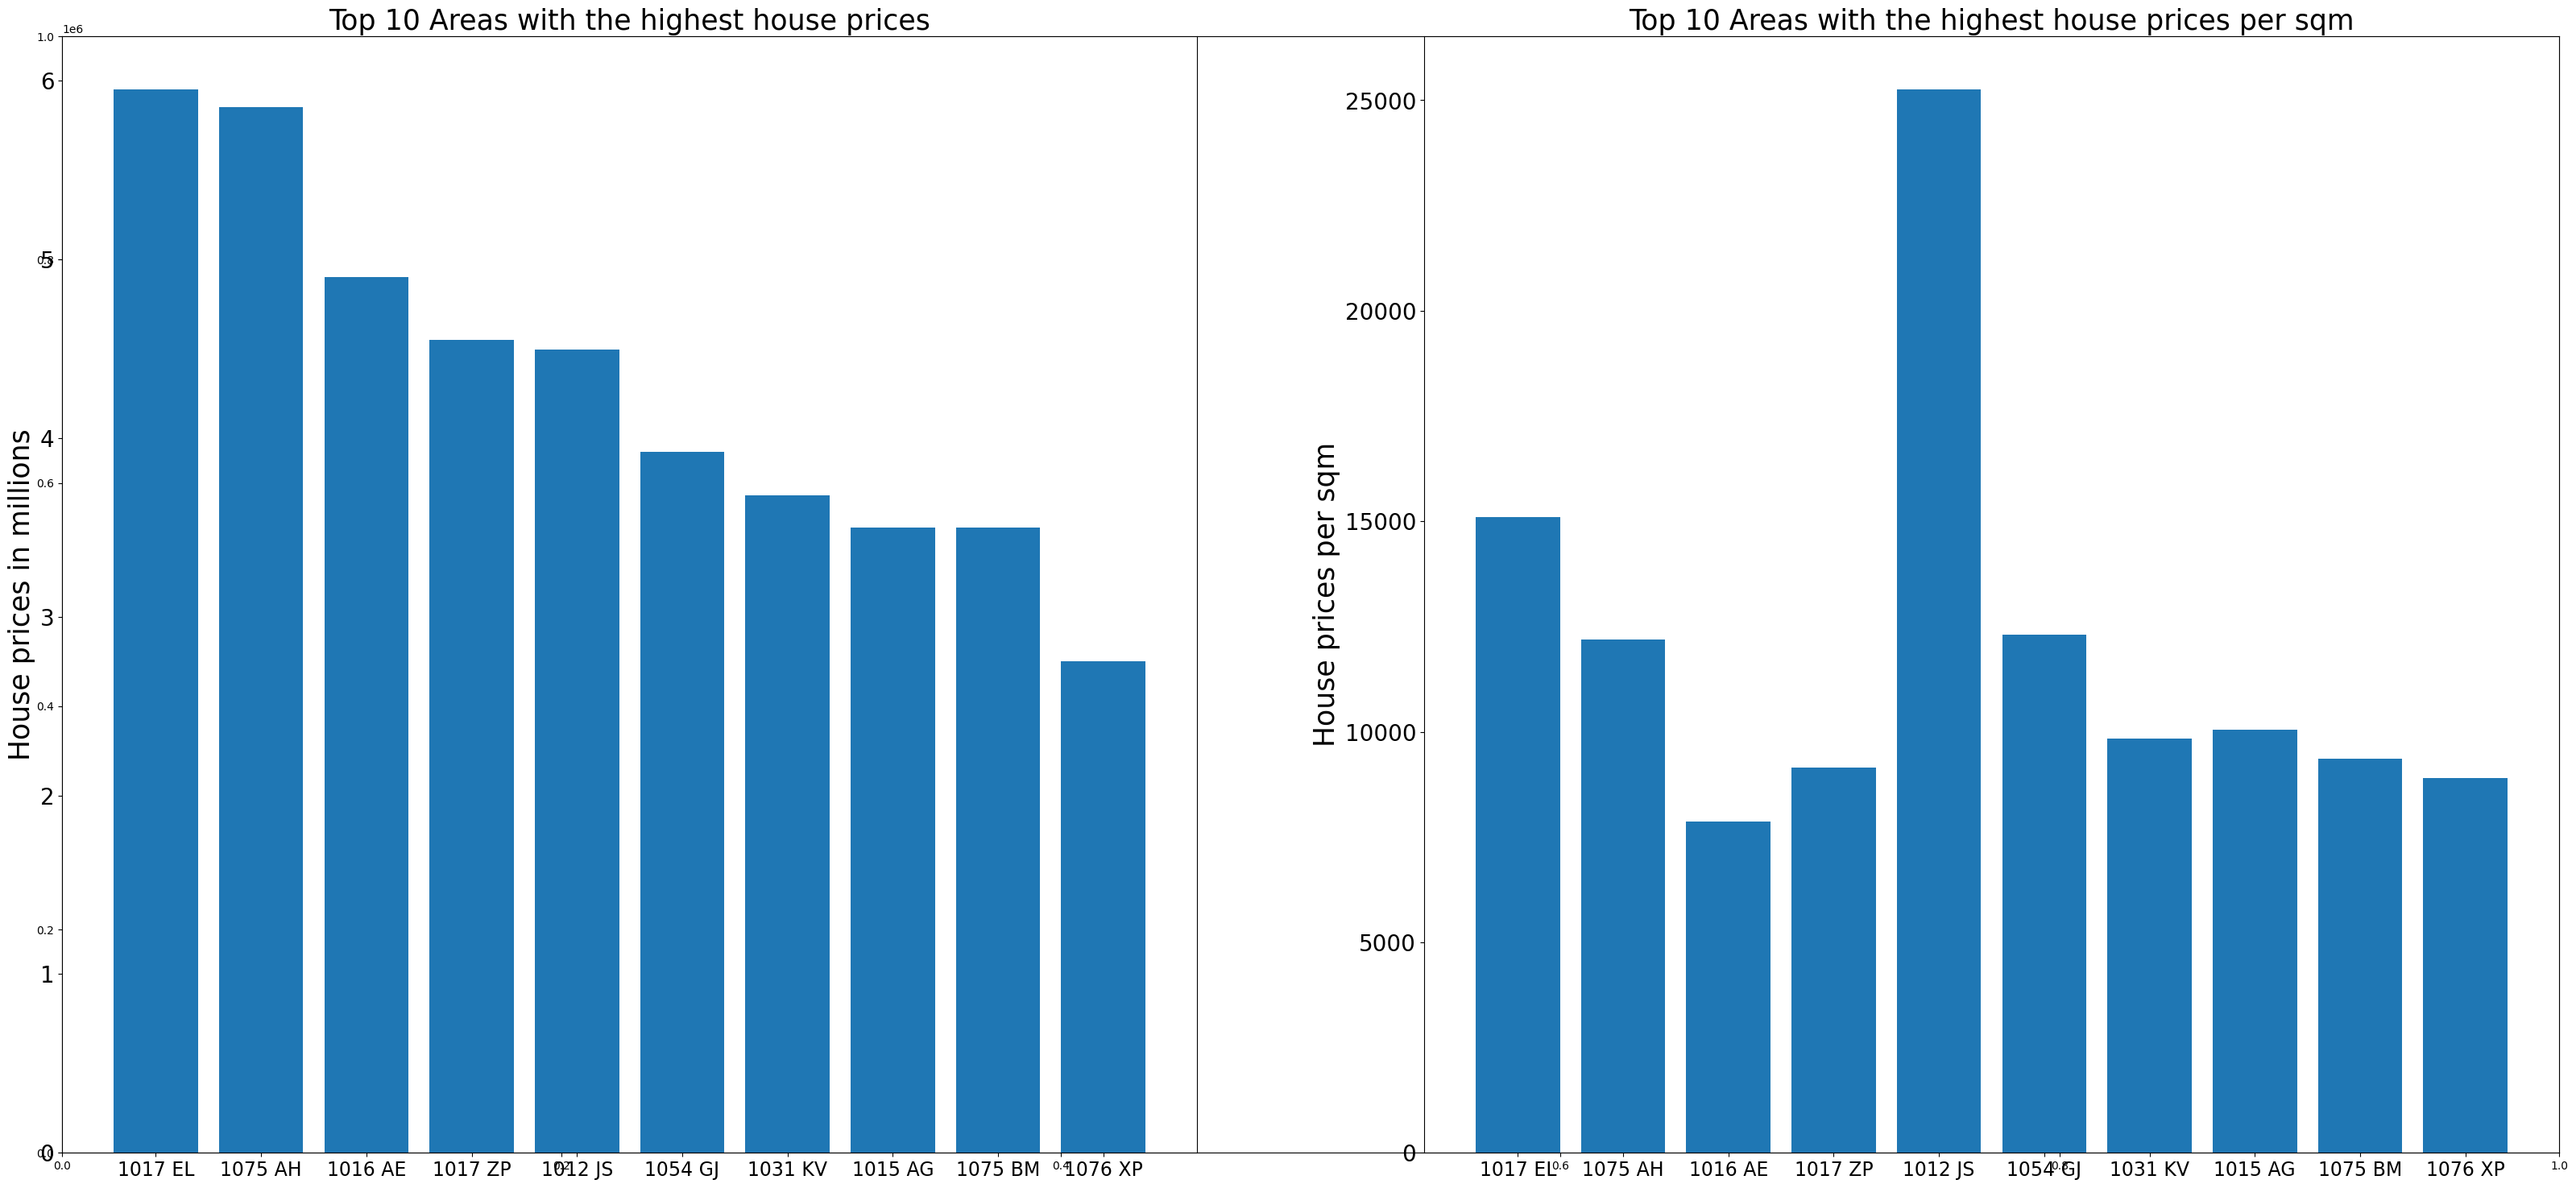

In [51]:
# case 3: advanced 2
fig, ax = plt.subplots(figsize=(40,18))
x = houseprices_sorted['Zip'][0:10]
y = houseprices_sorted['Price'][0:10]
y1 = houseprices_sorted['PriceperSqm'][0:10]
plt.subplot(1,2,1)
plt.bar(x,y)
plt.xticks(fontsize=17)
plt.ylabel('House prices in millions', fontsize=25)
plt.yticks(fontsize=20)
plt.title('Top 10 Areas with the highest house prices',
fontsize=25)
plt.subplot(1,2,2)
plt.bar(x,y1)
plt.xticks(fontsize=17)
plt.ylabel('House prices per sqm', fontsize=25)
plt.yticks(fontsize=20)
plt.title('Top 10 Areas with the highest house prices per sqm',
fontsize=25)
plt.show()

**2. Trực quan hóa dữ liệu với Seaborn**

<Axes: xlabel='Zip', ylabel='Price'>

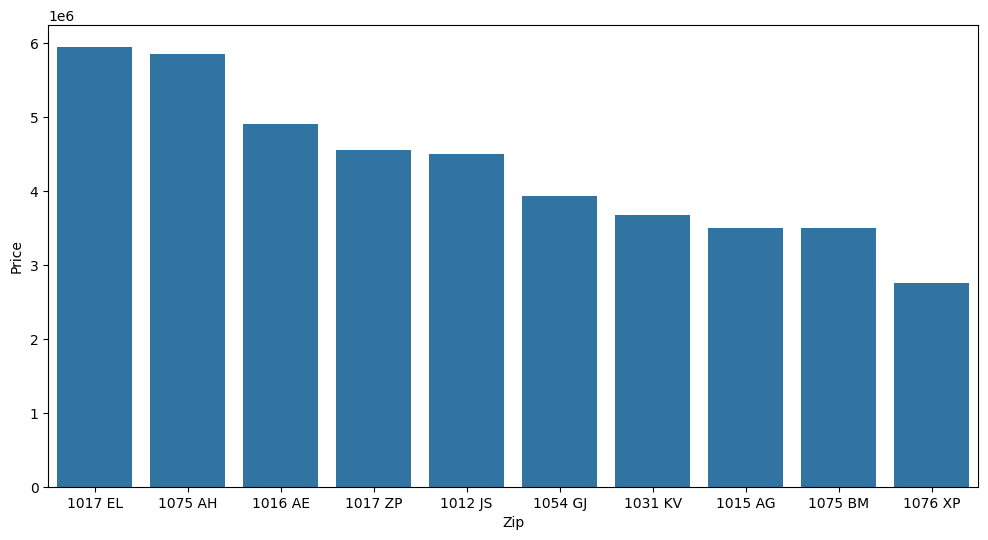

In [52]:
# case 1: basic
plt.figure(figsize= (12,6))
data = houseprices_sorted[0:10]
sns.barplot(data= data, x= 'Zip',y = 'Price')

Text(0.5, 1.0, 'Top 10 Areas with the highest house prices')

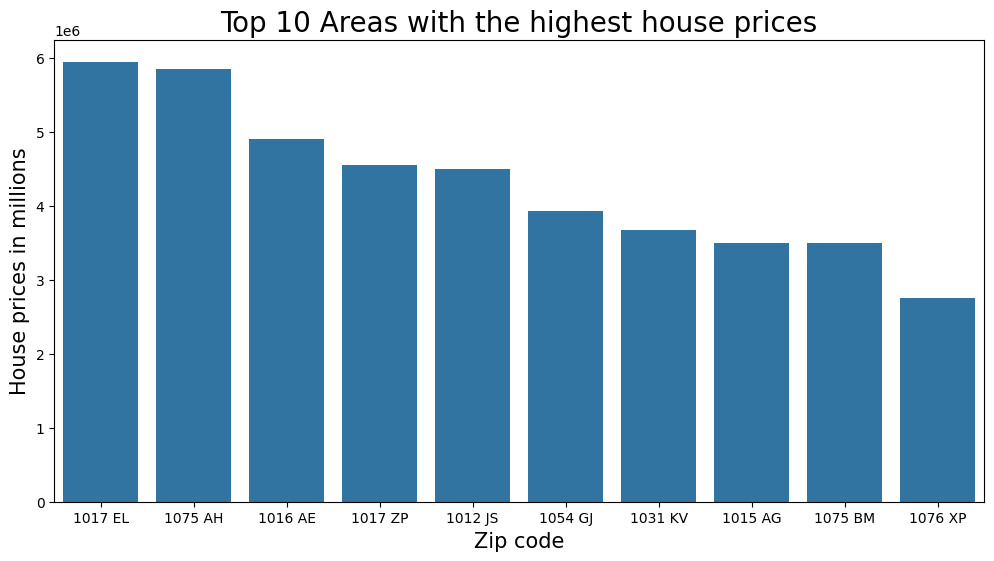

In [53]:
# case 2: advanced 1
plt.figure(figsize= (12,6))
data = houseprices_sorted[0:10]
ax = sns.barplot(data= data, x= 'Zip',y = 'Price')
ax.set_xlabel('Zip code',fontsize = 15)
ax.set_ylabel('House prices in millions', fontsize = 15)
ax.set_title('Top 10 Areas with the highest house prices', fontsize= 20)

Text(0.5, 1.0, 'Top 10 Areas with the highest price per sqm')

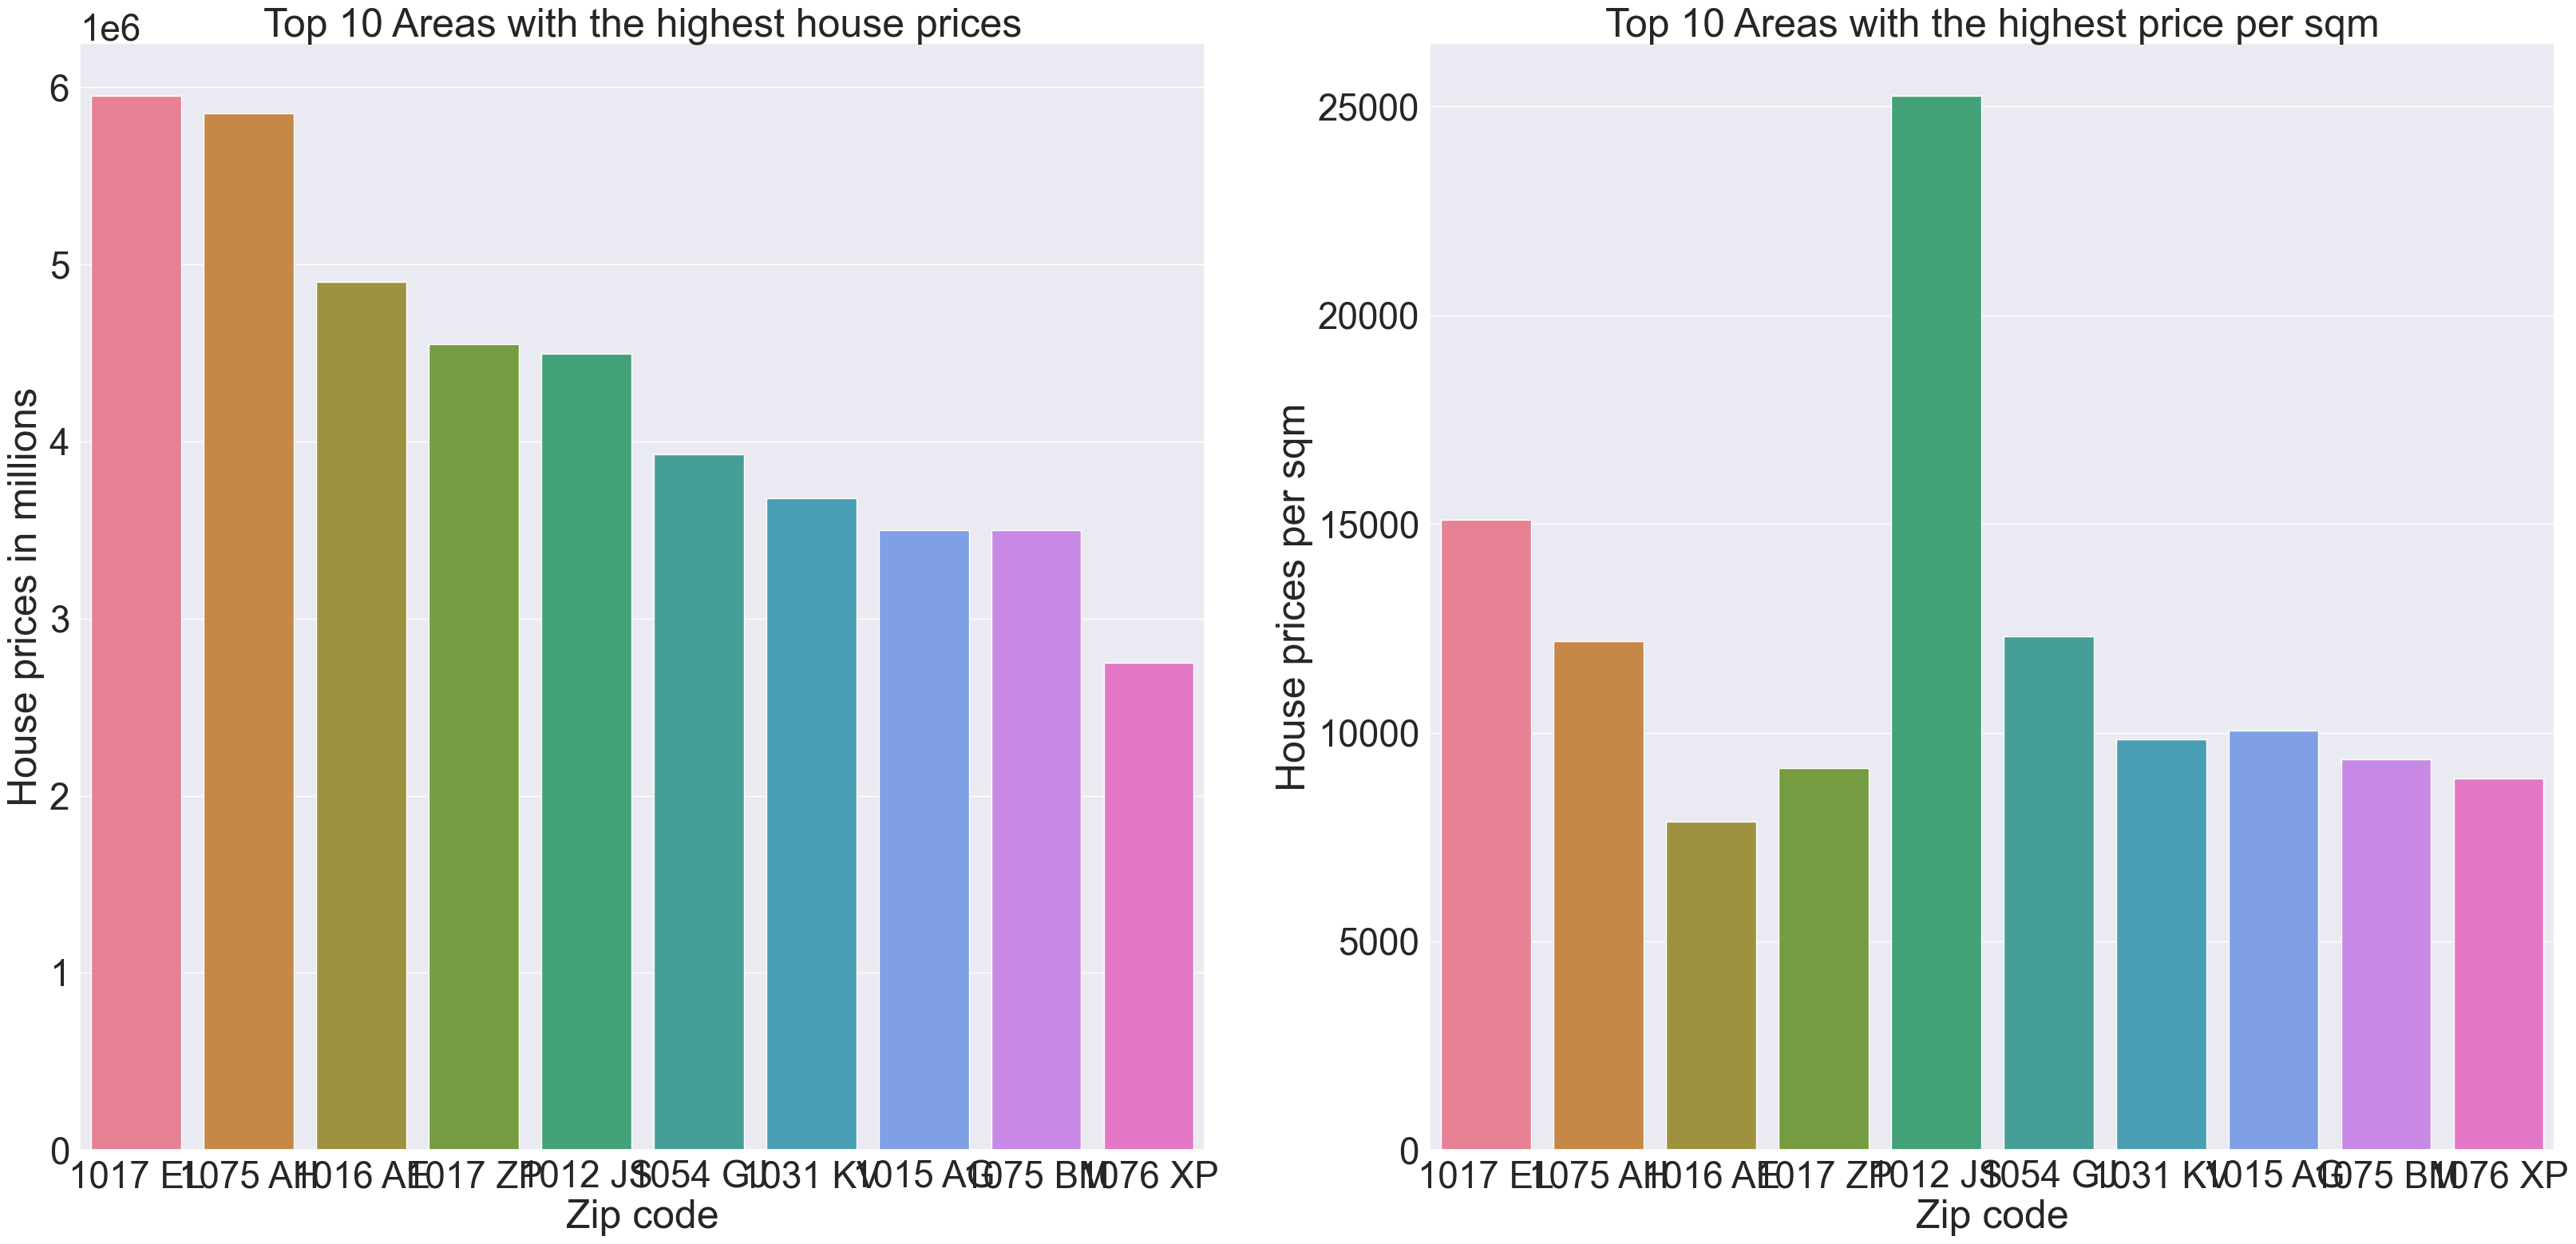

In [55]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# case 3: view multiple perspectives at once
fig, ax = plt.subplots(1, 2, figsize=(40, 18))
data = houseprices_sorted[0:10]
sns.set(font_scale=3)
ax1 = sns.barplot(data=data, x='Zip', y='Price', ax=ax[0], palette='husl')
ax1.set_xlabel('Zip code')
ax1.set_ylabel('House prices in millions')
ax1.set_title('Top 10 Areas with the highest house prices')
ax2 = sns.barplot(data=data, x='Zip', y='PriceperSqm', ax=ax[1], palette='husl')
ax2.set_xlabel('Zip code')
ax2.set_ylabel('House prices per sqm')
ax2.set_title('Top 10 Areas with the highest price per sqm')

**3. Mở rộng các loại biểu đồ**

In [56]:
# Lấy 50 dòng đầu và 50 dòng cuối
df_top_bottom = pd.concat([houseprices_data.head(50), houseprices_data.tail(50)])

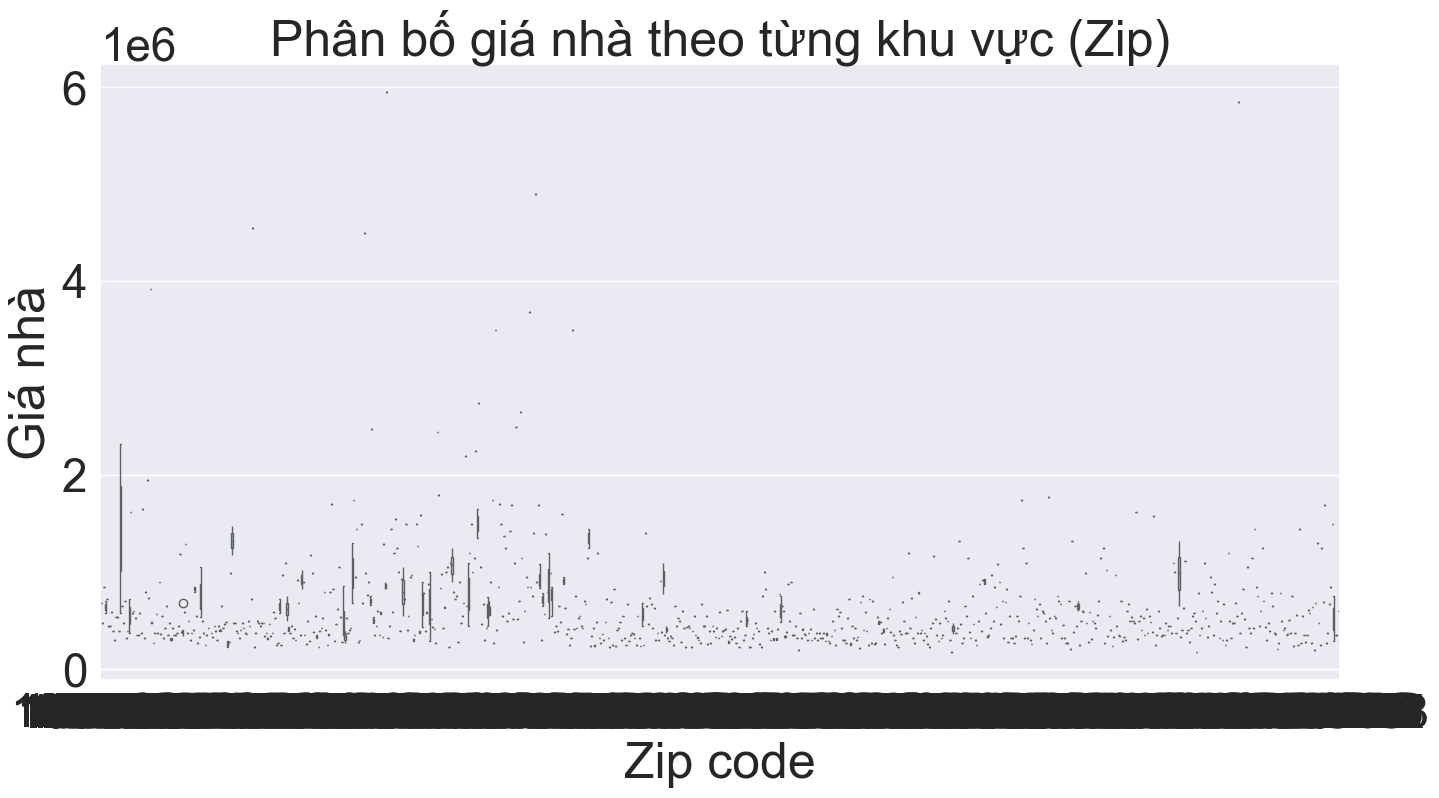

In [57]:
# Boxplot: Phân bố giá nhà theo từng khu vực (Zip)
plt.figure(figsize=(16,8))
sns.boxplot(data=houseprices_data, x='Zip', y='Price', palette='Set3')
plt.title('Phân bố giá nhà theo từng khu vực (Zip)')
plt.xlabel('Zip code')
plt.ylabel('Giá nhà')
plt.show()

- **Mục đích:** Giúp bạn quan sát sự phân bố giá nhà, phát hiện các giá trị ngoại lai (outlier) và so sánh mức giá giữa các khu vực.

- **Phân tích:** Nếu hộp (box) của khu vực nào cao và rộng, khu vực đó có giá nhà cao và biến động lớn. Nếu có nhiều dấu chấm ngoài hộp, đó là các căn nhà có giá bất thường.

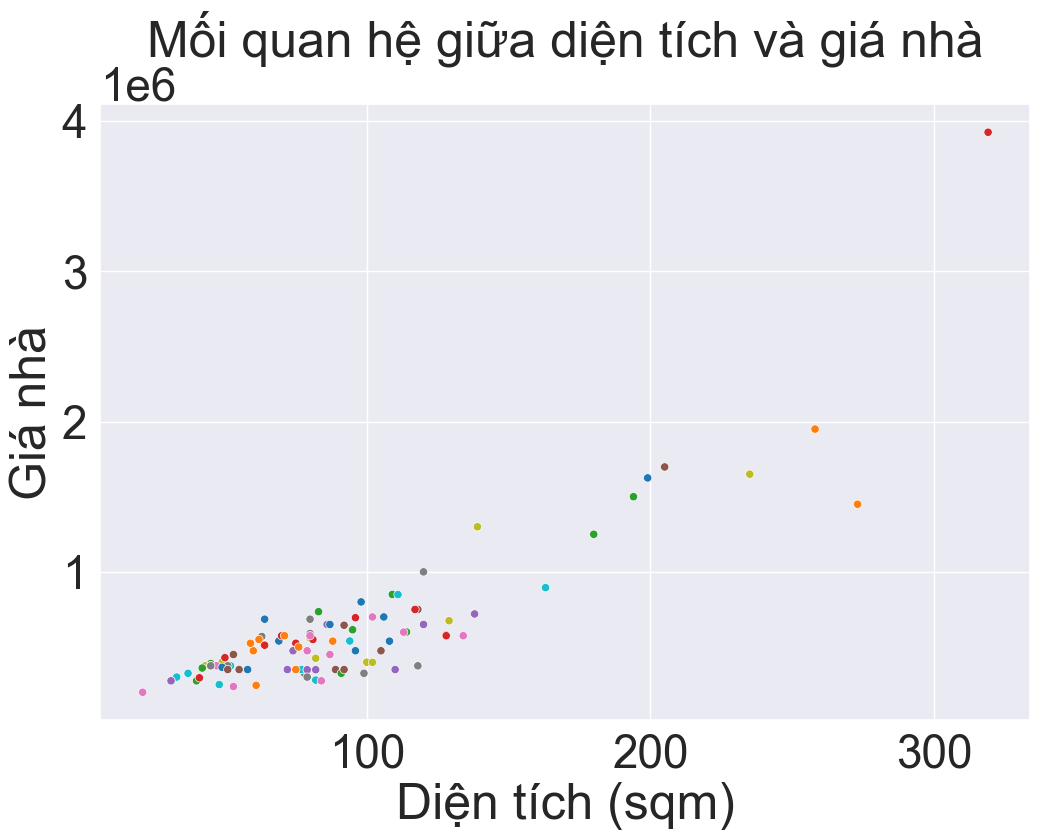

In [58]:
# Biểu đồ Scatter: Mối quan hệ giữa diện tích và giá nhà
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_top_bottom, x='Area', y='Price', hue='Zip', palette='tab10', legend=False)
plt.title('Mối quan hệ giữa diện tích và giá nhà')
plt.xlabel('Diện tích (sqm)')
plt.ylabel('Giá nhà')
plt.show()

- **Mục đích:** Kiểm tra xem diện tích có ảnh hưởng như thế nào đến giá nhà, và có khu vực nào nổi bật về giá hoặc diện tích không.

- **Phân tích:** Nếu điểm càng lên cao theo chiều ngang, giá nhà càng tăng theo diện tích. Nếu có điểm nằm xa khỏi xu hướng chung, đó là các căn nhà đặc biệt.

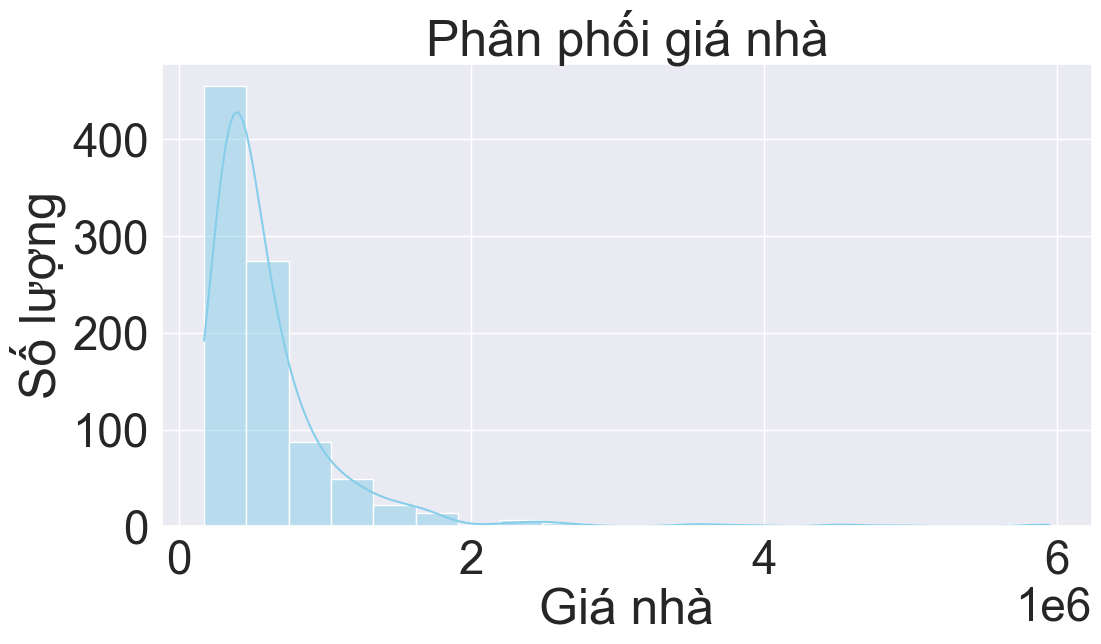

In [59]:
# Histogram: Phân phối giá nhà
plt.figure(figsize=(12,6))
sns.histplot(houseprices_data['Price'], bins=20, kde=True, color='skyblue')
plt.title('Phân phối giá nhà')
plt.xlabel('Giá nhà')
plt.ylabel('Số lượng')
plt.show()

- **Mục đích:** Xem giá nhà tập trung ở mức nào, có nhiều nhà giá rẻ hay giá cao.

- **Phân tích:** Nếu biểu đồ lệch phải, đa số nhà có giá thấp, chỉ một số ít nhà giá rất cao. Nếu phân phối đều, thị trường đa dạng giá.

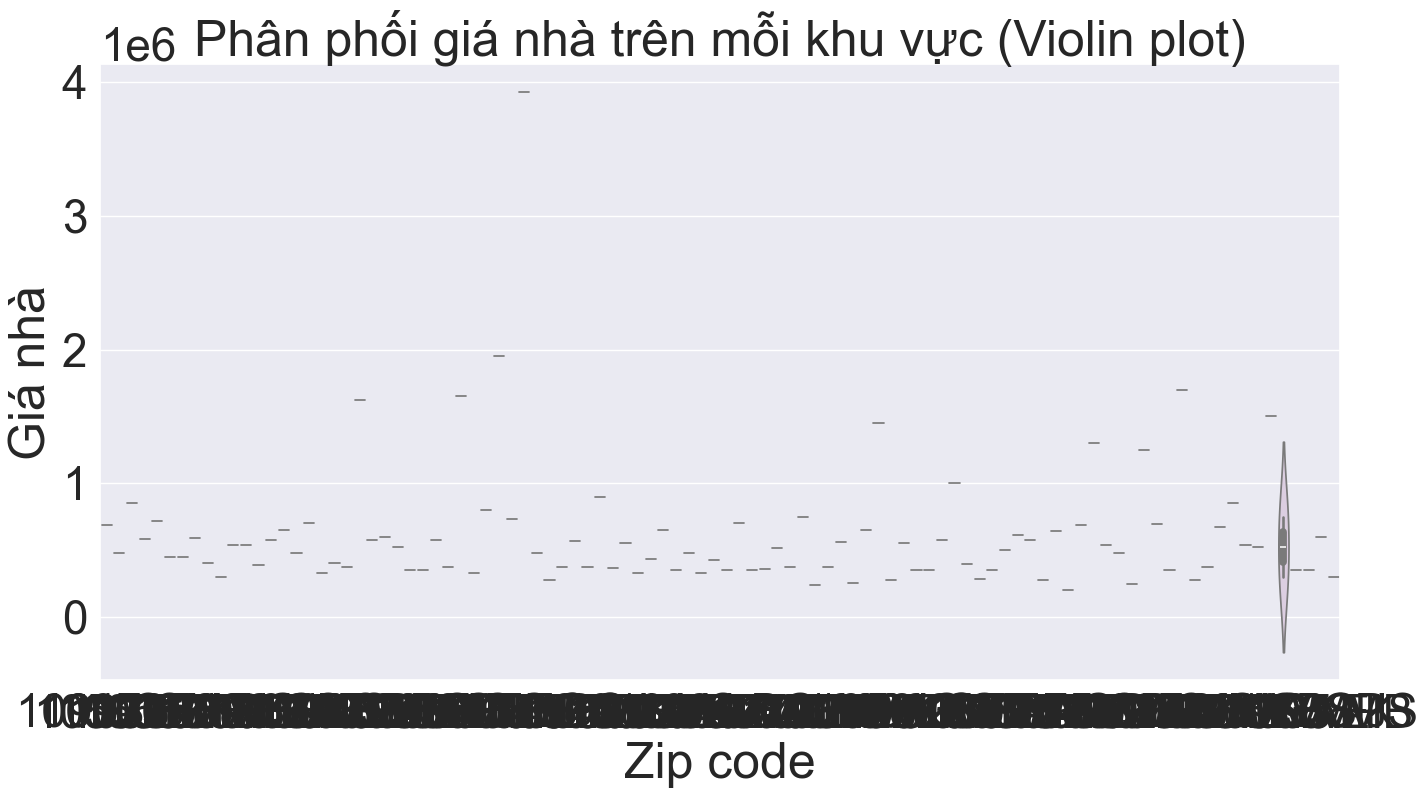

In [60]:
# Violin: Phân phối giá nhà trên mỗi khu vực
plt.figure(figsize=(16,8))
sns.violinplot(data=df_top_bottom, x='Zip', y='Price', palette='Pastel1')
plt.title('Phân phối giá nhà trên mỗi khu vực (Violin plot)')
plt.xlabel('Zip code')
plt.ylabel('Giá nhà')
plt.show()

- **Mục đích:** Kết hợp giữa boxplot và histogram, giúp thấy rõ hơn mật độ giá nhà ở từng khu vực.

- **Phân tích:** Khu vực nào có "violin" phình to ở đâu thì giá nhà tập trung nhiều ở mức đó. Nếu "đuôi" dài, có nhiều giá trị ngoại lai.

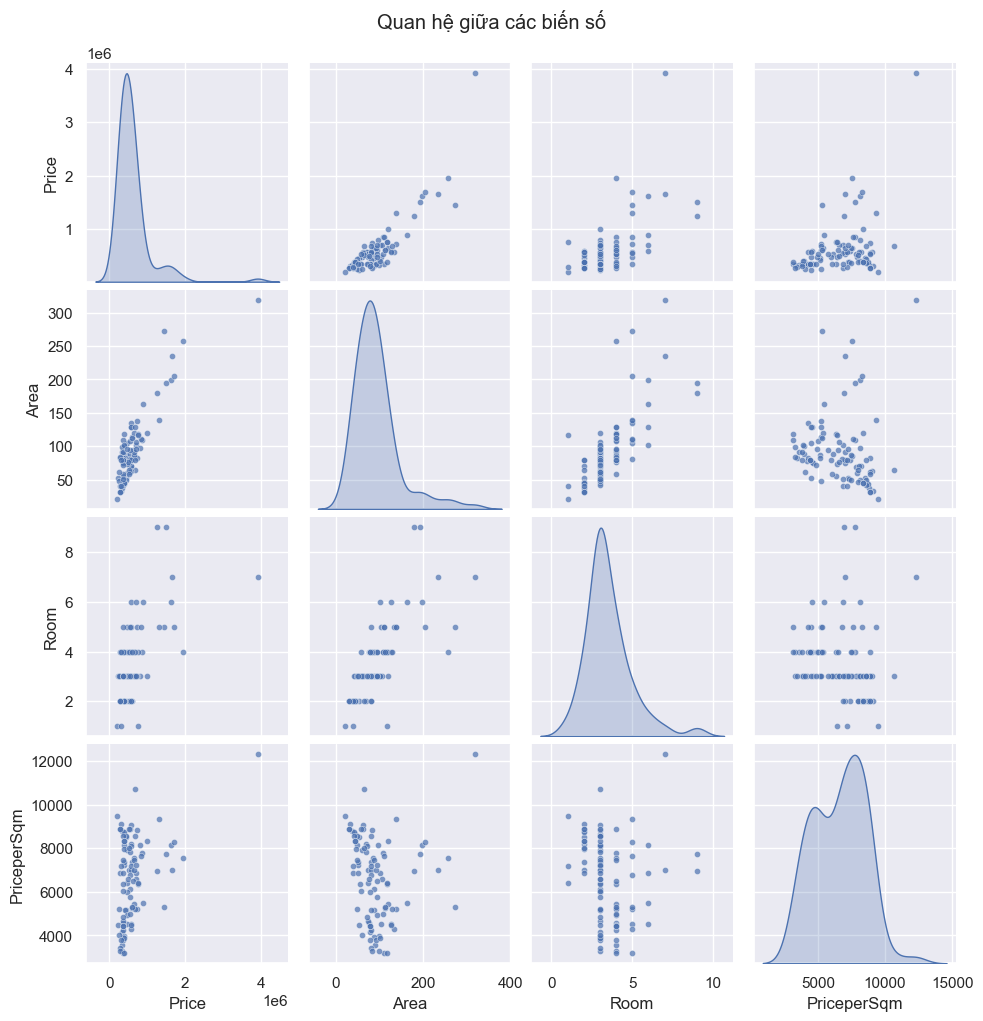

In [61]:
# Pairplot: Quan hệ giữa các biến số
sns.set_context("notebook", font_scale=1)  # hoặc font_scale nhỏ hơn nữa nếu muốn
sns.pairplot(df_top_bottom[['Price', 'Area', 'Room', 'PriceperSqm']], diag_kind='kde', plot_kws={'s': 20, 'alpha': 0.7})
plt.suptitle('Quan hệ giữa các biến số', y=1.02)
plt.show()

- **Mục đích:** Quan sát mối quan hệ giữa các biến số như Giá, Diện tích, Số phòng, Giá/m2.

- **Phân tích:** Các biểu đồ scatter cho thấy biến nào liên quan chặt chẽ với nhau (ví dụ: diện tích và giá). Đường chéo là phân phối từng biến.

- **Ý nghĩa từng phần của pairplot:**

    - **Đường chéo (Diagonal):** Các ô trên đường chéo là biểu đồ phân phối (kde plot) của từng biến:

        - <i>Price:</i> Phân phối giá nhà.

        - <i>Area:</i> Phân phối diện tích.

        - <i>Room:</i> Phân phối số phòng.

        - <i>PriceperSqm:</i> Phân phối giá trên mỗi mét vuông.

        -> Điều này giúp bạn biết biến nào có phân phối lệch, chuẩn hay có nhiều giá trị ngoại lai.

    - **Các ô ngoài đường chéo (Off-diagonal):** Là các scatter plot thể hiện mối quan hệ giữa từng cặp biến.

        - <i>Price vs Area:</i> Nếu các điểm tạo thành một đường chéo đi lên, nghĩa là diện tích càng lớn thì giá nhà càng cao (tương quan dương).

        - <i>Price vs Room:</i> Nếu số phòng tăng mà giá cũng tăng, hai biến này có liên hệ.

        - <i>Price vs PriceperSqm:</i> Có thể thấy các điểm phân tán, nếu tập trung thành một cụm thì giá nhà và giá/m2 có mối liên hệ mạnh.

        - <i>Area vs Room:</i> Nếu diện tích lớn thì số phòng cũng nhiều, hai biến này sẽ có xu hướng tăng cùng nhau.

        - <i>Các cặp khác:</i> Giúp phát hiện các mối liên hệ bất thường hoặc ngoại lệ.

- **Phân tích sâu hơn:**

    - Nếu các điểm trong scatter plot tạo thành một đường thẳng hoặc hình elip kéo dài, hai biến đó có mối tương quan mạnh.

    - Nếu các điểm phân tán rộng, hai biến đó ít liên hệ với nhau.

    - Nếu có các cụm điểm tách biệt, có thể tồn tại các nhóm đặc biệt trong dữ liệu (ví dụ: khu vực cao cấp, nhà nhỏ giá cao...).

    - Đường chéo càng nhọn (kde plot), dữ liệu càng tập trung quanh một giá trị; càng bè, dữ liệu càng phân tán.

- **Ứng dụng thực tế:**

    - Giúp bạn chọn biến nào để xây dựng mô hình dự báo giá nhà.

    - Phát hiện các biến có thể gây nhiễu hoặc không liên quan.

    - Phát hiện ngoại lệ (outlier) dễ dàng.

- **Kết luận:** Pairplot là công cụ tổng quan, giúp bạn nhanh chóng nhận diện các mối quan hệ, xu hướng và bất thường giữa các biến số trong dữ liệu nhà đất.

#### **1.2.3. Bài tập thực hành 1.**

Thực hiện trực quan hóa dữ liệu trên tập dữ liệu về phân loại chất lượng rượu đỏ. Dữ liệu lấy tại https://www.kaggle.com/code/eisgandar/red-wine-quality-eda-classification

- Import dữ liệu và đọc dữ liệu:

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
ruou = pd.read_csv("data/winequality-red.csv")

- Tìm hiểu dữ liệu:

In [64]:
ruou.head() #Xem 5 dòng đầu

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [65]:
ruou.describe() #Thống kê mô tả
ruou.isnull().sum() #Kiểm tra giá trị thiếu

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

- **Trực quan hóa dữ liệu:**

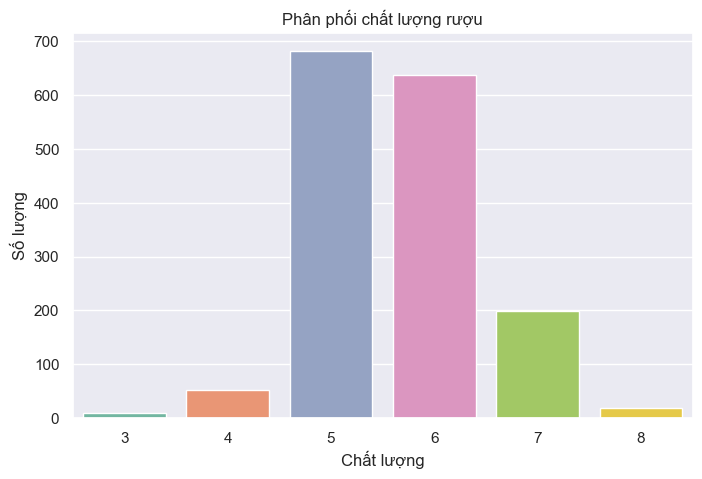

In [66]:
plt.figure(figsize=(8,5))
sns.countplot(x='quality', data=ruou, palette='Set2')
plt.title('Phân phối chất lượng rượu')
plt.xlabel('Chất lượng')
plt.ylabel('Số lượng')
plt.show()

- **Mục đích:** Xem rượu được đánh giá chất lượng như thế nào, chất lượng nào phổ biến nhất.

- **Phân tích:** Nếu chất lượng tập trung ở mức 5, 6, 7 thì đa số rượu ở mức trung bình khá. Nếu lệch trái/phải, có thể dữ liệu không cân bằng.

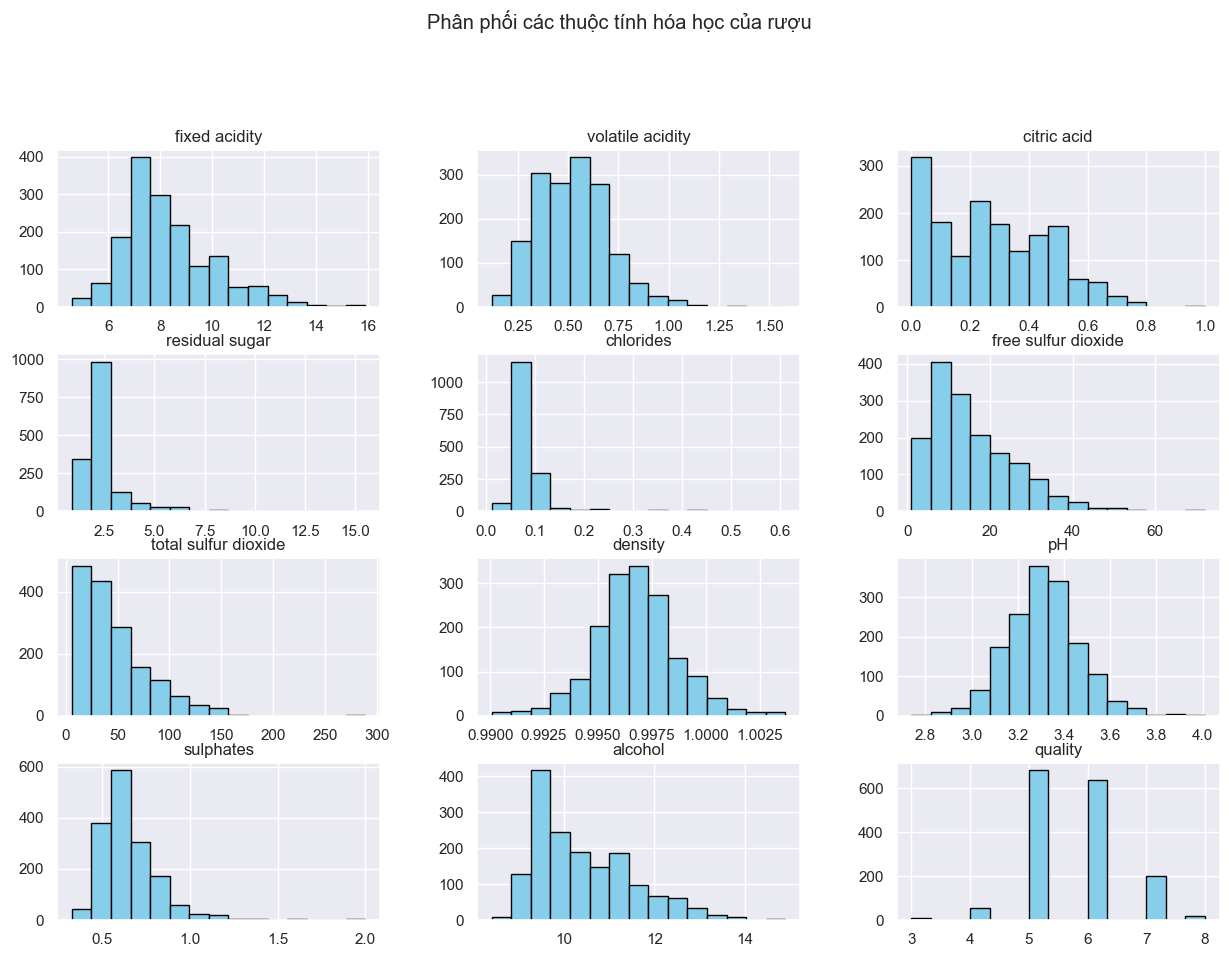

In [67]:
ruou.hist(bins=15, figsize=(15,10), color='skyblue', edgecolor='black')
plt.suptitle('Phân phối các thuộc tính hóa học của rượu', y=1.02)
plt.show()

- **Mục đích:** Quan sát phân phối từng thuộc tính (ví dụ: độ chua, lượng đường, độ cồn...).

- **Phân tích:**

    - Nếu histogram lệch phải/trái, thuộc tính đó không phân phối chuẩn.
    - Nếu có nhiều giá trị ngoại lai (outlier), cần chú ý.

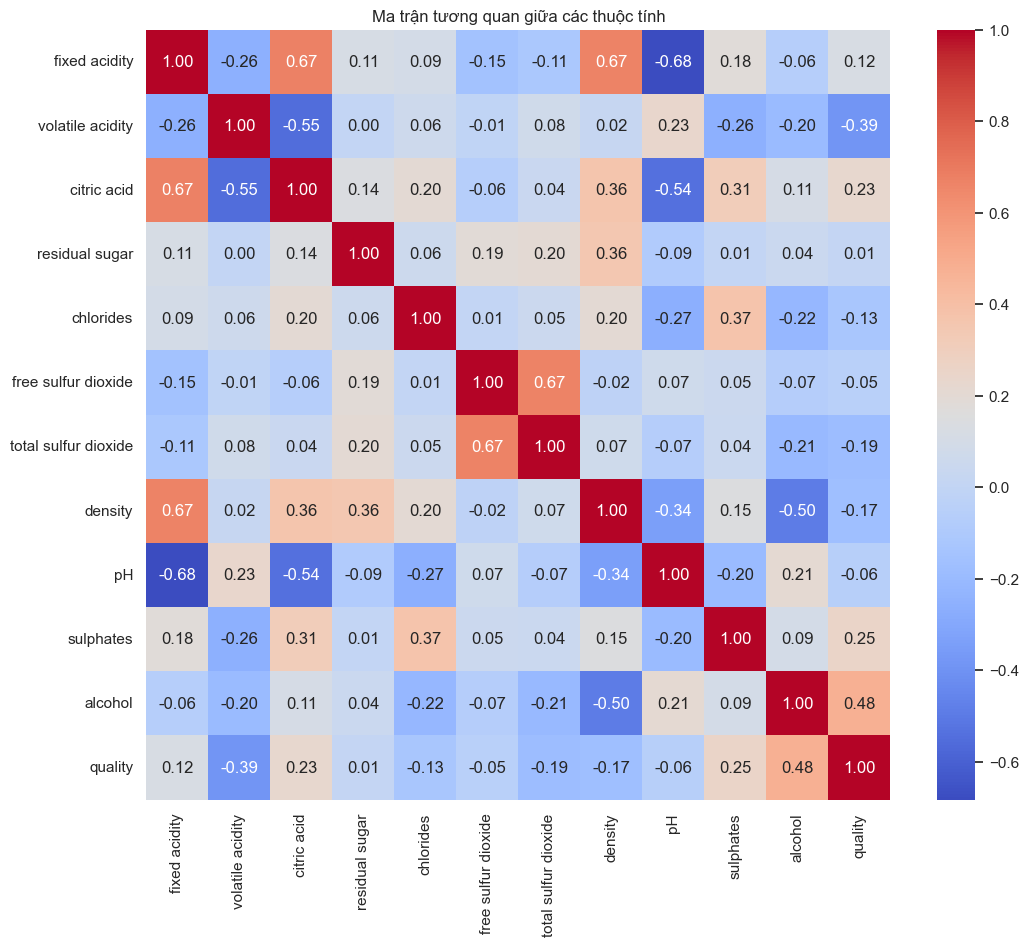

In [68]:
#Ma trận tương quan (heatmap)
plt.figure(figsize=(12,10))
corr = ruou.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Ma trận tương quan giữa các thuộc tính')
plt.show()

- **Mục đích:** Tìm mối liên hệ giữa các thuộc tính, đặc biệt là với quality.

- **Phân tích:**

    - Các giá trị gần 1 hoặc -1 là tương quan mạnh.
    - Nếu alcohol và quality có tương quan dương, rượu nồng độ cồn cao thường chất lượng cao hơn.
    - Nếu volatile acidity và quality có tương quan âm, độ axit bay hơi cao thì chất lượng thấp.

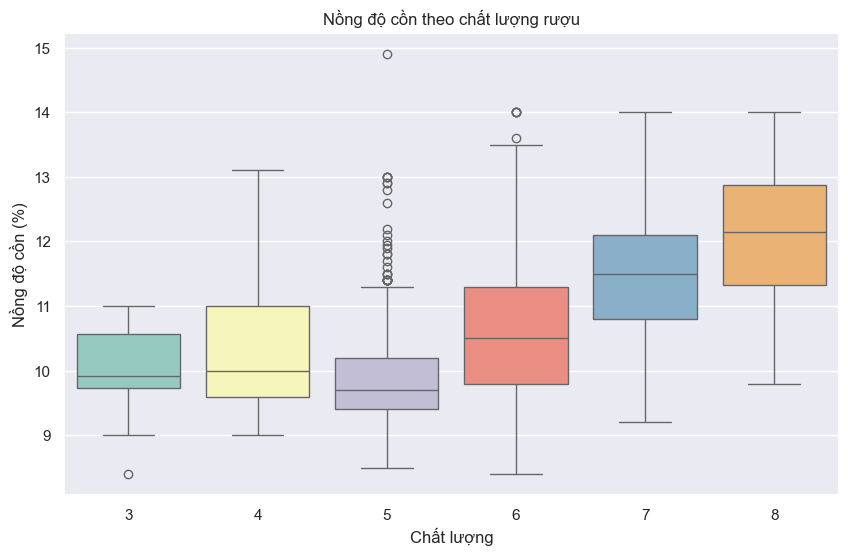

In [69]:
#Boxplot: So sánh thuộc tính theo chất lượng
plt.figure(figsize=(10,6))
sns.boxplot(x='quality', y='alcohol', data=ruou, palette='Set3')
plt.title('Nồng độ cồn theo chất lượng rượu')
plt.xlabel('Chất lượng')
plt.ylabel('Nồng độ cồn (%)')
plt.show()

- **Mục đích:** Biểu đồ boxplot (hộp) giúp bạn so sánh phân phối của một biến số (ở đây là nồng độ cồn) theo từng nhóm (ở đây là các mức chất lượng rượu).

- **Phân tích:** Nếu boxplot của chất lượng cao nằm cao hơn, rượu ngon thường có nồng độ cồn cao.

- **Ý nghĩa từng phần của boxplot:**

    - Đường giữa hộp (median): Giá trị trung vị của nồng độ cồn cho mỗi mức chất lượng.
    - Cạnh dưới và trên của hộp (Q1, Q3): 25% và 75% dữ liệu nằm dưới/ trên các giá trị này.
    - Râu (whiskers): Thể hiện phạm vi dữ liệu không phải ngoại lai (thường là 1.5 lần khoảng tứ phân vị).
    - Dấu chấm ngoài hộp: Các giá trị ngoại lai (outlier).

- **Phân tích cụ thể:**

    - So sánh vị trí hộp: Nếu hộp của chất lượng cao (7, 8) nằm cao hơn hộp của chất lượng thấp (3, 4, 5), chứng tỏ rượu chất lượng cao thường có nồng độ cồn cao hơn.
    - Độ rộng hộp: Nếu hộp rộng, nồng độ cồn ở mức chất lượng đó biến động lớn. Nếu hộp hẹp, nồng độ cồn ổn định hơn.
    - Số lượng outlier: Nếu có nhiều dấu chấm ngoài hộp ở một mức chất lượng, mức đó có nhiều rượu đặc biệt về nồng độ cồn.
    - So sánh median: Median càng cao ở mức chất lượng cao, càng khẳng định xu hướng rượu ngon có nồng độ cồn cao.

- **Kết luận từ dữ liệu rượu vang đỏ:**

    - Rượu chất lượng cao (7, 8) thường có median nồng độ cồn cao hơn các mức thấp.
    - Độ biến động nồng độ cồn ở các mức chất lượng trung bình (5, 6) lớn hơn, cho thấy nhóm này đa dạng về đặc tính.
    - Có một số rượu chất lượng thấp nhưng nồng độ cồn cao (outlier), có thể là ngoại lệ hoặc do yếu tố khác ngoài nồng độ cồn ảnh hưởng đến chất lượng.

- **Ứng dụng thực tế:** Nếu muốn sản xuất rượu chất lượng cao, nên chú ý kiểm soát và nâng cao nồng độ cồn, nhưng cũng cần cân nhắc các yếu tố khác như axit, sulphates, v.v.

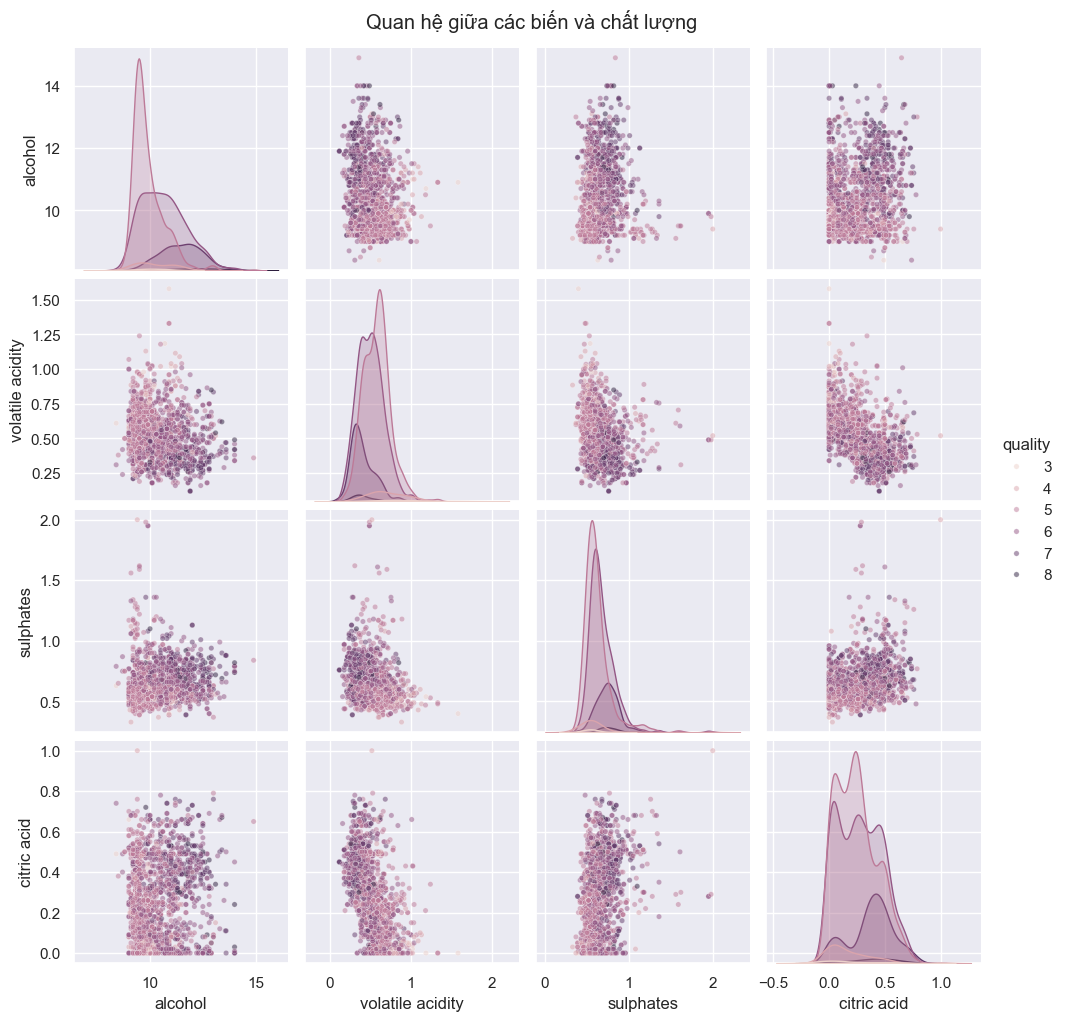

In [70]:
#Pairplot: Quan hệ giữa các biến và chất lượng
sns.pairplot(ruou[['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'quality']], hue='quality', diag_kind='kde', plot_kws={'alpha':0.5, 's':15})
plt.suptitle('Quan hệ giữa các biến và chất lượng', y=1.02)
plt.show()

- **Mục đích:** Nhìn tổng thể các mối quan hệ giữa các biến quan trọng và chất lượng.

- **Phân tích:**

    - Các scatter plot cho thấy biến nào liên quan chặt với chất lượng.
    - Đường chéo cho biết phân phối từng biến.


- **Phán đoán:**

    - Rượu có nồng độ cồn cao, axit bay hơi thấp, sulphates cao thường có chất lượng tốt hơn.
    - Các thuộc tính như residual sugar, chlorides ít ảnh hưởng đến chất lượng.
    - Dữ liệu không cân bằng về chất lượng, chủ yếu tập trung ở mức trung bình.
    - Có thể xây dựng mô hình dự báo chất lượng dựa trên các thuộc tính hóa học, ưu tiên các biến có tương quan mạnh với quality.

#### **1.2.4. Bài tập thực hành 2.**

Thực hiện trực quan hóa dữ liệu trên tập dữ liệu về bệnh tiểu đường. Dữ liệu lấy tại 
https://www.kaggle.com/code/vincentlugat/pima-indians-diabetes-eda-prediction-0-906

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams['font.family'] = 'Arial'

df = pd.read_csv('data/diabetes.csv')

- Tìm hiểu dữ liệu:

In [72]:
print("Số dòng, số cột:", df.shape)

print("\nKiểu dữ liệu các cột:")
print(df.dtypes)

print("\n5 dòng đầu tiên:")
print(df.head())

print("\nThông tin tổng quan:")
print(df.info())

Số dòng, số cột: (768, 9)

Kiểu dữ liệu các cột:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

5 dòng đầu tiên:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   

- Tiền xử lý dữ liệu:

In [73]:
# Các cột không nên có giá trị 0 (trừ Pregnancies và Outcome)
cols_with_zero_invalid = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Đếm số lượng giá trị 0 ở các cột này
for col in cols_with_zero_invalid:
    n_zeros = (df[col] == 0).sum()
    print(f"Số lượng giá trị 0 bất hợp lý ở cột {col}: {n_zeros}")

# Thay thế giá trị 0 bằng NaN để xử lý tiếp
df[cols_with_zero_invalid] = df[cols_with_zero_invalid].replace(0, np.nan)

# Kiểm tra lại số lượng giá trị thiếu
print("\nSố lượng giá trị thiếu sau khi thay thế:")
print(df.isnull().sum())

# Xử lý giá trị thiếu: điền bằng median của từng cột
for col in cols_with_zero_invalid:
    median = df[col].median()
    df[col].fillna(median, inplace=True)
    print(f"Đã thay thế NaN ở cột {col} bằng median = {median}")

Số lượng giá trị 0 bất hợp lý ở cột Glucose: 5
Số lượng giá trị 0 bất hợp lý ở cột BloodPressure: 35
Số lượng giá trị 0 bất hợp lý ở cột SkinThickness: 227
Số lượng giá trị 0 bất hợp lý ở cột Insulin: 374
Số lượng giá trị 0 bất hợp lý ở cột BMI: 11

Số lượng giá trị thiếu sau khi thay thế:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64
Đã thay thế NaN ở cột Glucose bằng median = 117.0
Đã thay thế NaN ở cột BloodPressure bằng median = 72.0
Đã thay thế NaN ở cột SkinThickness bằng median = 29.0
Đã thay thế NaN ở cột Insulin bằng median = 125.0
Đã thay thế NaN ở cột BMI bằng median = 32.3


- Khai phá dữ liệu:

In [74]:
# Thống kê mô tả cho toàn bộ dữ liệu
desc = df.describe().T
desc['median'] = df.median()
print(desc)

# Giải thích ý nghĩa một số chỉ số
print("\nÝ nghĩa:")
print("- mean: Giá trị trung bình")
print("- std: Độ lệch chuẩn, thể hiện mức độ phân tán")
print("- min/max: Giá trị nhỏ/lớn nhất")
print("- 25%/50%/75%: Các phân vị, giúp hiểu về phân phối dữ liệu")

                          count        mean        std     min        25%  \
Pregnancies               768.0    3.845052   3.369578   0.000    1.00000   
Glucose                   768.0  121.656250  30.438286  44.000   99.75000   
BloodPressure             768.0   72.386719  12.096642  24.000   64.00000   
SkinThickness             768.0   29.108073   8.791221   7.000   25.00000   
Insulin                   768.0  140.671875  86.383060  14.000  121.50000   
BMI                       768.0   32.455208   6.875177  18.200   27.50000   
DiabetesPedigreeFunction  768.0    0.471876   0.331329   0.078    0.24375   
Age                       768.0   33.240885  11.760232  21.000   24.00000   
Outcome                   768.0    0.348958   0.476951   0.000    0.00000   

                               50%        75%     max    median  
Pregnancies                 3.0000    6.00000   17.00    3.0000  
Glucose                   117.0000  140.25000  199.00  117.0000  
BloodPressure              72.0

- Trực quán hóa phân phối dữ liệu:

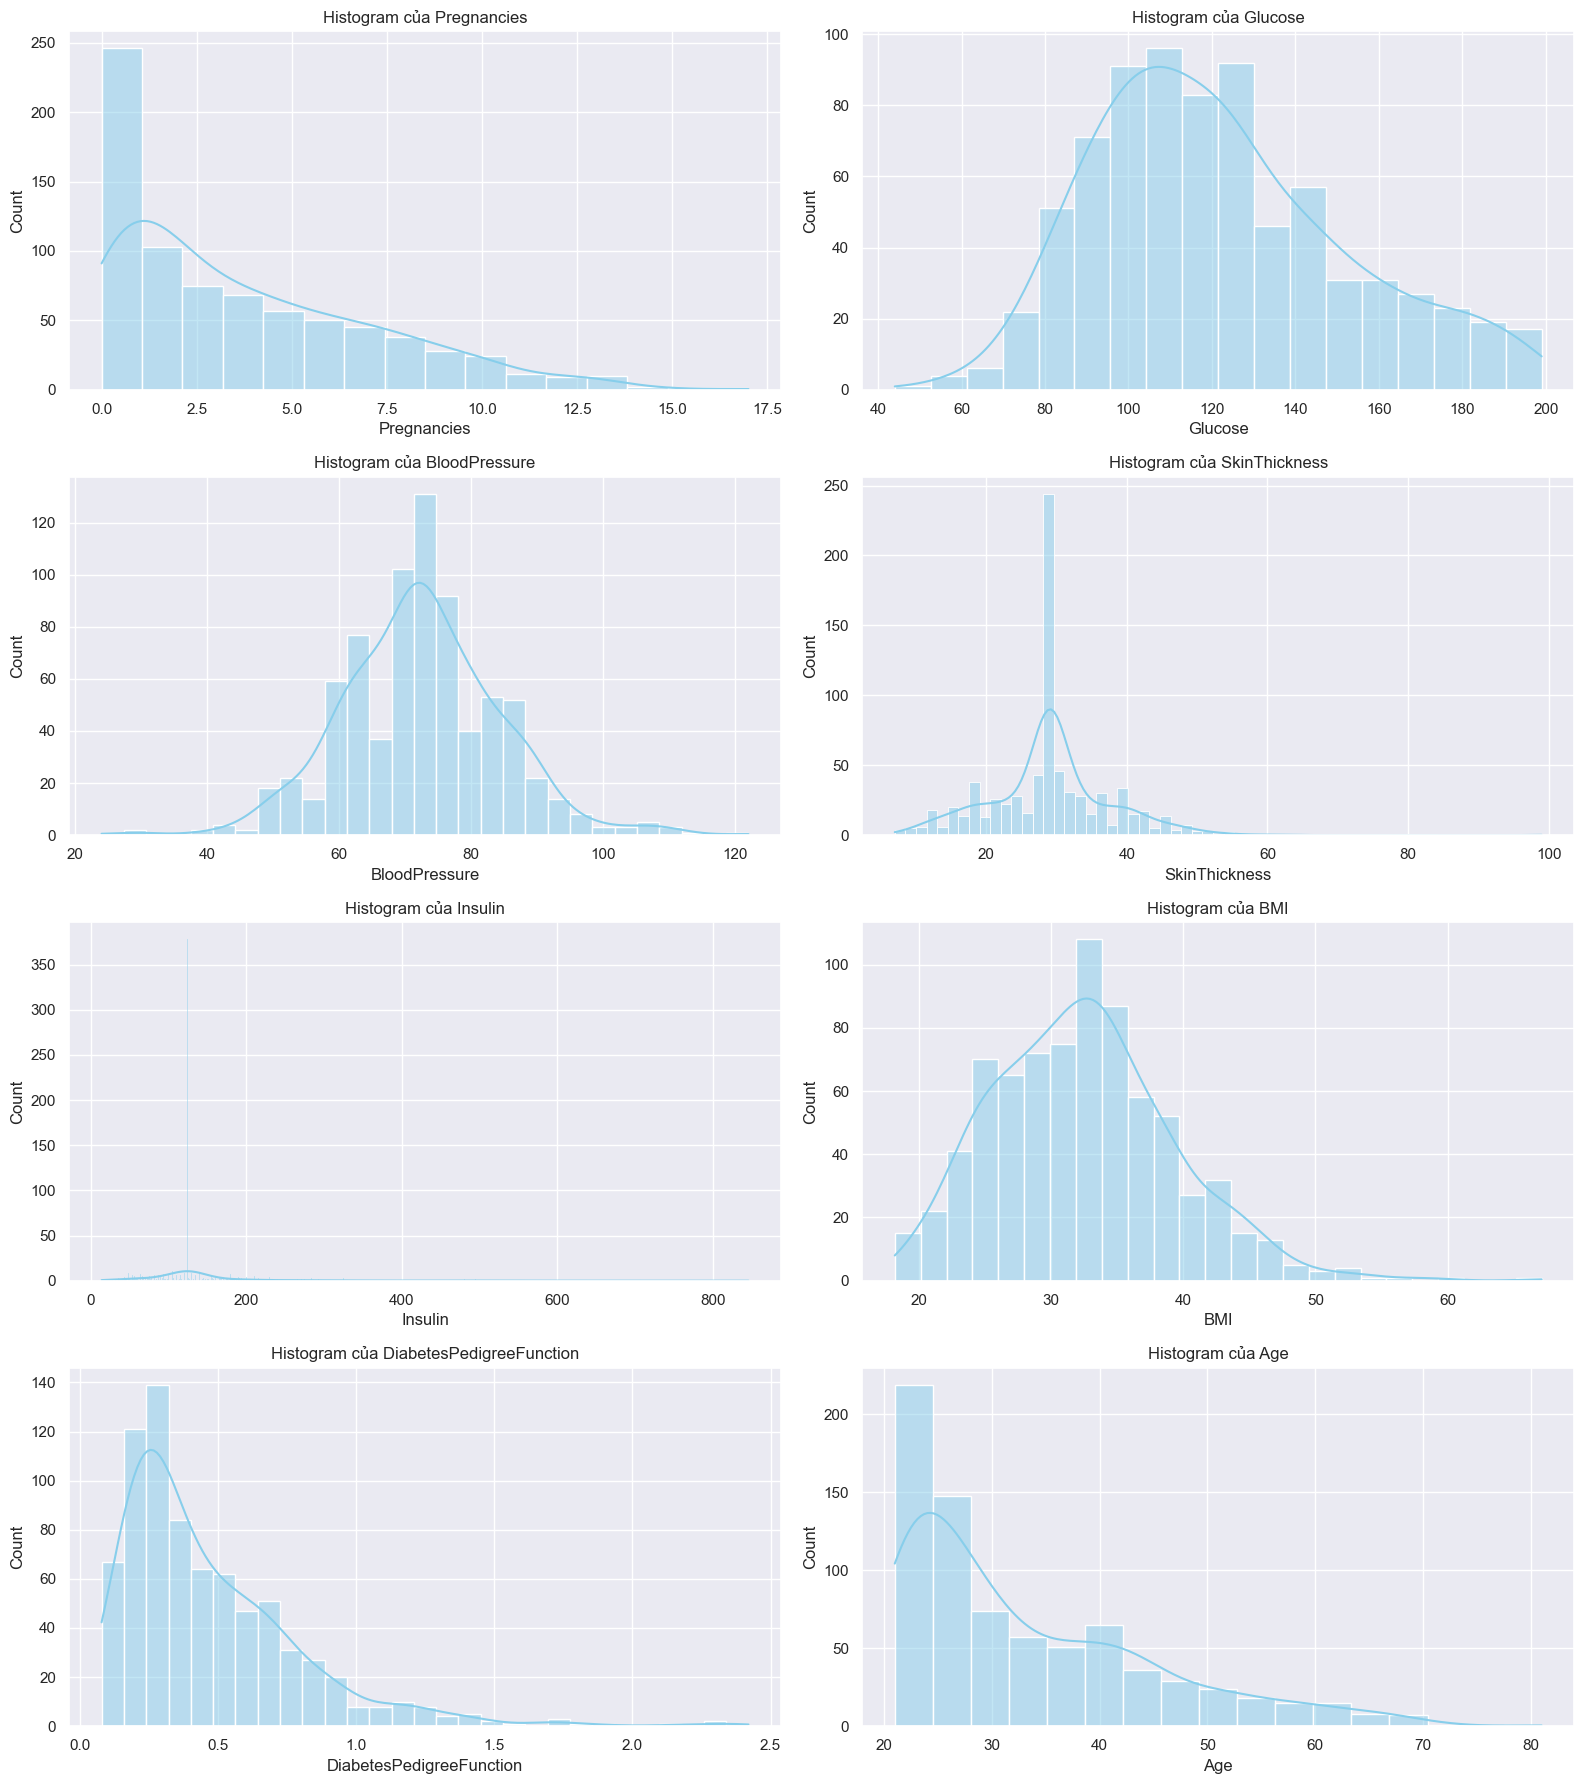

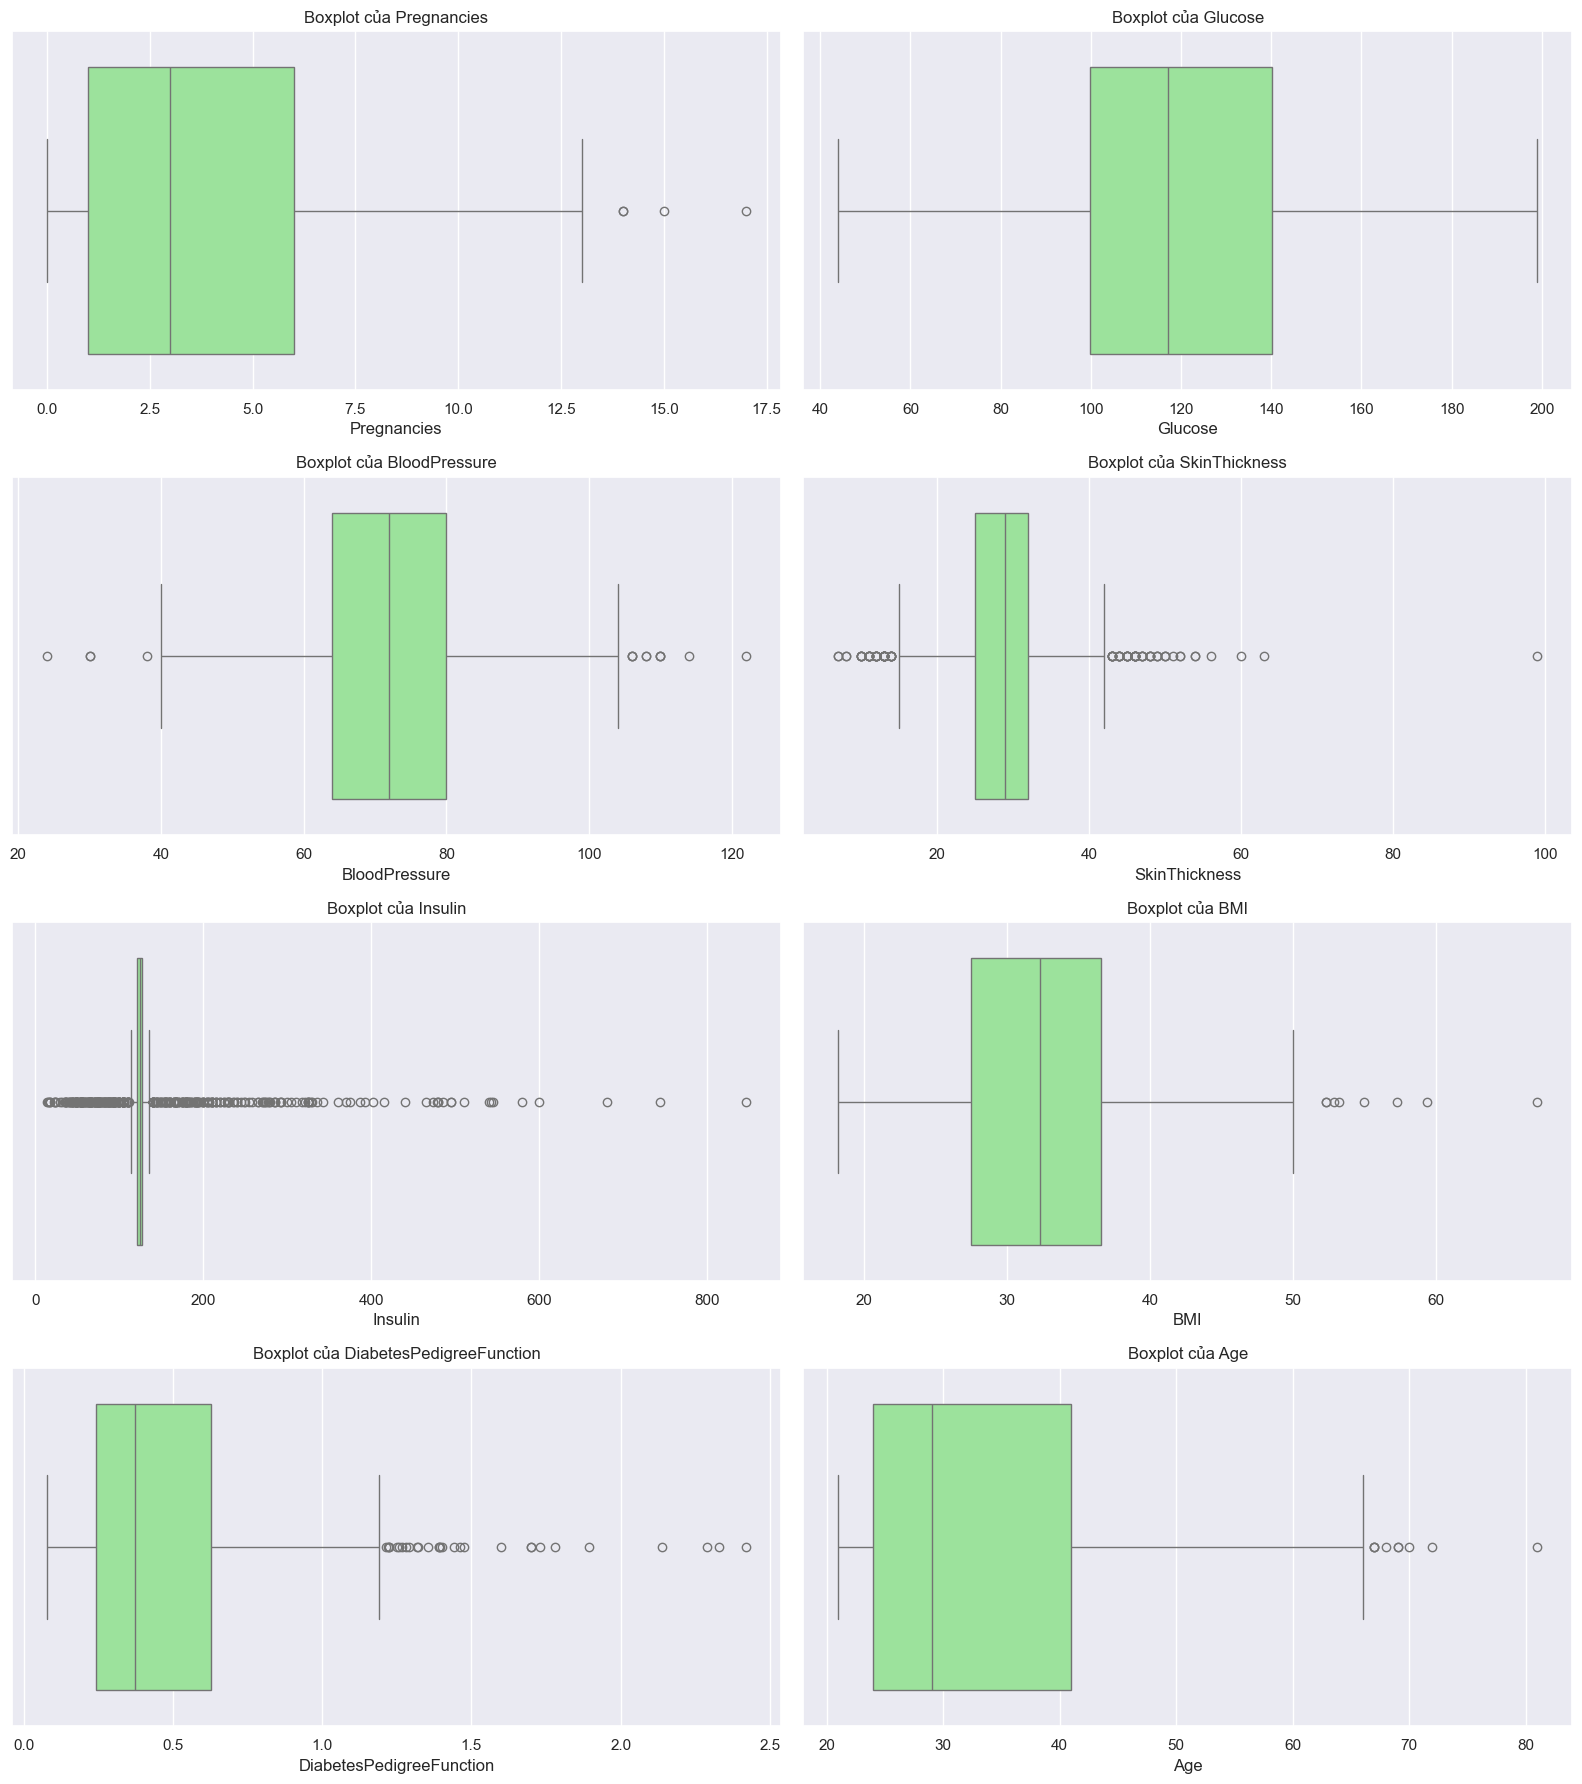

In [75]:
fig, axes = plt.subplots(4, 2, figsize=(16, 18))
axes = axes.flatten()
cols = df.columns[:-1]  # Bỏ Outcome

for i, col in enumerate(cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Histogram của {col}')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(4, 2, figsize=(16, 18))
axes = axes.flatten()
for i, col in enumerate(cols):
    sns.boxplot(x=df[col], ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Boxplot của {col}')
plt.tight_layout()
plt.show()

- Phân tích biểu đồ phân phối:

    - Histogram giúp nhận biết các thuộc tính có phân phối chuẩn hay lệch, có nhiều giá trị ngoại lệ không.
    - Boxplot giúp phát hiện các giá trị ngoại lệ (outlier) và so sánh mức độ phân tán giữa các thuộc tính.
    - Một số thuộc tính như Insulin, SkinThickness, BMI có nhiều giá trị lệch phải (skewed right) và xuất hiện outlier rõ rệt.

- Trực quan hóa mối quan hệ giữa các thuộc tính:

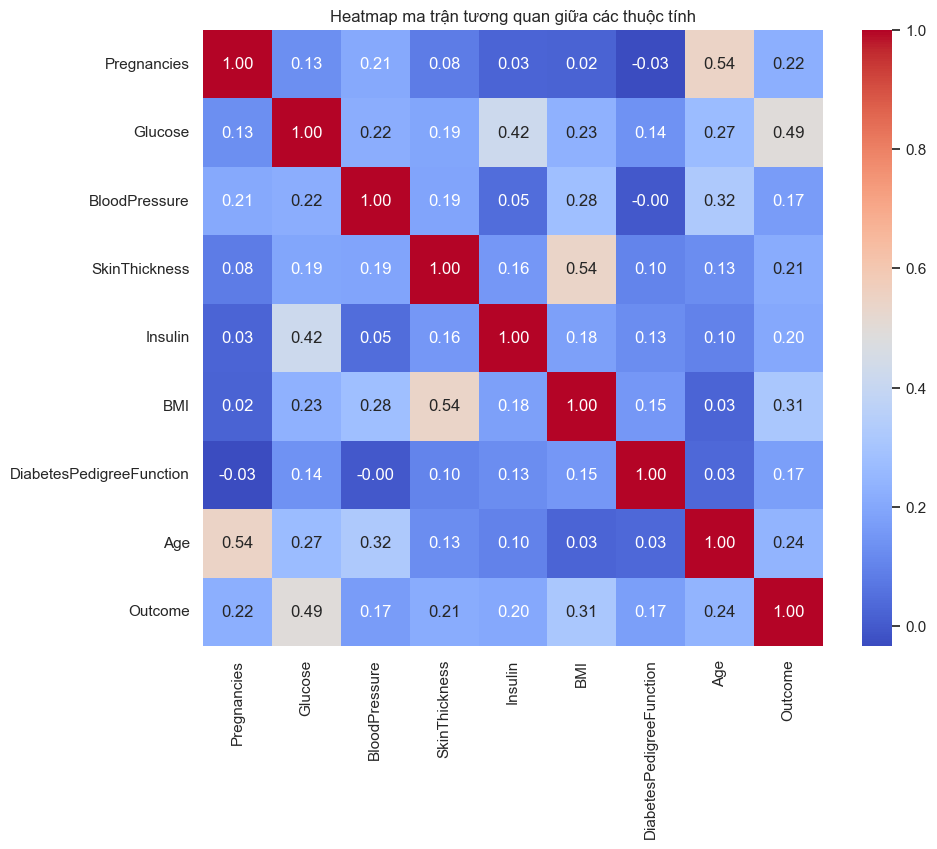

In [76]:
# Ma trận tương quan
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap ma trận tương quan giữa các thuộc tính')
plt.show()

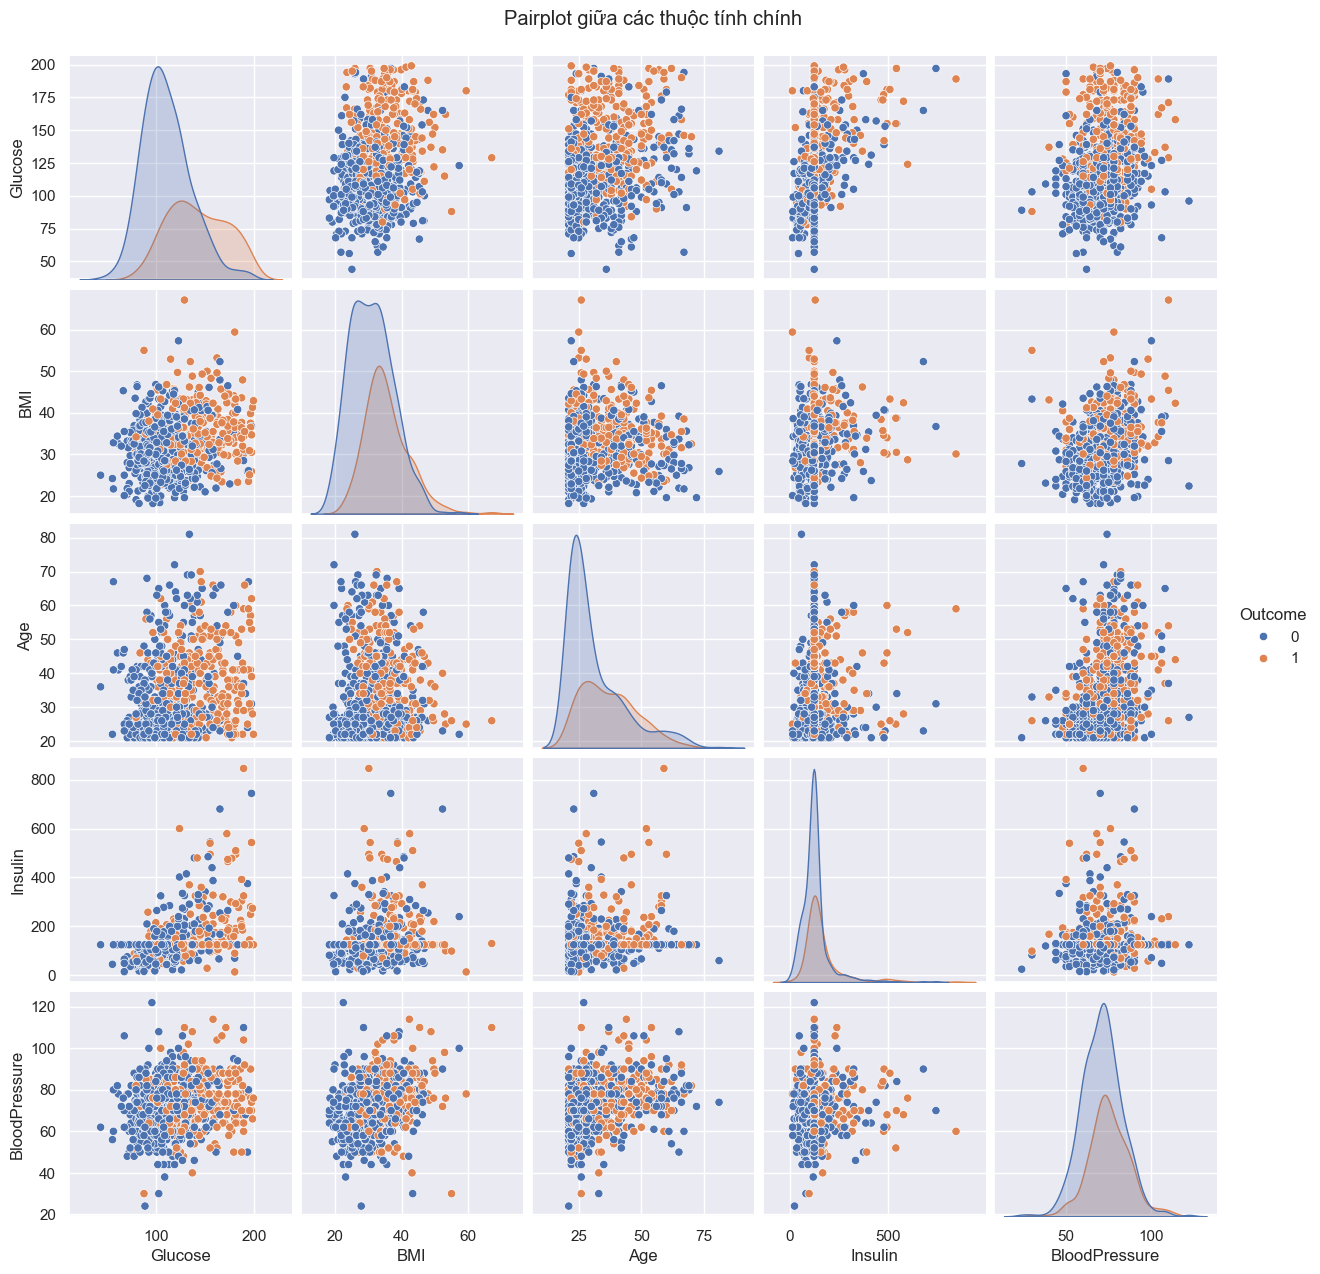

In [77]:

# Pairplot cho các thuộc tính chính
sns.pairplot(df, hue='Outcome', vars=['Glucose', 'BMI', 'Age', 'Insulin', 'BloodPressure'])
plt.suptitle('Pairplot giữa các thuộc tính chính', y=1.02)
plt.show()

- Phân tích mối quan hệ:

    - Glucose, BMI, Age có tương quan dương với Outcome, tức là giá trị càng cao thì nguy cơ tiểu đường càng lớn.
    - Một số thuộc tính như Insulin, SkinThickness có mối liên hệ yếu hơn với Outcome.
    - Các thuộc tính có tương quan với nhau ở mức vừa phải, không quá cao (tránh multicollinearity).

- Phân tích sự khác biệt giữa nhóm Outcome: So sánh phân phối các thuộc tính giữa nhóm không mắc (Outcome=0) và mắc tiểu đường (Outcome=1) bằng boxplot, violinplot để phân tích sự khác biệt.

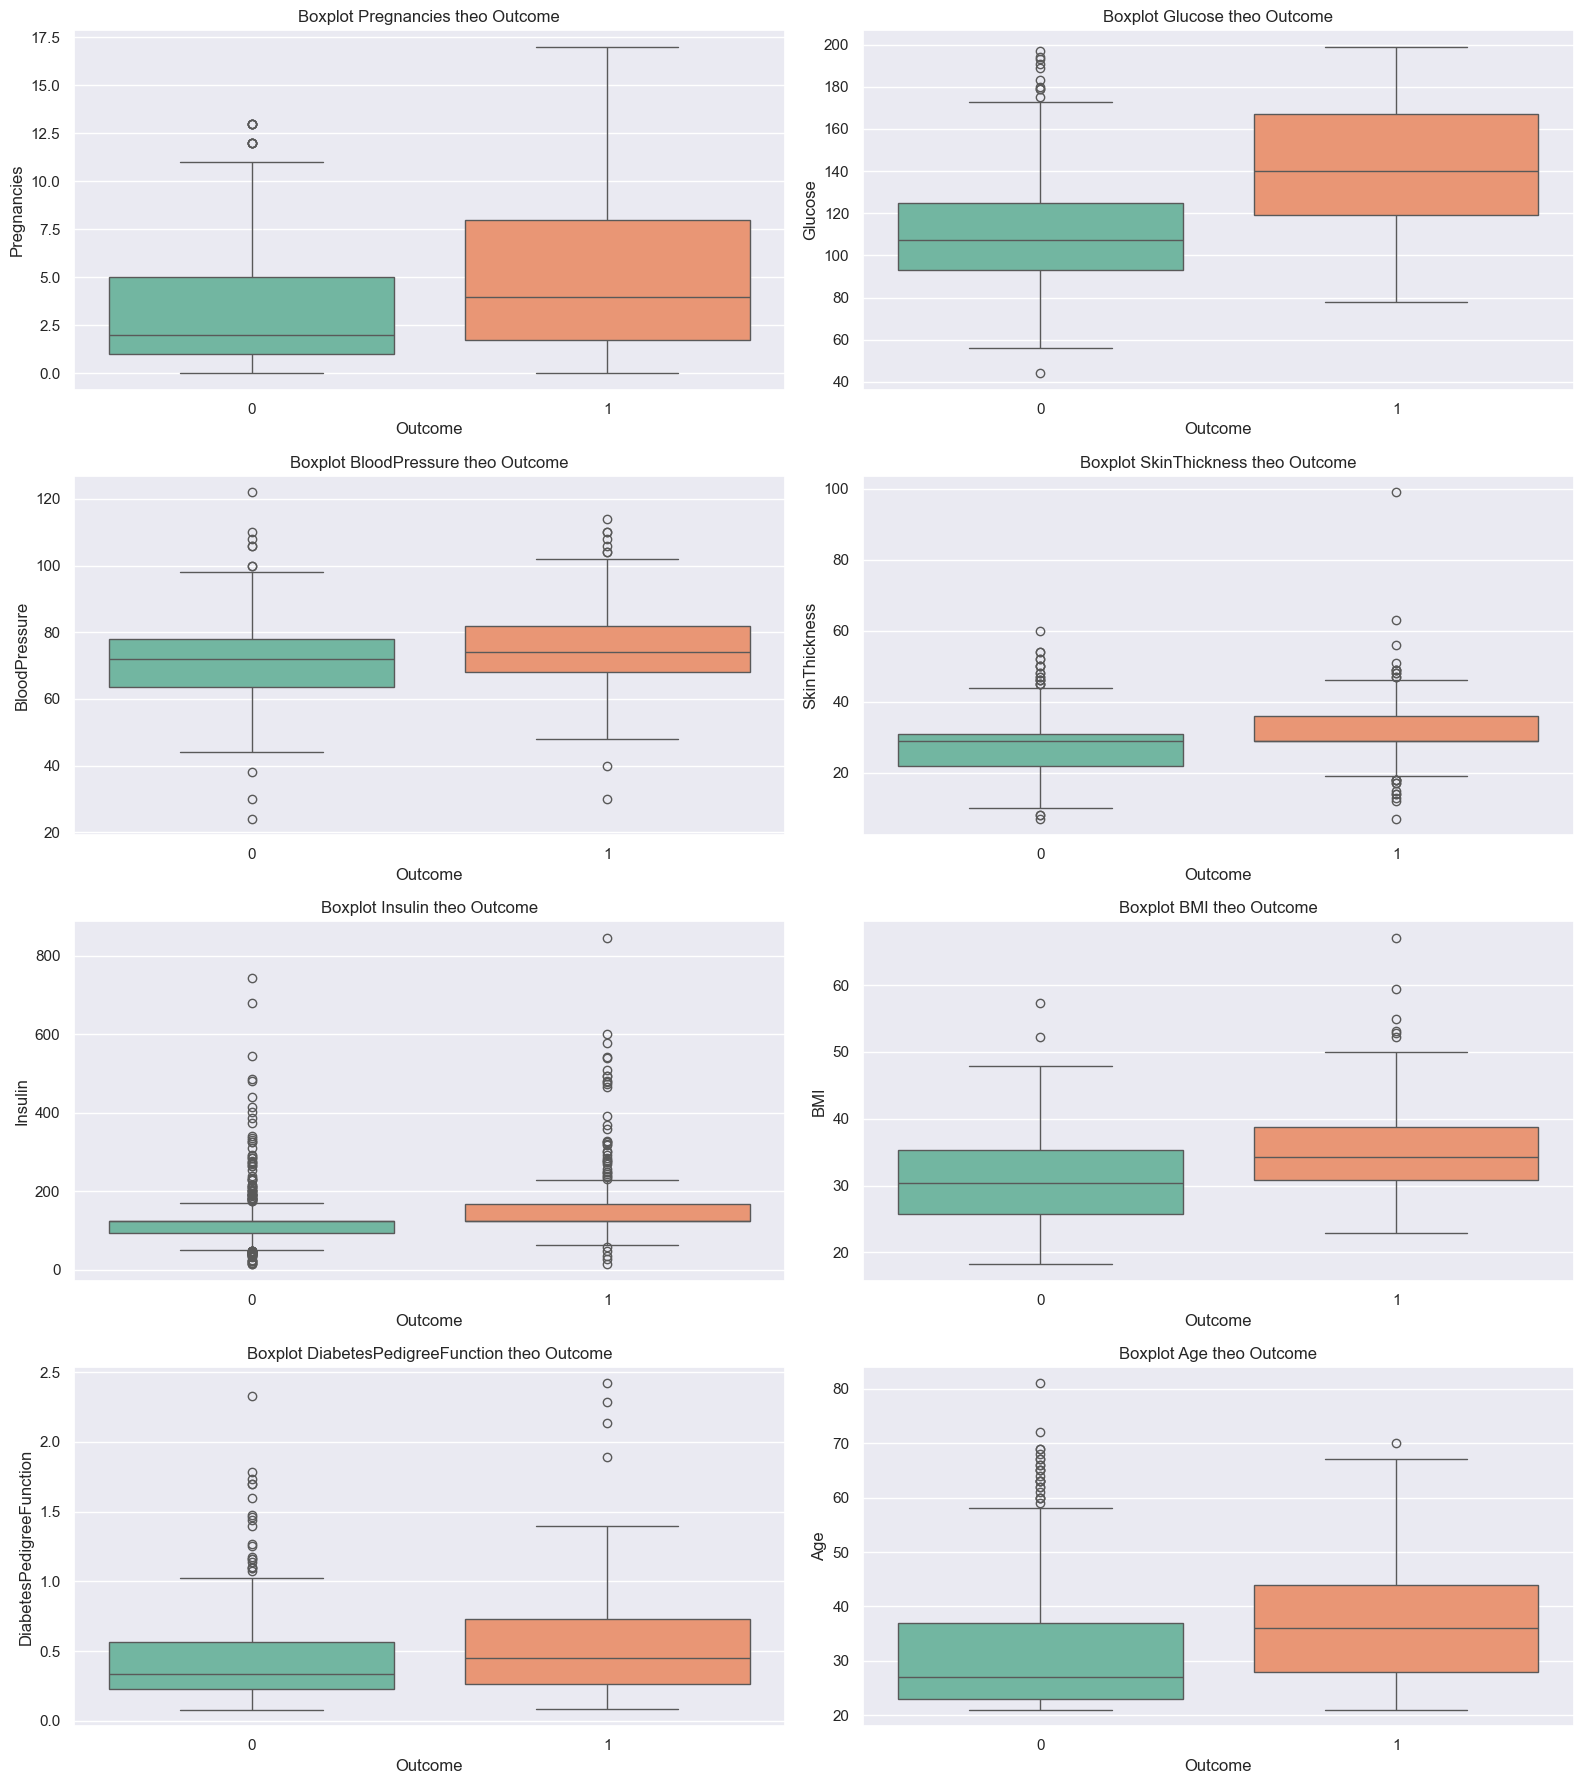

In [78]:
#Boxplot: So sánh trung vị, phạm vi giá trị, phát hiện outlier giữa hai nhóm.
cols = df.columns[:-1]
fig, axes = plt.subplots(4, 2, figsize=(16, 18))
axes = axes.flatten()
for i, col in enumerate(cols):
    sns.boxplot(x='Outcome', y=col, data=df, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Boxplot {col} theo Outcome')
plt.tight_layout()
plt.show()

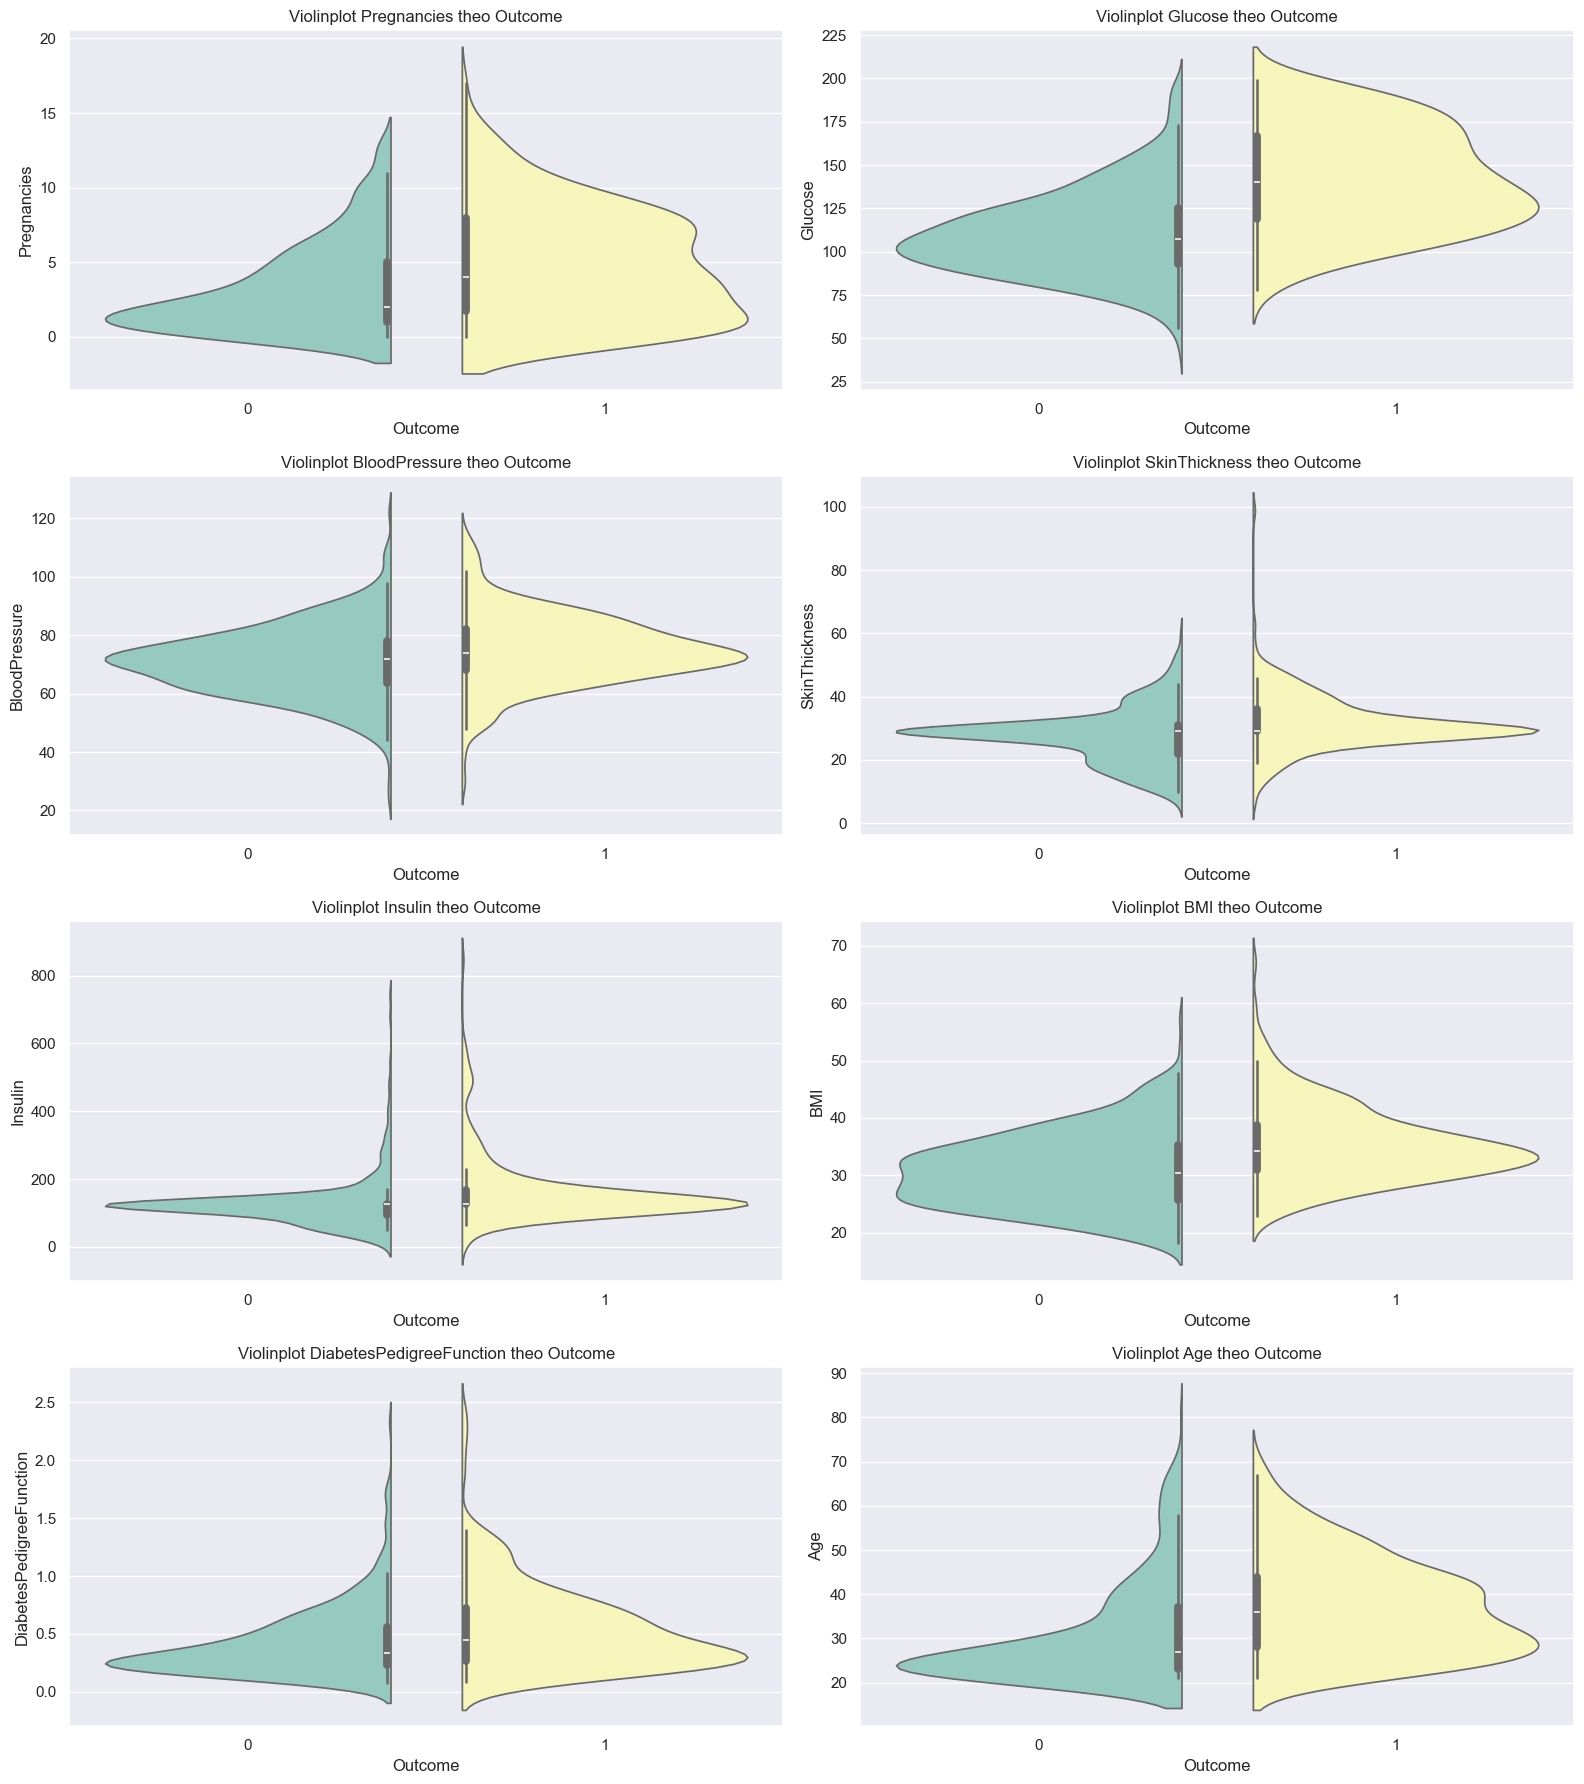

In [79]:
#Violinplot: Thể hiện phân phối xác suất, mật độ giá trị của từng thuộc tính theo từng nhóm Outcome.
fig, axes = plt.subplots(4, 2, figsize=(16, 18))
axes = axes.flatten()
for i, col in enumerate(cols):
    sns.violinplot(x='Outcome', y=col, data=df, ax=axes[i], palette='Set3', split=True)
    axes[i].set_title(f'Violinplot {col} theo Outcome')
plt.tight_layout()
plt.show()

- Phân tích: 

    - **Glucose:**

        - Nhóm Outcome=1 có giá trị Glucose trung bình và trung vị cao hơn hẳn nhóm Outcome=0.
        - Phân phối Glucose ở nhóm mắc tiểu đường lệch phải, nhiều giá trị cao.
        - Điều này phù hợp với y học: Glucose cao là yếu tố nguy cơ lớn nhất.

    - **BMI:**

        - BMI của nhóm Outcome=1 cũng cao hơn rõ rệt, cho thấy béo phì liên quan đến nguy cơ tiểu đường.
        - Boxplot và violinplot đều cho thấy sự khác biệt này.

    - **Age:**

        - Người mắc tiểu đường (Outcome=1) thường lớn tuổi hơn.
        - Phân phối tuổi ở nhóm này rộng hơn, nhiều người trên 40 tuổi.

    - **Insulin, SkinThickness:**

        - Nhóm Outcome=1 có xu hướng Insulin và SkinThickness cao hơn, nhưng sự khác biệt không rõ rệt bằng
        - Glucose, BMI, Age.
        - Nhiều outlier ở cả hai nhóm.

    - **BloodPressure:**

        - Sự khác biệt giữa hai nhóm không quá lớn, nhưng nhóm Outcome=1 có trung vị nhỉnh hơn.
        Pregnancies
        - Số lần mang thai trung bình ở nhóm Outcome=1 cao hơn, phù hợp với nguy cơ tiểu đường thai kỳ.

    - **Kết luận:**

        - Glucose, BMI, Age là ba thuộc tính phân biệt rõ nhất giữa hai nhóm.
        - Insulin, SkinThickness, BloodPressure cũng có vai trò nhưng mức độ phân biệt thấp hơn.
        - Các biểu đồ cho thấy khả năng phân loại nhóm nguy cơ dựa vào các thuộc tính này là khả thi.

- Phán đoán:

    - Người có Glucose, BMI, tuổi cao nên được tầm soát tiểu đường thường xuyên.
    - Các thuộc tính này có thể dùng để xây dựng mô hình dự báo nguy cơ tiểu đường.
    - Việc kiểm soát cân nặng, chế độ ăn uống, vận động sẽ giúp giảm nguy cơ mắc bệnh.

- **Phát hiện ngoại lệ và xử lý:** Phát hiện ngoại lệ bằng boxplot, z-score hoặc IQR, xử lý hoặc đánh dấu các giá trị bất thường để tránh ảnh hưởng đến phân tích.

In [80]:
from scipy.stats import zscore

# Tính z-score cho các thuộc tính số
z_scores = np.abs(zscore(df[cols]))
outlier_mask = (z_scores > 3)
outlier_counts = outlier_mask.sum(axis=0)
for i, col in enumerate(cols):
    print(f"Số lượng ngoại lệ (z-score > 3) ở cột {col}: {outlier_counts[i]}")

# Đánh dấu các dòng có ít nhất 1 ngoại lệ
df['is_outlier'] = (outlier_mask.sum(axis=1) > 0)
print(f"\nTổng số dòng có ít nhất 1 ngoại lệ: {df['is_outlier'].sum()}")

# (Có thể loại bỏ hoặc giữ lại tùy mục đích, ở đây chỉ đánh dấu)

Số lượng ngoại lệ (z-score > 3) ở cột Pregnancies: 4
Số lượng ngoại lệ (z-score > 3) ở cột Glucose: 0
Số lượng ngoại lệ (z-score > 3) ở cột BloodPressure: 8
Số lượng ngoại lệ (z-score > 3) ở cột SkinThickness: 4
Số lượng ngoại lệ (z-score > 3) ở cột Insulin: 20
Số lượng ngoại lệ (z-score > 3) ở cột BMI: 5
Số lượng ngoại lệ (z-score > 3) ở cột DiabetesPedigreeFunction: 11
Số lượng ngoại lệ (z-score > 3) ở cột Age: 5

Tổng số dòng có ít nhất 1 ngoại lệ: 50


- **Nhận xét và phán đoán:** Tổng hợp các phát hiện, đưa ra nhận xét về các yếu tố nguy cơ, xu hướng, mối liên hệ với bệnh tiểu đường dựa trên dữ liệu đã phân tích.

    - **Nhận xét tổng quan:**

        - **Glucose, BMI, Age** là các yếu tố nguy cơ nổi bật: người có giá trị cao ở các thuộc tính này dễ mắc tiểu đường hơn.
        - **Insulin** và **SkinThickness** cũng có vai trò nhưng mức độ ảnh hưởng thấp hơn.
        - Dữ liệu có một số ngoại lệ, đặc biệt ở các thuộc tính Insulin, SkinThickness, Age, cần chú ý khi xây dựng mô hình dự đoán.
        - Sự khác biệt rõ rệt giữa hai nhóm Outcome cho thấy khả năng phân loại dựa trên các thuộc tính này là khả thi.
        - Cần xử lý giá trị thiếu và ngoại lệ cẩn thận để đảm bảo chất lượng phân tích và mô hình hóa.

    - **Phán đoán:**

        - Những người có chỉ số Glucose, BMI, tuổi cao nên được tầm soát tiểu đường thường xuyên.
        - Việc kiểm soát cân nặng, chế độ ăn uống và vận động có thể giúp giảm nguy cơ mắc bệnh.
        - Dữ liệu này phù hợp để xây dựng các mô hình dự đoán nguy cơ tiểu đường dựa trên các thuộc tính đã phân tích.

Thực hiện EDA trên tập dữ liệu mua sắm tại siêu thị. Tập dữ liệu lấy từ 
https://www.kaggle.com/code/rajatkumar30/eda-online-retail 

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
sns.set(style="whitegrid")
%matplotlib inline

In [83]:
onl = pd.read_excel("data/Online Retail.xlsx")

**1. Khám phá dữ liệu Online Retail**

Trong phần này, chúng ta sẽ đọc dữ liệu, xem kích thước, kiểu dữ liệu, các giá trị đầu tiên và thông tin tổng quan về bộ dữ liệu Online Retail. Mục đích là để hiểu cấu trúc, phạm vi và các đặc điểm cơ bản của dữ liệu trước khi tiến hành các bước xử lý tiếp theo.

In [84]:
# Xem kích thước và các dòng đầu tiên của dữ liệu
print("Kích thước dữ liệu:", onl.shape)
display(onl.head())

# Thông tin tổng quan về kiểu dữ liệu và giá trị null
onl.info()

# Thống kê mô tả sơ bộ cho các thuộc tính số
display(onl.describe())

Kích thước dữ liệu: (541909, 8)


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303

**2. Tiền xử lý dữ liệu**

Tiền xử lý dữ liệu là bước quan trọng để đảm bảo dữ liệu sạch và phù hợp cho phân tích. Chúng ta sẽ kiểm tra và xử lý giá trị thiếu, dữ liệu trùng lặp, chuyển đổi kiểu dữ liệu phù hợp, và loại bỏ các giao dịch bị hủy hoặc có giá trị âm.

In [85]:
# Kiểm tra giá trị thiếu
missing = onl.isnull().sum()
print("Số lượng giá trị thiếu mỗi cột:\n", missing)

# Xử lý giá trị thiếu: loại bỏ các dòng thiếu CustomerID (nếu cần)
onl_clean = onl.dropna(subset=['CustomerID'])

# Kiểm tra dữ liệu trùng lặp
duplicates = onl_clean.duplicated().sum()
print("Số dòng trùng lặp:", duplicates)
onl_clean = onl_clean.drop_duplicates()

# Chuyển đổi kiểu dữ liệu cho cột InvoiceDate
onl_clean['InvoiceDate'] = pd.to_datetime(onl_clean['InvoiceDate'])

# Loại bỏ giao dịch bị hủy (InvoiceNo bắt đầu bằng 'C') và giá trị âm
onl_clean = onl_clean[~onl_clean['InvoiceNo'].astype(str).str.startswith('C')]
onl_clean = onl_clean[(onl_clean['Quantity'] > 0) & (onl_clean['UnitPrice'] > 0)]

# Tạo cột TotalPrice
onl_clean['TotalPrice'] = onl_clean['Quantity'] * onl_clean['UnitPrice']

print("Dữ liệu sau khi làm sạch:", onl_clean.shape)

Số lượng giá trị thiếu mỗi cột:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
Số dòng trùng lặp: 5225
Dữ liệu sau khi làm sạch: (392692, 9)


** 3. Phân tích tổng quan các thuộc tính**

Ở phần này, chúng ta sẽ thống kê mô tả cho các thuộc tính số và phân loại, đồng thời phân tích ý nghĩa từng thuộc tính trong ngữ cảnh bán lẻ trực tuyến.

In [86]:
# Thống kê mô tả cho các thuộc tính số
display(onl_clean[['Quantity', 'UnitPrice', 'TotalPrice']].describe())

# Thống kê số lượng giá trị duy nhất cho các thuộc tính phân loại
for col in ['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Country']:
    print(f"Số lượng giá trị duy nhất của {col}: {onl_clean[col].nunique()}")

# Phân tích ý nghĩa các thuộc tính
print("""
- InvoiceNo: Mã hóa đơn, giúp xác định từng giao dịch.
- StockCode: Mã sản phẩm, dùng để phân biệt các mặt hàng.
- Description: Mô tả sản phẩm.
- Quantity: Số lượng sản phẩm được mua trong mỗi giao dịch.
- InvoiceDate: Thời điểm giao dịch diễn ra.
- UnitPrice: Giá bán mỗi sản phẩm.
- CustomerID: Mã khách hàng, giúp phân tích hành vi mua sắm.
- Country: Quốc gia của khách hàng.
- TotalPrice: Tổng giá trị của từng dòng giao dịch.
""")

Quantity      UnitPrice     TotalPrice
count  392692.000000  392692.000000  392692.000000
mean       13.119702       3.125914      22.631500
std       180.492832      22.241836     311.099224
min         1.000000       0.001000       0.001000
25%         2.000000       1.250000       4.950000
50%         6.000000       1.950000      12.450000
75%        12.000000       3.750000      19.800000
max     80995.000000    8142.750000  168469.600000

Số lượng giá trị duy nhất của InvoiceNo: 18532
Số lượng giá trị duy nhất của StockCode: 3665
Số lượng giá trị duy nhất của Description: 3877
Số lượng giá trị duy nhất của CustomerID: 4338
Số lượng giá trị duy nhất của Country: 37

- InvoiceNo: Mã hóa đơn, giúp xác định từng giao dịch.
- StockCode: Mã sản phẩm, dùng để phân biệt các mặt hàng.
- Description: Mô tả sản phẩm.
- Quantity: Số lượng sản phẩm được mua trong mỗi giao dịch.
- InvoiceDate: Thời điểm giao dịch diễn ra.
- UnitPrice: Giá bán mỗi sản phẩm.
- CustomerID: Mã khách hàng, giúp phân tích hành vi mua sắm.
- Country: Quốc gia của khách hàng.
- TotalPrice: Tổng giá trị của từng dòng giao dịch.



**4. Trực quan hóa phân phối số lượng và giá trị giao dịch**

Chúng ta sẽ vẽ các biểu đồ histogram và boxplot cho Quantity, UnitPrice, và TotalPrice để quan sát phân phối dữ liệu, phát hiện các giá trị bất thường, và hiểu rõ hơn về đặc điểm của các giao dịch.

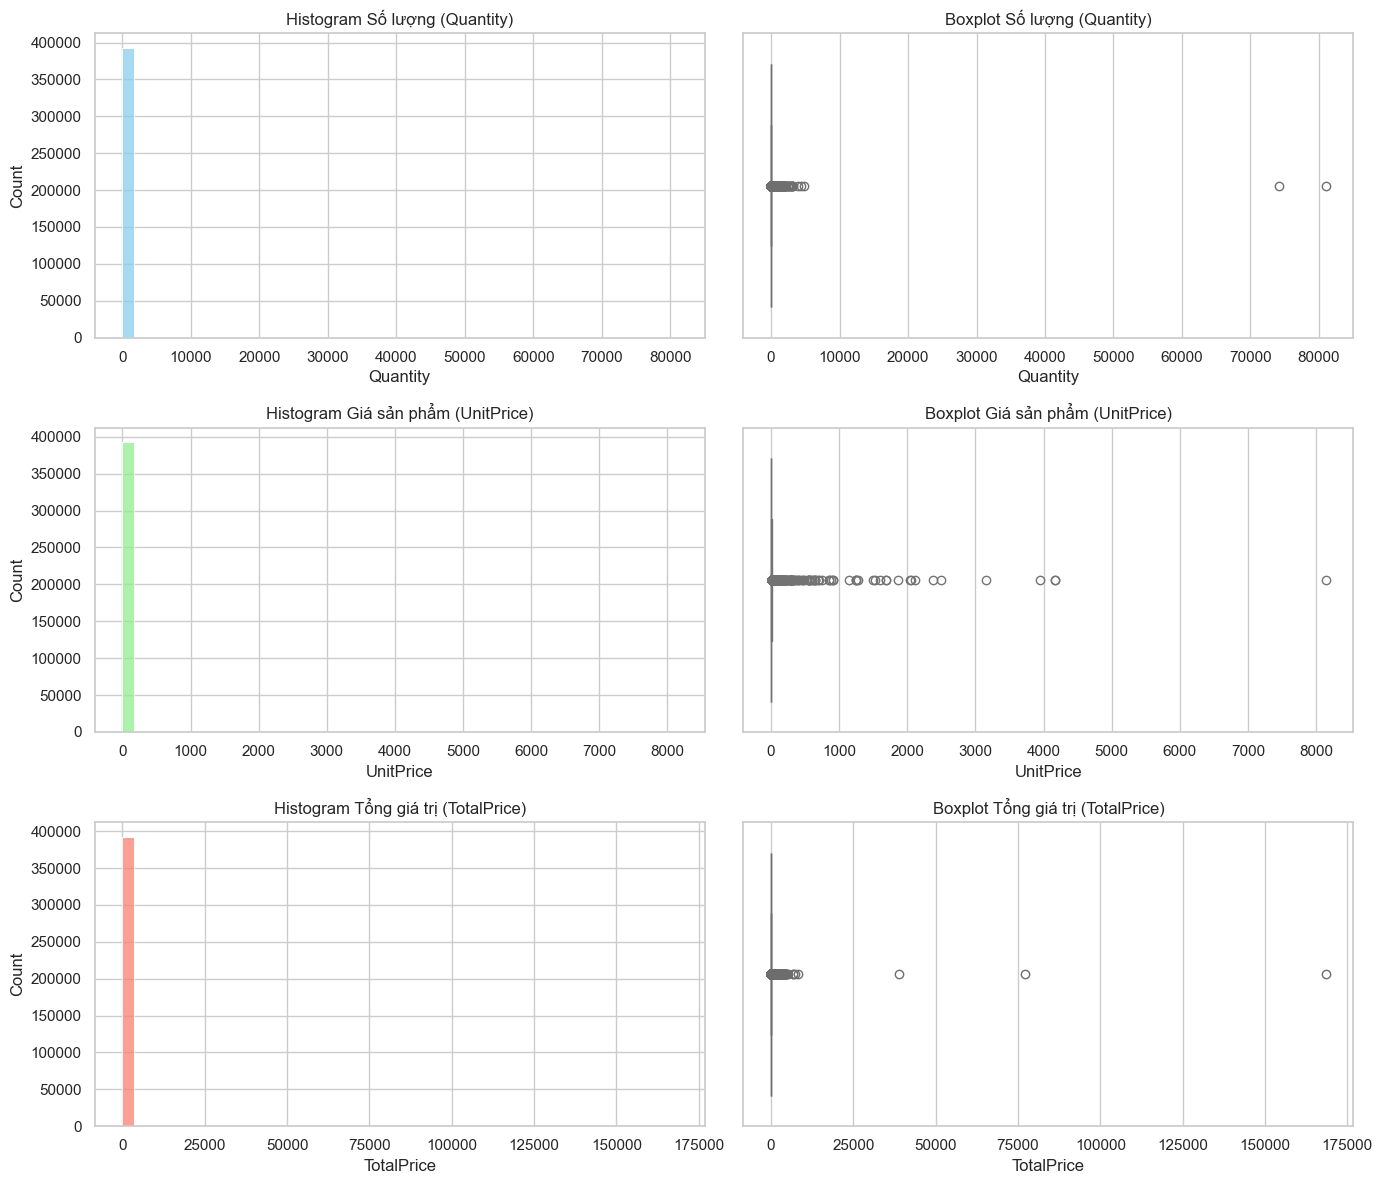

In [87]:
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# Histogram
sns.histplot(onl_clean['Quantity'], bins=50, ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Histogram Số lượng (Quantity)')
sns.histplot(onl_clean['UnitPrice'], bins=50, ax=axes[1,0], color='lightgreen')
axes[1,0].set_title('Histogram Giá sản phẩm (UnitPrice)')
sns.histplot(onl_clean['TotalPrice'], bins=50, ax=axes[2,0], color='salmon')
axes[2,0].set_title('Histogram Tổng giá trị (TotalPrice)')

# Boxplot
sns.boxplot(x=onl_clean['Quantity'], ax=axes[0,1], color='skyblue')
axes[0,1].set_title('Boxplot Số lượng (Quantity)')
sns.boxplot(x=onl_clean['UnitPrice'], ax=axes[1,1], color='lightgreen')
axes[1,1].set_title('Boxplot Giá sản phẩm (UnitPrice)')
sns.boxplot(x=onl_clean['TotalPrice'], ax=axes[2,1], color='salmon')
axes[2,1].set_title('Boxplot Tổng giá trị (TotalPrice)')

plt.tight_layout()
plt.show()

- **Mục đích biểu đồ:**

    - Histogram giúp quan sát phân phối tổng thể, phát hiện các giá trị phổ biến và bất thường.
    - Boxplot giúp nhận diện các ngoại lệ (outlier) và so sánh phạm vi giá trị.

- **Nhận xét:**

    - Quantity và TotalPrice thường phân phối lệch phải, có nhiều giá trị nhỏ và một số giá trị lớn bất thường.
    - UnitPrice đa số tập trung ở mức thấp, một số sản phẩm có giá rất cao (cần kiểm tra kỹ hơn).

**5. Phân tích khách hàng và quốc gia**

Phân tích số lượng giao dịch và tổng giá trị theo CustomerID và Country giúp xác định khách hàng lớn, quốc gia nổi bật, từ đó đưa ra chiến lược kinh doanh phù hợp.

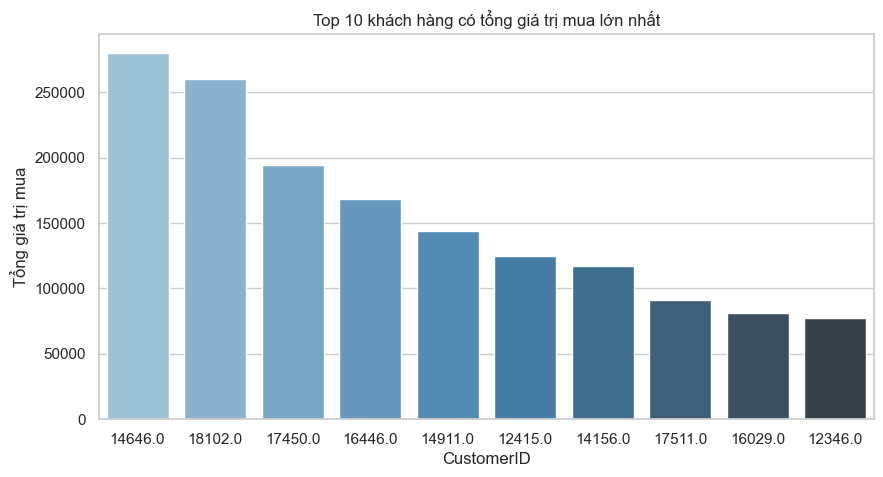

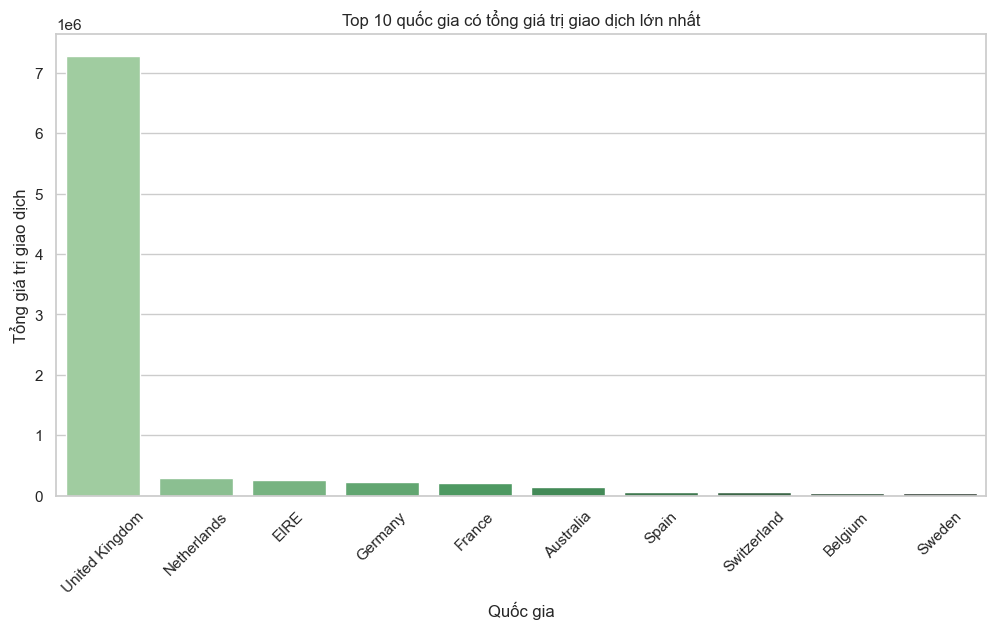

In [88]:
# Top 10 khách hàng có tổng giá trị mua lớn nhất
top_customers = onl_clean.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette='Blues_d')
plt.title('Top 10 khách hàng có tổng giá trị mua lớn nhất')
plt.xlabel('CustomerID')
plt.ylabel('Tổng giá trị mua')
plt.show()

# Top 10 quốc gia có tổng giá trị giao dịch lớn nhất (loại trừ UK nếu muốn so sánh các nước khác)
country_sales = onl_clean.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=country_sales.index[:10], y=country_sales.values[:10], palette='Greens_d')
plt.title('Top 10 quốc gia có tổng giá trị giao dịch lớn nhất')
plt.xlabel('Quốc gia')
plt.ylabel('Tổng giá trị giao dịch')
plt.xticks(rotation=45)
plt.show()

- **Phân tích:**

    - Các khách hàng lớn đóng góp phần lớn doanh thu, cần tập trung chăm sóc nhóm này.
    - Quốc gia có doanh thu cao nhất thường là UK, các quốc gia khác có thể là thị trường tiềm năng nếu tăng cường quảng bá.
    - Biểu đồ giúp xác định đối tượng khách hàng và thị trường mục tiêu.

**6. Phát hiện ngoại lệ và xử lý**

Sử dụng biểu đồ và thống kê để phát hiện các giá trị ngoại lệ (outlier) trong Quantity, UnitPrice, TotalPrice. Phân tích nguyên nhân và xử lý phù hợp để đảm bảo dữ liệu không bị méo mó.

Số lượng ngoại lệ TotalPrice: 31231


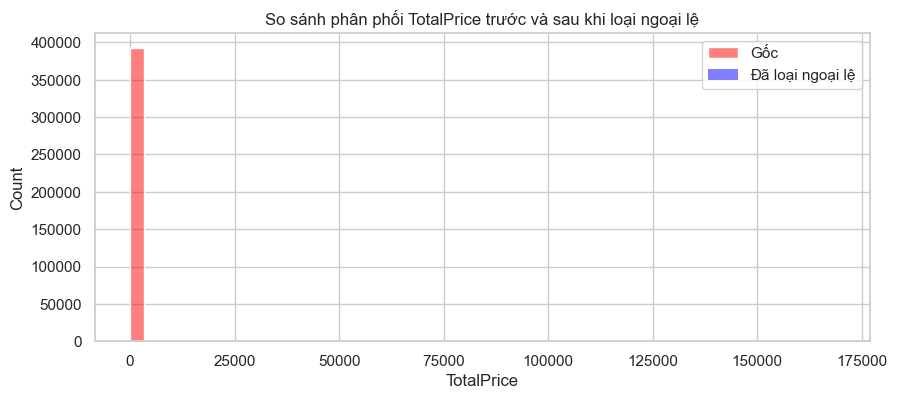

In [89]:
# Xác định ngưỡng ngoại lệ bằng IQR cho TotalPrice
Q1 = onl_clean['TotalPrice'].quantile(0.25)
Q3 = onl_clean['TotalPrice'].quantile(0.75)
IQR = Q3 - Q1
outlier_mask = (onl_clean['TotalPrice'] < (Q1 - 1.5 * IQR)) | (onl_clean['TotalPrice'] > (Q3 + 1.5 * IQR))
print("Số lượng ngoại lệ TotalPrice:", outlier_mask.sum())

# Lọc dữ liệu không có ngoại lệ TotalPrice
onl_no_outlier = onl_clean[~outlier_mask]

# So sánh phân phối trước và sau khi loại ngoại lệ
plt.figure(figsize=(10,4))
sns.histplot(onl_clean['TotalPrice'], bins=50, color='red', label='Gốc', alpha=0.5)
sns.histplot(onl_no_outlier['TotalPrice'], bins=50, color='blue', label='Đã loại ngoại lệ', alpha=0.5)
plt.legend()
plt.title('So sánh phân phối TotalPrice trước và sau khi loại ngoại lệ')
plt.show()

- **Nhận xét:**

    - Ngoại lệ thường do các giao dịch bất thường (mua số lượng lớn, giá trị cao bất thường).
    - Loại bỏ ngoại lệ giúp phân tích chính xác hơn, tránh bị ảnh hưởng bởi các giá trị cực đoan.

**7. Phân tích mối quan hệ giữa các thuộc tính**

Phân tích mối quan hệ giữa Quantity, UnitPrice, TotalPrice,... giúp hiểu rõ hơn về hành vi mua sắm, phát hiện các xu hướng và mối liên hệ tiềm năng.

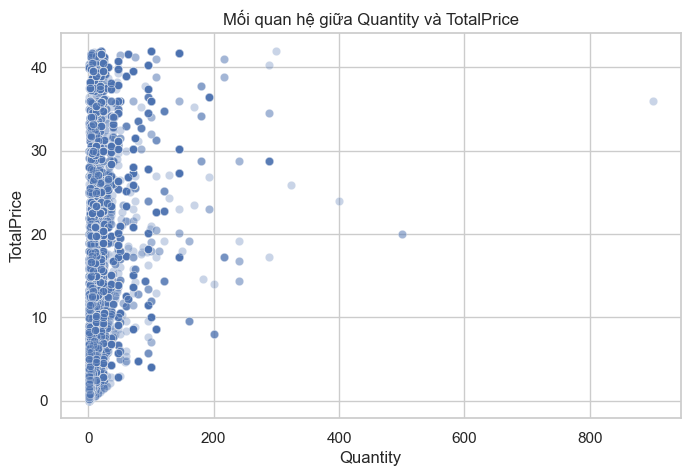

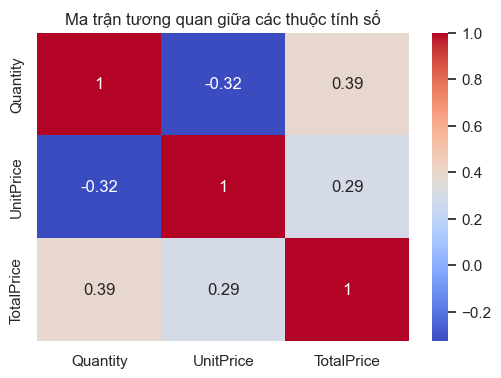

In [90]:
# Scatter plot giữa Quantity và TotalPrice
plt.figure(figsize=(8,5))
sns.scatterplot(x='Quantity', y='TotalPrice', data=onl_no_outlier, alpha=0.3)
plt.title('Mối quan hệ giữa Quantity và TotalPrice')
plt.xlabel('Quantity')
plt.ylabel('TotalPrice')
plt.show()

# Ma trận tương quan
corr = onl_no_outlier[['Quantity', 'UnitPrice', 'TotalPrice']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Ma trận tương quan giữa các thuộc tính số')
plt.show()

- **Phân tích:**

    - Quantity và TotalPrice có mối tương quan dương mạnh (hợp lý vì TotalPrice = Quantity * UnitPrice).
    - UnitPrice và Quantity thường không tương quan mạnh, cho thấy giá sản phẩm không ảnh hưởng nhiều đến số lượng mua trong từng giao dịch.
    - Ma trận tương quan giúp xác định các thuộc tính liên quan chặt chẽ, hỗ trợ xây dựng mô hình dự báo hoặc phân khúc khách hàng.

**8. Đưa ra nhận xét và phán đoán dựa trên dữ liệu**

Tổng hợp các phát hiện chính, đưa ra phán đoán về hành vi khách hàng, sản phẩm bán chạy, xu hướng theo quốc gia,... dựa trên dữ liệu đã phân tích.

- **Nhận xét tổng quan:**

    - Dữ liệu Online Retail có nhiều giao dịch nhỏ lẻ, một số giao dịch lớn bất thường (ngoại lệ).
    - Khách hàng lớn và quốc gia chủ lực (UK) đóng vai trò quan trọng trong doanh thu.
    - Sản phẩm giá thấp bán chạy hơn, số lượng mua thường nhỏ, nhưng có một số giao dịch mua số lượng lớn.
    - Ngoại lệ cần được xử lý để tránh ảnh hưởng đến phân tích.
    - Mối quan hệ giữa Quantity và TotalPrice rất mạnh, phù hợp với thực tế bán lẻ.

- **Phán đoán:**

    - Doanh nghiệp nên tập trung vào nhóm khách hàng lớn để tăng doanh thu.
    - Cần đa dạng hóa thị trường ngoài UK để mở rộng kinh doanh.
    - Sản phẩm giá thấp dễ tiêu thụ, nhưng nên kiểm soát các giao dịch bất thường để tránh rủi ro.
    - Dữ liệu sạch và phân tích kỹ giúp đưa ra quyết định kinh doanh chính xác hơn.

### **1.3. Phân tích đơn biến và đa biến.**

#### **1.3.1. Ôn tập lý thuyết.**

+ **Phân tích đơn biến (univariate analysis) là gì? Nó khác gì với phân tích hai biến (bivariate analysis) trong khám phá dữ liệu?**

    + <u>**1. Phân tích đơn biến (Univariate Analysis):**</u>

        + <i>**Định nghĩa:**</i> phân tích dữ liệu với một biến duy nhất (single variable).

        + <i>**Mục đích:**</i> hiểu đặc điểm cơ bản của biến đó:

            + Phân phối (chuẩn, lệch trái/phải, đa đỉnh?).

            + Giá trị trung tâm (mean, median, mode).

            + Độ phân tán (range, variance, std, IQR).

            + Outliers.

        + <i>**Kỹ thuật thường dùng:**</i>

            + Với dữ liệu số (numeric): Histogram, Boxplot, Density plot.

            + Với dữ liệu phân loại (categorical): Bar chart, Pie chart.

        + 📌 <i>**Ví dụ:**</i> phân tích điểm thi của 200 sinh viên → vẽ histogram để xem phân phối, tính trung bình, median, std.

    + <u>**2. Phân tích hai biến (Bivariate Analysis):**</u>

        + <i>**Định nghĩa:**</i> Phân tích mối quan hệ giữa hai biến.

        + <i>**Mục đích:**</i> Xem biến này ảnh hưởng như thế nào đến biến kia, có mối liên hệ hay không.

        + <i>**Kỹ thuật thường dùng:**</i>

            + Hai biến số (numeric–numeric): Scatter plot, Correlation (hệ số Pearson/Spearman), Regression line.

            + Một biến số + một biến phân loại (numeric–categorical): Boxplot theo nhóm, Violin plot, Grouped bar chart.

            + Hai biến phân loại (categorical–categorical): Bảng chéo (crosstab), Heatmap, Stacked bar chart, Chi-square test.

        + 📌 <i>**Ví dụ:**</i>

            + Giữa số giờ học (numeric) và điểm thi (numeric) → scatter plot để kiểm tra quan hệ tuyến tính.

            + Giữa giới tính (categorical) và điểm thi (numeric) → boxplot để xem nam/nữ khác biệt ra sao.

    + 👉 <u>**Nói ngắn gọn:**</u>

        + Univariate = mô tả một biến.

        + Bivariate = tìm mối quan hệ giữa hai biến.

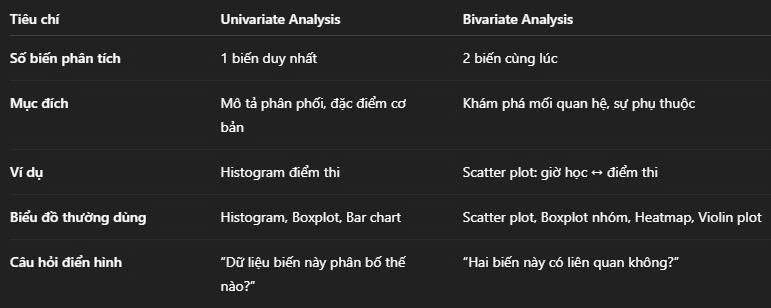

In [91]:
display(Image("image/sosanh6.png"))

+ **Các thước đo thống kê nào thường được sử dụng trong phân tích đơn biến (ví dụ: trung bình, trung vị, mode, độ lệch chuẩn)?**

    + <u>**1. Các thước đo xu hướng trung tâm (Measures of Central Tendency):**</u> dùng để mô tả “giá trị điển hình” của dữ liệu.

        + <i>**Trung bình (Mean):**</i> Giá trị trung bình cộng. Dùng khi dữ liệu phân bố cân đối, không có nhiều outlier.

        + <i>**Trung vị (Median):**</i> Giá trị ở giữa khi sắp xếp dữ liệu. Dùng khi dữ liệu có outlier hoặc phân phối lệch.

        + <i>**Mode (Giá trị thường gặp nhất):**</i> Dùng cho dữ liệu định tính (categorical) hoặc dữ liệu định lượng có nhiều giá trị lặp lại.

        + 📌 <i>**Ví dụ:**</i> Lương nhân viên trong công ty: Mean = 15 triệu, Median = 12 triệu, Mode = 10 triệu → Cho thấy có vài outlier (sếp lương rất cao) kéo trung bình lên.

    + <u>**2. Các thước đo độ phân tán (Measures of Dispersion):**</u> dùng để mô tả mức độ rải rác hay tập trung của dữ liệu.

        + <i>**Phạm vi (Range):**</i> Max – Min. Đơn giản nhưng dễ bị ảnh hưởng bởi outlier.

        + <i>**Độ lệch chuẩn (Standard Deviation – SD):**</i> Đo khoảng cách trung bình của dữ liệu so với mean.

        + <i>Phương sai (Variance):</i> Bình phương của độ lệch chuẩn.

        + <i>**IQR (Interquartile Range):**</i> Q3 – Q1, cho thấy độ phân tán của 50% dữ liệu trung tâm, ít bị ảnh hưởng bởi outlier.

        + 📌 <i>**Ví dụ:**</i> Điểm thi lớp học: Mean = 7.2, Std = 1.0 → đa số điểm nằm quanh 6.2–8.2. Range = 10 – 4 = 6 điểm.

    + <u>**3. Các thước đo hình dạng phân phối (Shape of Distribution):**</u> dùng để biết dữ liệu có cân đối không, nhọn hay bẹt.

        + <i>**Skewness (Độ lệch):**</i>

            + Skewness = 0 → phân phối đối xứng.

            + Skewness > 0 → lệch phải.

            + Skewness < 0 → lệch trái.

        + <i>**Kurtosis (Độ nhọn):**</i>

            + Kurtosis = 3 (chuẩn) → phân phối chuẩn.

            + Kurtosis > 3 → nhọn (leptokurtic).

            + Kurtosis < 3 → bẹt (platykurtic).

    + 👉 <u>**Nói ngắn gọn:**</u>

        + Mean – Median – Mode → dữ liệu tập trung ở đâu.

        + Std – Variance – Range – IQR → dữ liệu rải thế nào.

        + Skewness – Kurtosis → dữ liệu có cân đối/nhọn hay không.

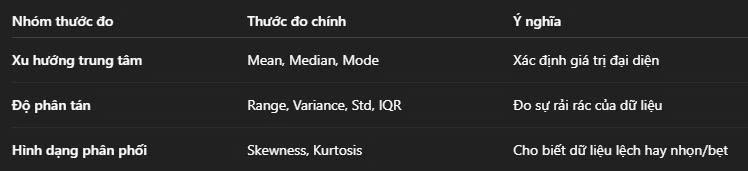

In [92]:
display(Image("image/sosanh7.png"))

+ **Trong phân tích hai biến, làm thế nào để xác định mối quan hệ giữa hai biến (ví dụ: tương quan, nhân quả)?**

    + <u>**1. Xác định mối quan hệ (liên quan thống kê – association):**</u>

        + <i>**a. Khi cả hai biến là số (numerical):**</i>

            + **Scatter plot** → quan sát xu hướng (tuyến tính, phi tuyến, không liên quan).

            + **Hệ số tương quan (Correlation coefficient):** Pearson (tuyến tính): giá trị từ –1 đến +1. Spearman/Kendall → dùng cho dữ liệu không chuẩn hoặc quan hệ phi tuyến.

                + Gần +1 → quan hệ dương mạnh (cùng tăng).

                + Gần –1 → quan hệ âm mạnh (một tăng, một giảm).

                + ≈ 0 → không có quan hệ tuyến tính rõ ràng

        + <i>**b. Khi một biến số + một biến phân loại:**</i>

            + **Boxplot / Violin plot** → so sánh phân phối theo nhóm.

            + **T-test / ANOVA** → kiểm tra sự khác biệt trung bình giữa các nhóm.

        + <i>**c. Khi cả hai biến là phân loại:**</i>

            + **Bảng chéo (Crosstab) + Heatmap** → xem phân bố.

            + **Chi-square test** → kiểm định độc lập giữa hai biến phân loại.

    + <u>**2. Phân biệt tương quan (correlation) và nhân quả (causation):**</u>

        + <i>**Tương quan:**</i> Hai biến thay đổi cùng nhau theo một cách nào đó. Ví dụ: Nhiệt độ ↑ thì số kem bán ra ↑ → có tương quan dương.

        + <i>**Nhân quả:**</i> Biến A thực sự gây ra thay đổi ở biến B. Ví dụ: Uống thuốc giảm đau → đau đầu giảm.

        + ⚠️ <i>**Quan trọng:**</i>

            + Tương quan ≠ Nhân quả.

            + Có thể có “biến thứ ba” (confounding variable) ảnh hưởng. Ví dụ: Số kem bán ra ↑ cũng kéo theo số ca đuối nước ↑, nhưng biến nguyên nhân chung ở đây là nhiệt độ cao (mùa hè).

    + <u>**3. Làm sao để kiểm tra nhân quả?**</u>

        + Trong thống kê & khoa học dữ liệu, ta cần:

            + Thí nghiệm có kiểm soát (Controlled experiments): Thay đổi biến A, giữ các yếu tố khác cố định → quan sát B thay đổi. Ví dụ: kiểm chứng thuốc mới bằng thử nghiệm lâm sàng.

        + Phân tích chuỗi thời gian (Time series analysis): Kiểm tra xem A xảy ra trước B, hay B xảy ra trước A.

        + Phương pháp thống kê nâng cao:

            + Regression (hồi quy, kiểm soát biến nhiễu).

            + Causal inference (DAGs, Propensity Score Matching).

            + Granger causality (trong time series).

    + <u>👉 **Kết luận:**</u>

        + EDA (phân tích hai biến) thường chỉ cho ta tương quan/quan hệ thống kê.

        + Để khẳng định nhân quả, cần thêm thí nghiệm hoặc mô hình suy luận nhân quả.

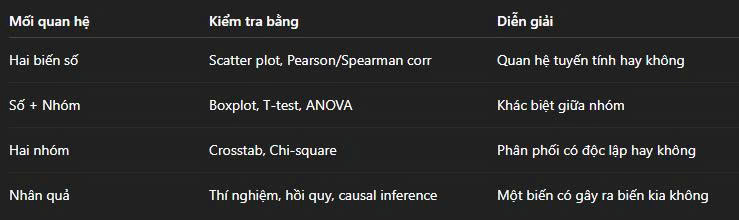

In [93]:
display(Image("image/sosanh8.png"))

+ **Sự khác biệt giữa tương quan (correlation) và hiệp biến (covariance) trong phân tích hai biến là gì?**

    + <u>**1. Hiệp biến (Covariance):**</u>

        + <i>**Định nghĩa:**</i> Đo mức độ hai biến cùng thay đổi với nhau như thế nào.

        $$
        \operatorname{Cov}(X,Y) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})
        $$

        + <i>**Ý nghĩa:**</i>

            + Cov(X, Y) > 0 → khi X tăng thì Y có xu hướng tăng.

            + Cov(X, Y) < 0 → khi X tăng thì Y có xu hướng giảm.

            + Cov(X, Y) ≈ 0 → X và Y không có mối quan hệ tuyến tính rõ ràng.

        + <i>**Nhược điểm:**</i> Giá trị phụ thuộc vào đơn vị đo, nên khó so sánh. Ví dụ: Cov chiều cao (cm) và cân nặng (kg) ≠ Cov chiều cao (m) và cân nặng (kg).

    + <u>**2. Tương quan (Correlation):**</u>

        + <i>**Định nghĩa:**</i> Là phiên bản chuẩn hóa của hiệp biến, đưa giá trị về khoảng $[-1,1]$.
        $$
        \rho{X,Y} = \frac{\operatorname{Cov}{X,Y}}{\sigma_X \cdot \sigma_y}
        $$

        + <i>**Ý nghĩa:**</i>

            + +1 → tương quan dương hoàn hảo.

            + –1 → tương quan âm hoàn hảo.

            + 0 → không có quan hệ tuyến tính.

        + <i>**Ưu điểm:**</i> Vì đã chuẩn hóa, nên không phụ thuộc vào đơn vị
        đo, dễ so sánh giữa các cặp biến.

    + <u>**3. Ví dụ trực quan:**</u>

        + Cov(chiều cao, cân nặng) = 120 → dương, nghĩa là cao hơn thì thường nặng hơn, nhưng con số “120” tự thân khó hiểu.

        + Corr(chiều cao, cân nặng) = 0.85 → cho biết rõ mối quan hệ tương quan dương mạnh.

    + 👉 <u>**Tóm lại:**</u>

        + Covariance chỉ cho biết hướng (cùng tăng/giảm) nhưng không cho biết mức độ rõ ràng.

        + Correlation là phiên bản chuẩn hóa của covariance → dễ diễn giải, dùng nhiều hơn trong phân tích dữ liệu.

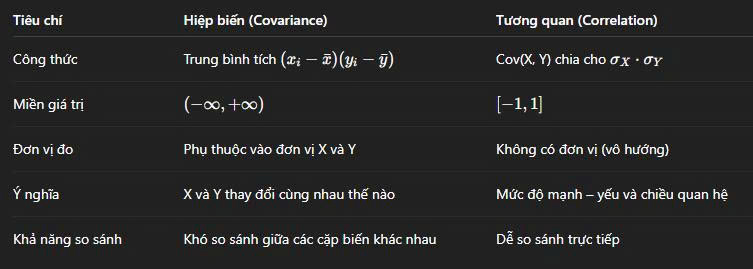

In [94]:
display(Image("image/sosanh9.png"))

+ **Khi nào nên sử dụng biểu đồ trực quan hóa trong phân tích đơn biến so với phân tích hai biến?**

    + <u>**1. Khi nào dùng biểu đồ trong phân tích đơn biến?**</u>

        + 👉 <i>**Mục tiêu:**</i> Hiểu đặc điểm của một biến duy nhất.

            + Khi muốn biết phân phối dữ liệu: Histogram, Density plot.

            + Khi muốn biết giá trị trung tâm và phân tán: Boxplot.

            + Khi muốn xem tần suất nhóm: Bar chart (cho dữ liệu phân loại).

        + 📌 <i>**Ví dụ:**</i>

            + Điểm thi 200 sinh viên → dùng histogram để biết đa số điểm nằm khoảng nào.

            + Lương nhân viên → boxplot để phát hiện outliers.

            + Tỷ lệ sinh viên theo ngành → bar chart.

    + <u>**2. Khi nào dùng biểu đồ trong phân tích hai biến?**</u>

        + 👉 <i>**Mục tiêu:**</i> Xem mối quan hệ giữa hai biến (liên quan, so sánh, phụ thuộc).

            + Cả hai biến là số: Scatter plot để xem có xu hướng tuyến tính không.

            + Một biến số + một biến phân loại: Boxplot/Violin plot để so sánh phân phối giữa các nhóm.

            + Cả hai biến phân loại: Stacked bar chart hoặc Heatmap để so sánh tần suất chéo.

        + 📌 <i>**Ví dụ:**</i>

            + Số giờ học và điểm thi → scatter plot để thấy xu hướng “học nhiều → điểm cao”.

            + Giới tính và điểm thi → boxplot để so sánh điểm nam/nữ.

            + Ngành học và loại tốt nghiệp (Giỏi/Khá/Trung bình) → heatmap.

    + 👉 <u>**Tóm lại:**</u>

        + Univariate (1 biến) → dùng khi muốn mô tả dữ liệu cơ bản, phân phối, outliers.

        + Bivariate (2 biến) → dùng khi muốn khám phá quan hệ giữa các biến (so sánh, tương quan, ảnh hưởng).

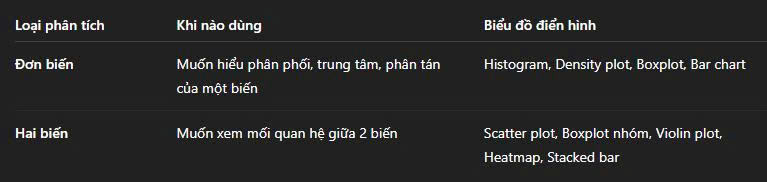

In [95]:
display(Image("image/sosanh10.png"))

+ **Đoạn code mẫu để tạo biểu đồ scatter plot hoặc heatmap để phân tích mối quan hệ giữa hai biến?**

    + <u>**1. Scatter Plot (biểu đồ phân tán):**</u> dùng khi cả hai biến là số (numerical) để xem quan hệ tuyến tính/phi tuyến. Diễn giải: nếu thấy các điểm nằm gần một đường chéo dương → có quan hệ tuyến tính dương (học nhiều → điểm cao).

    + <u>**2. Heatmap (bản đồ nhiệt):**</u> dùng khi muốn phân tích ma trận tương quan giữa nhiều biến số. Diễn giải:

        + Giá trị gần +1 → quan hệ dương mạnh.

        + Giá trị gần –1 → quan hệ âm mạnh.

        + Giá trị ≈ 0 → gần như không có quan hệ tuyến tính.

    + 👉 <u>**Kết hợp hai cái này:**</u>

        + Scatter plot → trực quan mối quan hệ giữa 2 biến cụ thể.

        + Heatmap → xem toàn bộ mối quan hệ giữa nhiều biến cùng lúc.

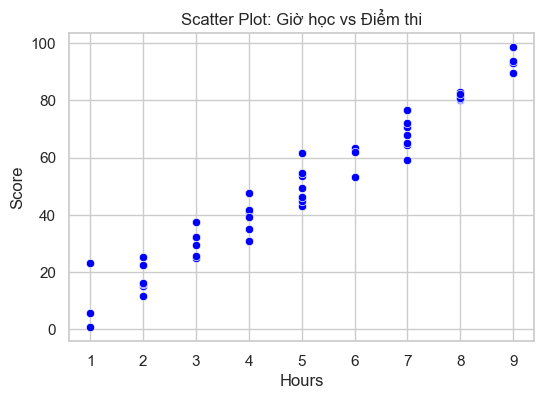

In [96]:
# Ví dụ về scatter plot với Matplotlib và Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Tạo dữ liệu mẫu: giờ học và điểm thi
np.random.seed(42)
hours = np.random.randint(1, 10, 50)      # số giờ học
scores = hours * 10 + np.random.normal(0, 5, 50)  # điểm thi (có nhiễu)

df = pd.DataFrame({"Hours": hours, "Score": scores})

# Scatter plot
plt.figure(figsize=(6,4))
sns.scatterplot(x="Hours", y="Score", data=df, color="blue")
plt.title("Scatter Plot: Giờ học vs Điểm thi")
plt.show()

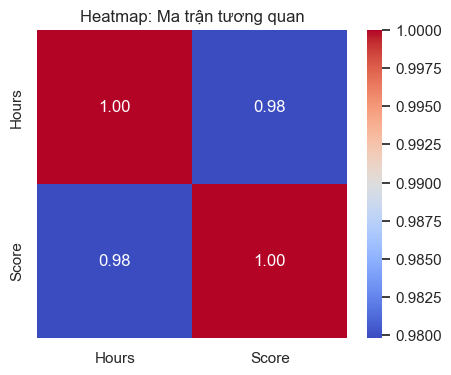

In [97]:
# Ví dụ về heatmap với Matplotlib và Seaborn
# Ma trận tương quan
corr = df.corr()

# Vẽ heatmap
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap: Ma trận tương quan")
plt.show()

+ **Làm thế nào để trực quan hóa mối quan hệ giữa một biến số và một biến phân loại bằng biểu đồ boxplot hoặc violin plot trong Python?**

    + <u>**1. Boxplot (biểu đồ hộp):**</u>

        + <i>**Thể hiện:**</i>

            + Median (Q2), Q1, Q3.

            + Khoảng IQR (Q3–Q1).

            + Các điểm ngoại lai (outliers).

        + <i>**Ứng dụng:**</i> So sánh phân phối số liệu giữa các nhóm. Ví dụ: So sánh tổng hóa đơn theo ngày trong tuần.

    + <u>**2. Violin Plot:**</u>

        + <i>**Thể hiện:**</i>

            + Tương tự boxplot nhưng bổ sung mật độ phân phối (Kernel Density Estimation).

            + Cho thấy dữ liệu tập trung ở đâu, có nhiều mode không.

        + <i>**Ứng dụng:**</i> Khi muốn hiểu chi tiết hình dạng phân phối trong mỗi nhóm.

    + 👉 <u>**Kết luận:**</u>

        + Boxplot → dùng khi muốn tóm tắt nhanh và phát hiện ngoại lai.

        + Violin plot → dùng khi muốn xem chi tiết phân phối trong từng nhóm.

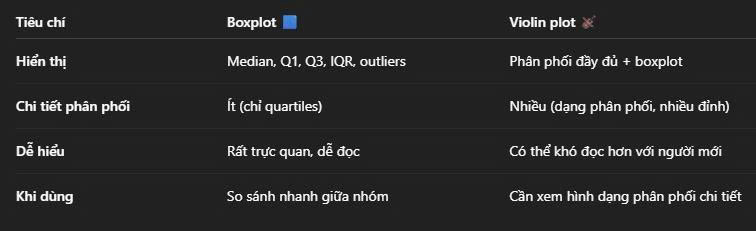

In [98]:
display(Image("image/sosanh11.png"))

In [99]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


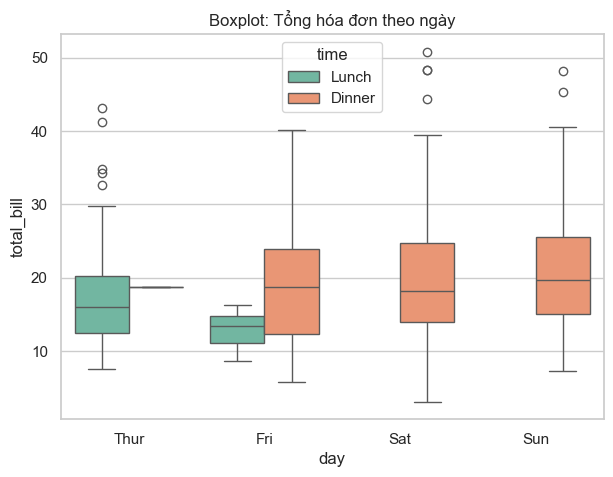

In [100]:
# Ví dụ về so sánh tổng hóa đơn theo ngày trong tuần với boxplot
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset mẫu (tips dataset có sẵn trong Seaborn)
tips = sns.load_dataset("tips")

plt.figure(figsize=(7,5))
sns.boxplot(x="day", y="total_bill", hue= "time", data=tips, palette="Set2")
plt.title("Boxplot: Tổng hóa đơn theo ngày")
plt.show()

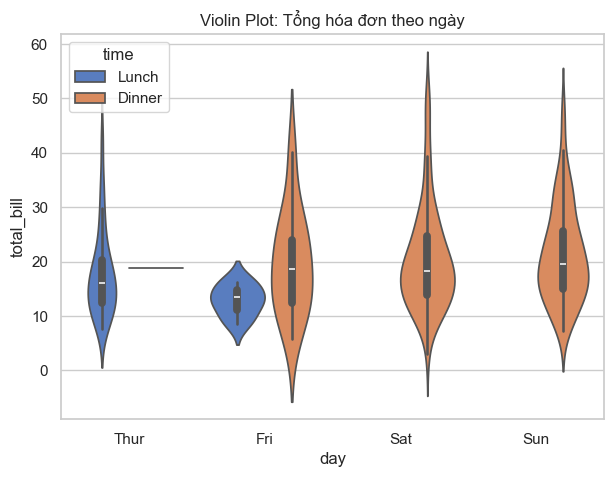

In [101]:
# Ví dụ về so sánh tổng hóa đơn theo ngày trong tuần với violin plot
plt.figure(figsize=(7,5))
sns.violinplot(x="day", y="total_bill", hue="time", data=tips, palette="muted")
plt.title("Violin Plot: Tổng hóa đơn theo ngày")
plt.show()

#### **1.3.2. Bài làm mẫu**

<u>**Bài toán 1:**</u> Thực hiện các nhiệm vụ trong bài toán 1 để làm quen với các hàm và thư viện hỗ trợ phân tích dữ liệu đơn biến. Bài toán này được thực hiện trên 2 tập dữ liệu là tập dữ liệu về chim cánh cụt và tập dữ liệu giá nhà.

+ <i>**Nhiệm vụ 1:**</i> phân tích dữ liệu đơn biến trên dữ liệu về chim cánh cụt lấy tại https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data

    + **1. Import thư viện và nạp dữ liệu:**

In [102]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
penguins_data = pd.read_csv("data/penguins_size.csv") 
penguins_data = penguins_data[['species','culmen_length_mm']]

+
    + **2. Phân tích đơn biến bằng Histogram:**

Text(0.5, 1.0, 'Kết quả thực hiện case 2 \n Univariate analysis of Culmen Length')

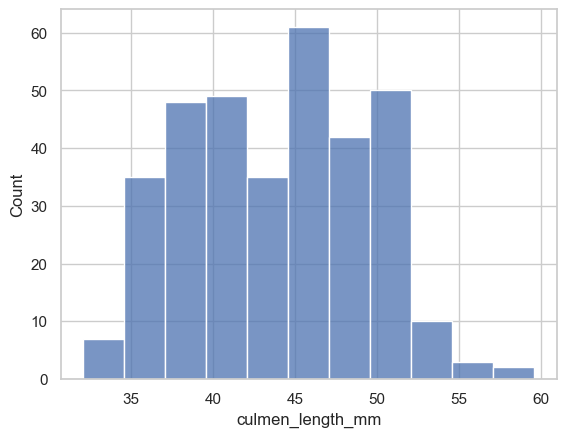

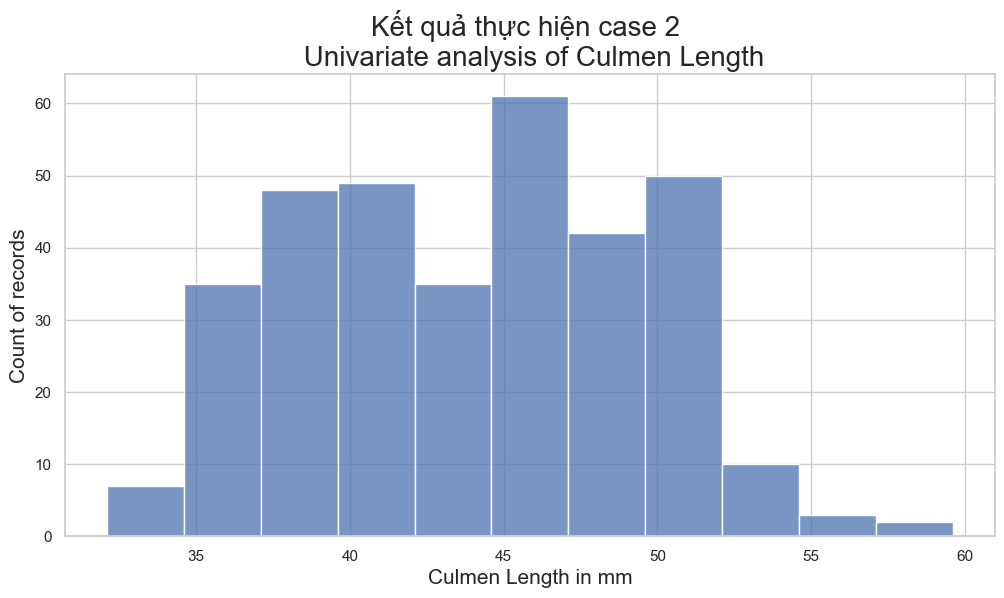

In [115]:
# case 1: basic 
sns.histplot( data = penguins_data, x= penguins_data["culmen_length_mm"]) 
# case 2: advanced 
plt.figure(figsize= (12,6)) 
ax = sns.histplot( data = penguins_data, x=  
penguins_data["culmen_length_mm"])
ax.set_xlabel('Culmen Length in mm',fontsize = 15) 
ax.set_ylabel('Count of records', fontsize = 15) 
ax.set_title('Kết quả thực hiện case 2 \n Univariate analysis of Culmen Length',fontsize= 20)

+
    + **3. Phân tích đơn biến bằng bar chart:**

Text(0.5, 1.0, 'Kết quả thực hiện case 2 \n Univariate analysis of Culmen Length')

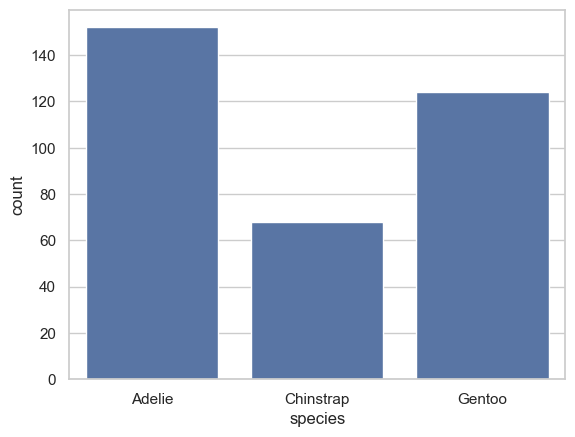

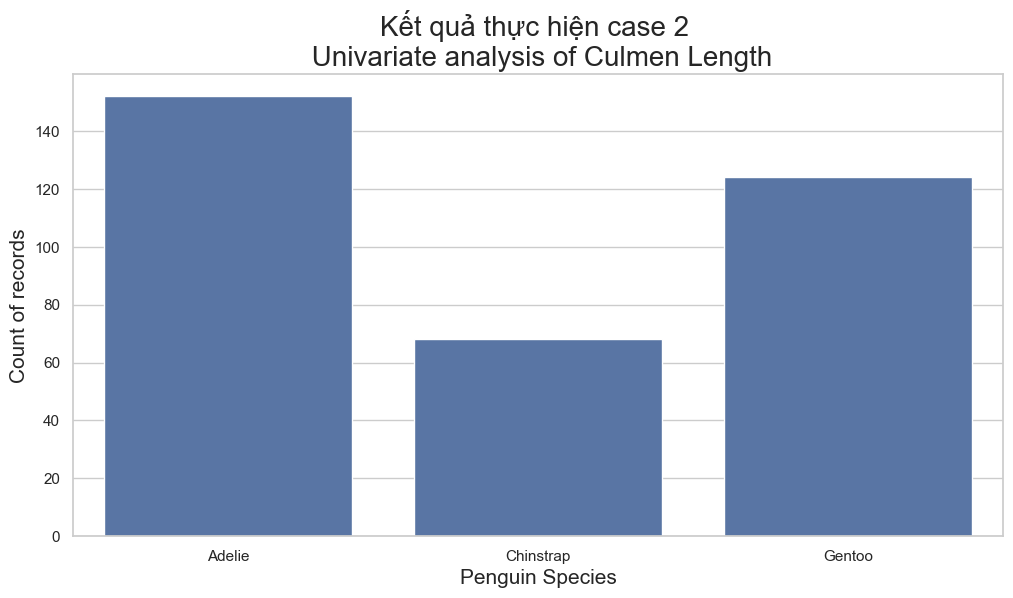

In [116]:
# case 1: basic 
sns.countplot(data = penguins_data, x= penguins_data['species']) 
# case 2: advanced 
plt.figure(figsize= (12,6)) 
ax = sns.countplot(data = penguins_data, x= penguins_data['species']) 
ax.set_xlabel('Penguin Species',fontsize = 15) 
ax.set_ylabel('Count of records',fontsize = 15) 
ax.set_title('Univariate analysis of Penguin Species', fontsize= 20) 
ax.set_title('Kết quả thực hiện case 2 \n Univariate analysis of Culmen Length', fontsize= 20)

+
    + **4. Phân tích đơn biến bằng biểu đồ tròn (Pie-chart):**

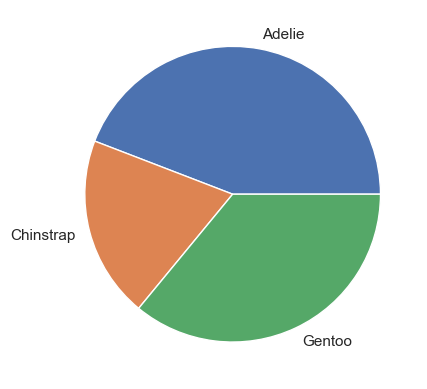

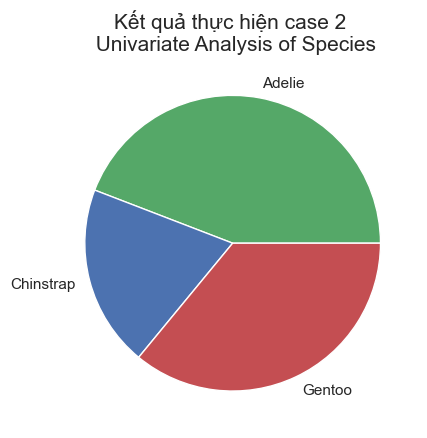

In [117]:
penguins_group = penguins_data.groupby('species').count() 
penguins_group = penguins_group.reset_index() 
# case 1: basic 
plt.pie(penguins_group["culmen_length_mm"], labels = 
                      penguins_group['species']) 
plt.show() 
# case 2: advanced 
cols = ['g', 'b', 'r'] 
plt.pie(penguins_group["culmen_length_mm"], labels = 
                          penguins_group['species'],colors = cols) 
plt.title('Kết quả thực hiện case 2 \n Univariate Analysis of Species', fontsize=15) 
plt.show()

+ <i>**Nhiệm vụ 2:**</i> Phân tích dữ liệu đơn biến trên dữ liệu giá nhà lấy từ https://www.kaggle.com/datasets/thomasnibb/amsterdam-house-price-prediction

+
    + 1. Import thư viện, nạp dữ liệu giá nhà và phân tích đơn biến dựa vào boxplot 

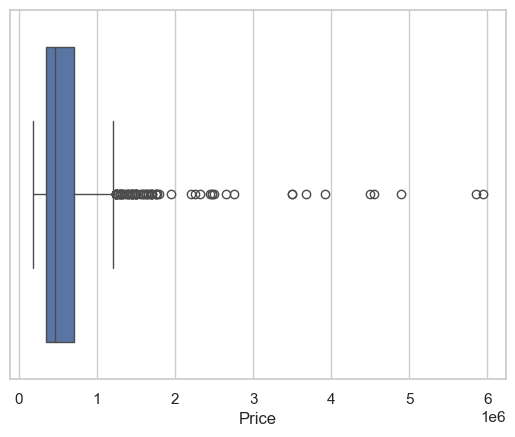

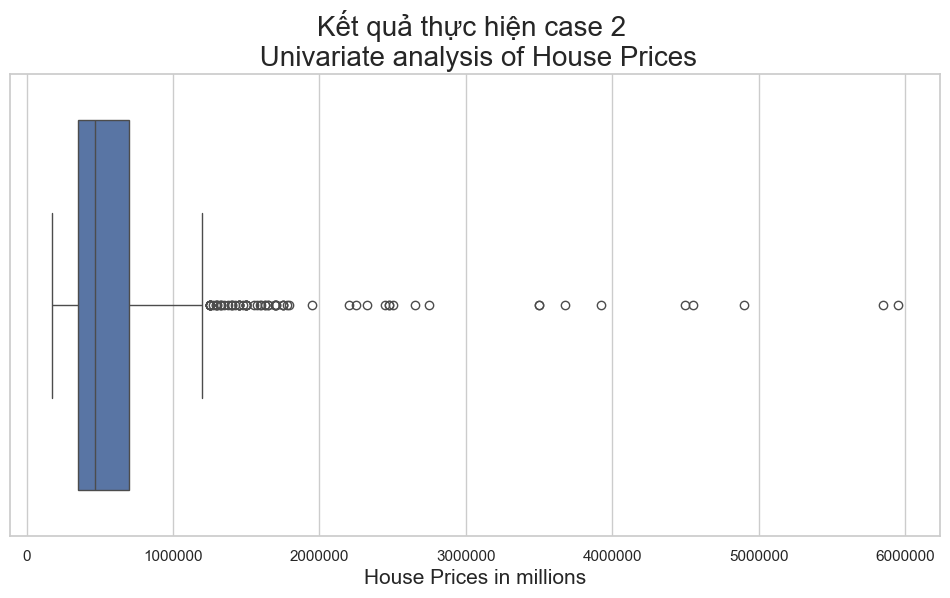

In [118]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
houseprices_data = pd.read_csv("Data/HousingPricesData.csv") 
houseprices_data = houseprices_data[['Zip','Price','Area','Room']] 
# case 1: Create a boxplot using the boxplot method 
sns.boxplot(data = houseprices_data, x= houseprices_data["Price"]) 
# case 2: advanced 
plt.figure(figsize= (12,6)) 
ax = sns.boxplot(data = houseprices_data, x= houseprices_data["Price"]) 
ax.set_xlabel('House Prices in millions',fontsize = 15) 
ax.set_title('Kết quả thực hiện case 2 \n Univariate analysis of House Prices', fontsize= 20) 
plt.ticklabel_format(style='plain', axis='x')

+
    + 2. Phân tích dữ liệu đơn biến dựa vào violin plot

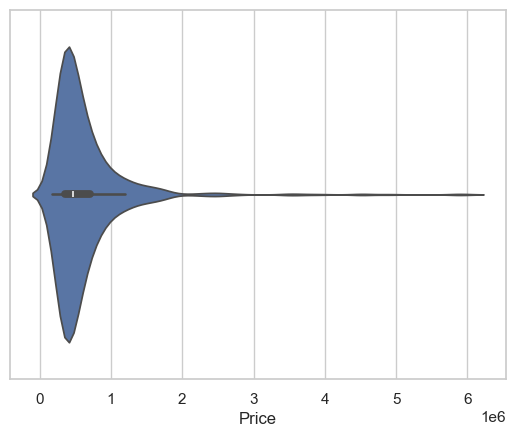

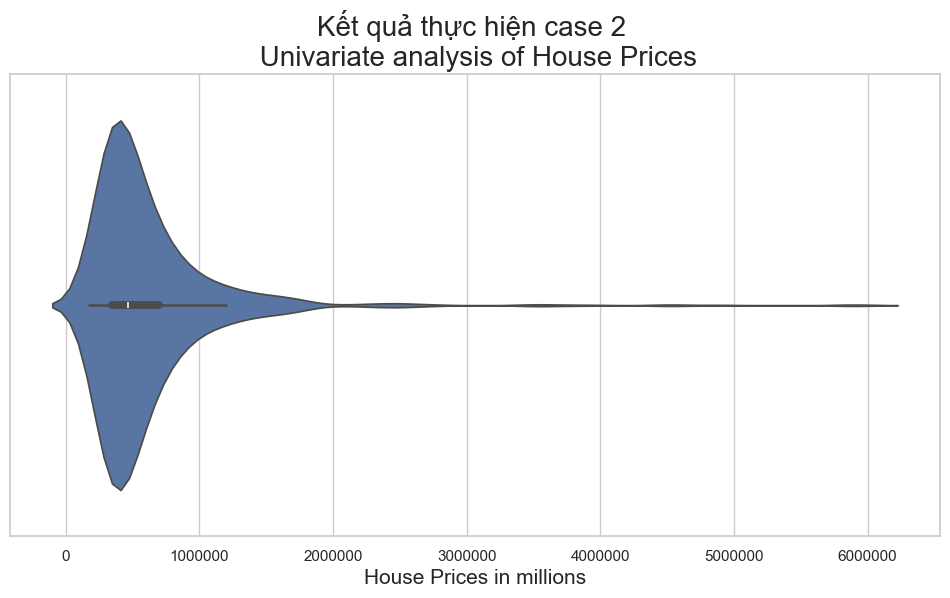

In [119]:
# case 1: basic 
sns.violinplot(data = houseprices_data, x= houseprices_data["Price"]) 
# case 2: advanced 
plt.figure(figsize= (12,6)) 
ax = sns.violinplot(data = houseprices_data, x=houseprices_data["Price"]) 
ax.set_xlabel('House Prices in millions',fontsize = 15) 
ax.set_title('Kết quả thực hiện case 2 \n Univariate analysis of House Prices', fontsize= 20) 
plt.ticklabel_format(style='plain', axis='x')

+
    + 3. Phân tích dữ liệu đơn biến dựa vào bản tóm tắt dữ liệu 

In [108]:
houseprices_data.describe()

Price        Area        Room
count  9.200000e+02  924.000000  924.000000
mean   6.220654e+05   95.952381    3.571429
std    5.389942e+05   57.447436    1.592332
min    1.750000e+05   21.000000    1.000000
25%    3.500000e+05   60.750000    3.000000
50%    4.670000e+05   83.000000    3.000000
75%    7.000000e+05  113.000000    4.000000
max    5.950000e+06  623.000000   14.000000

<u>**Bài toán 2:**</u> Thực hiện các nhiệm vụ trong bài toán 2 để làm quen với việc phân tích hai biến với các hàm trong thư viện scikit-learn.

+ <i>**Nhiệm vụ 1:**</i> phân tích dữ liệu hai biến trên dữ liệu về chim cánh cụt. Dữ liệu lấy tại https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data

+
    + 1. Import thư viện và chuẩn bị dữ liệu phân tích

In [109]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
penguins_data = pd.read_csv("data/penguins_size.csv") 
penguins_data = penguins_data[['species','culmen_length_mm','body_mass_g', 'sex']]

+
    + 2. Phân tích dữ liệu 2 biến dựa vào phương pháp scatterplot

Text(0.5, 1.0, 'Kết quả thực hiện case 2 \n Bivariate analysis of Culmen Length and body mass')

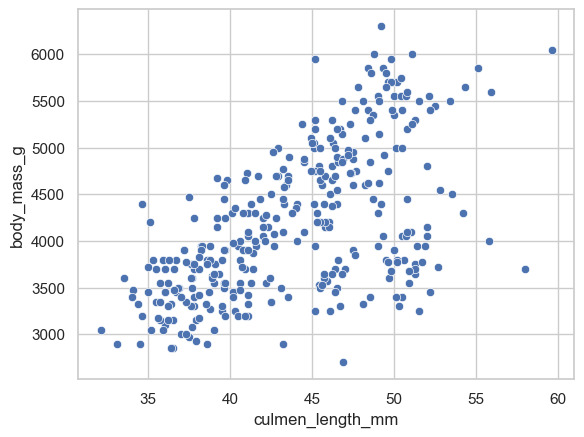

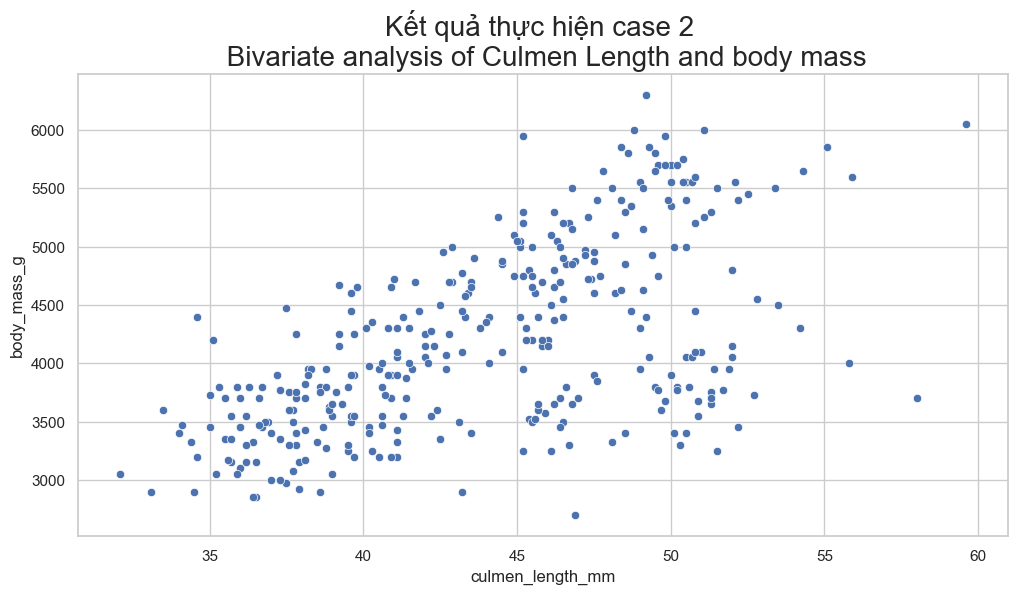

In [120]:
# case 1: basic 
sns.scatterplot(data = penguins_data, x= penguins_data["culmen_length_mm"],  
y= penguins_data['body_mass_g']) 
# case 2: advanced 
plt.figure(figsize= (12,6)) 
ax = sns.scatterplot(data = penguins_data,  
x= penguins_data["culmen_length_mm"],  
y= penguins_data['body_mass_g']) 
ax.set_title('Kết quả thực hiện case 2 \n Bivariate analysis of Culmen Length and body mass', fontsize= 20) 

+
    + 3. Phân tích 2 biến dựa vào bảng crosstab/two-way

In [122]:
print("Kết quả thực hiện:")
pd.crosstab(index= penguins_data['species'], columns= penguins_data['sex'])

Kết quả thực hiện:


sex        .  FEMALE  MALE
species                   
Adelie     0      73    73
Chinstrap  0      34    34
Gentoo     1      58    61

+
    + 4. Phân tích 2 biến sử dụng pivot_table

In [123]:
print("Kết quả thực hiện: ")
pd.pivot_table(penguins_data, values='culmen_length_mm', index='species', aggfunc="mean") 

Kết quả thực hiện: 


culmen_length_mm
species                    
Adelie            38.791391
Chinstrap         48.833824
Gentoo            47.504878

+
    + 5. Phân tích 2 biến sử dụng pairplot

Kết quả thực hiện: 


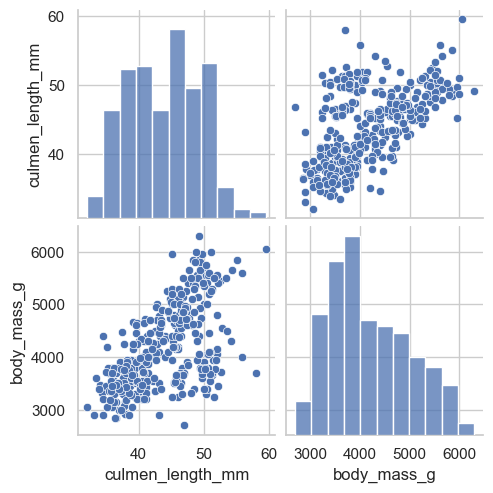

In [125]:
import seaborn as sns 
print("Kết quả thực hiện: ")
sns.pairplot( data = penguins_data);

<u>**Bài toán 3:**</u> Thực hiện các nhiệm vụ trong bài toán 3 để làm quen với việc sử dụng các công cụ hỗ trợ EDA tự động. 

+ <i>**Nhiệm vụ 1:**</i> Sử dụng pandas profiling trên dữ liệu Customer Personality Analysis. Dữ liệu lấy tại https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis 

    + 1. Cài đặt pandas_profiling sau này đổi tên thành ydata_profiling (xem thông tin chi tiết tại https://pypi.org/project/pandas-profiling/3.1.0) 
    + 2. Sử dụng công cụ

In [139]:
import pandas as pd 
from ydata_profiling import ProfileReport 
marketing_data = pd.read_csv("data/marketing_campaign.csv") 
#  Create  an  Automated  EDA  report  using  the  ProfileReport  class  in  the ydata_profiling library. Use the to_file method to output the report to an HTML file 
profile = ProfileReport(marketing_data) 
profile.to_file("Reports/profile_output.html") 

ModuleNotFoundError: No module named 'ydata_profiling'

In [141]:
!"C:\Users\ASUS\AppData\Local\Programs\Python\Python313\python.exe" -m pip install ydata-profiling

  Using cached ydata_profiling-4.17.0-py2.py3-none-any.whl.metadata (22 kB)
  Using cached pydantic-2.12.0-py3-none-any.whl.metadata (83 kB)
  Using cached visions-0.8.1-py3-none-any.whl.metadata (11 kB)
  Using cached filetype-1.2.0-py2.py3-none-any.whl.metadata (6.5 kB)
     ---------------------------------------- 0.0/621.7 kB ? eta -:--:--
     ---------------------------------------- 621.7/621.7 kB 5.1 MB/s  0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached multimethod-1.12-py3-none-any.whl.metadata (9.6 kB)
  Using cached typeguard-4.4.4-py3-none-any.whl.metadata (3.3 kB)
  Usin

  error: subprocess-exited-with-error
  
  × Building wheel for phik (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      *** scikit-build-core 0.11.6 using CMake 4.1.0 (wheel)
      *** Configuring CMake...
      loading initial cache file C:\Users\ASUS\AppData\Local\Temp\tmps071iqe2\build\CMakeInit.txt
      -- Building for: NMake Makefiles
      CMake Error at CMakeLists.txt:5 (project):
        Running
      
         'nmake' '-?'
      
        failed with:
      
         no such file or directory
      
      
      CMake Error: CMAKE_CXX_COMPILER not set, after EnableLanguage
      -- Configuring incomplete, errors occurred!
      
      *** CMake configuration failed
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for phik
error: failed-wheel-build-for-install

× Failed to build installable wheels for some pyproject.toml based projects
╰─> phik

Kết quả thực hiện:

+
    + 3. Tiến hành EDA trên trang tập tin profile_output.html

Kết quả thực hiện:

+ <i>**Nhiệm vụ 2:**</i> Sử dụng dtale trên dữ liệu Marketing Campaign. Dữ liệu lấy từ https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis 

    + 1. Cài đặt dtale (xem thông tin chi tiết tại https://dtale.readthedocs.io/en/latest/)  
    + 2. Sử dụng công cụ

In [137]:
import pandas as pd 
import dtale 
marketing_data = pd.read_csv("data/marketing_campaign.csv") 
dtale.show(marketing_data).open_browser()

In [138]:
d = dtale.show(marketing_data)
print(d._main_url())

TypeError: 'str' object is not callable

Kết quả thực hiện:

#### **1.3.3. Bài tập thực hành 1:** Tìm hiểu các tính năng và cách sử dụng sản phẩm SweetViz (https://pypi.org/project/sweetviz) áp dụng trên tập dữ liệu Marketing Campaign

#### **1.3.4. Bài tập thực hành 2:** Tìm hiểu các tính năng và cách sử dụng sản phẩm AutoViz (https://pypi.org/project/autoviz) áp dụng trên tập dữ liệu Marketing Campaign

## **D. TÓM TẮT THỰC HÀNH**

+ **Khám phá dữ liệu (Exploratory Data Analysis - EDA)** là một bước quan trọng trong phân tích dữ liệu và khai thác dữ liệu, nhưng quá trình này không tránh khỏi những khó khăn. Một trong những thách thức lớn nhất là chất lượng dữ liệu không đảm bảo, bao gồm giá trị thiếu, giá trị ngoại lai hoặc dữ liệu không nhất quán, đòi hỏi kỹ năng tiền xử lý phức tạp và tốn thời gian. Bên cạnh đó, việc xử lý khối lượng dữ liệu lớn có thể gây khó khăn trong việc xác định các mẫu hoặc xu hướng có ý nghĩa, đặc biệt khi sử dụng các công cụ không được tối ưu hóa cho dữ liệu lớn. Chương đã trình bày một số kỹ thuật cơ bản khi sử dụng Python và các công cụ phát triển bằng Python giúp thực hiện việc khám phá dữ liệu được hiệu quả hơn.